TEAM BETA:

  - MUHAMMAD MAHARDIKA RENALDI
  - MUHAMMAD DAUD
  - MUH FAIS HIDAYAH

# __E COMMERCE CUSTOMER CHURN ANALYSIS AND PREDICTION__

## __1. BUSSINES PROBLEM AND DATA UNDERSTANDING__

### __1.1 Context__

TechStyle merupakan platform e-commerce yang berfokus pada penjualan produk elektronik dan gadget, dengan model bisnis yang mengintegrasikan sistem membership dan marketplace. Didirikan pada tahun 2020, TechStyle telah berkembang menjadi salah satu pemain utama di segmen e-commerce teknologi di Indonesia, dengan lebih dari 5,600 pelanggan aktif (4,682 non-churn dan 948 churn) dan jaringan warehouse yang tersebar di berbagai kota besar.

Platform ini mengadopsi model bisnis yang mirip dengan Bhinneka, di mana kami memiliki kontrol langsung atas inventory melalui sistem warehouse terintegrasi, terutama untuk kategori produk elektronik premium. Namun, kami juga mengakomodasi seller pihak ketiga untuk kategori produk pendukung seperti aksesoris dan peripheral, menciptakan ekosistem marketplace yang komprehensif.

#### 1.1.1. Sistem Membership dan Revenue Stream

TechStyle mengoperasikan sistem membership berbasis subscription bulanan dengan biaya berlangganan yang harus dibayarkan setiap awal periode. Pendapatan tetap dari membership fee ini menjadi salah satu revenue stream utama yang kemudian dikonversi menjadi berbagai benefit member, termasuk program cashback yang rata-rata mencapai $180.635 per bulan untuk member aktif.

Sistem tier membership TechStyle didasarkan pada konsep "continuous membership tenure", dimana:

#### 1.1.2. Tier Structure:

1. Basic Member (0-3 bulan)
    - Cashback rate: 5%
    - Voucher bulanan senilai $10
    - Gratis ongkir minimal pembelian $100

2. Silver Member (3-6 bulan)
    - Cashback rate: 5%
    - Voucher bulanan senilai $15
    - Gratis ongkir minimal pembelian $75
    - Akses flash sale khusus

3.  Gold Member (6-12 bulan)
    - Cashback rate: 5%
    - Voucher bulanan senilai $25
    - Gratis ongkir minimal pembelian $50
    - Prioritas customer service
    - Exclusive early access untuk produk baru

4. Platinum Member (>12 bulan)
    - Cashback rate: 5%
    - Voucher bulanan senilai $50
    - Gratis ongkir tanpa minimal pembelian
    - Dedicated customer service
    - Priority waitlist untuk produk limited
    - Special birthday rewards


#### 1.1.3. Tenure Reset Policy:

- Tenure dihitung berdasarkan masa berlangganan kontinyu
- Jika member berhenti berlangganan (churn), maka ketika bergabung kembali tenure dimulai dari 0
- Tidak ada sistem "tenure freezing" - setiap putus berlangganan akan mereset hitungan
- Benefit tier tidak dapat diakumulasi dari periode membership yang terputus


#### 1.1.4. Kebijakan tenure reset ini dirancang untuk:

- Mendorong loyalitas jangka panjang
- Memaksimalkan customer lifetime value
- Meminimalisir churn dengan insentif progresif
- Memberikan nilai tambah yang signifikan untuk long-term members


Status churn bersifat binary dan final dalam satu periode - sekali seorang member terklasifikasi sebagai churn, mereka harus memulai dari Basic Member jika ingin bergabung kembali. Meski pelanggan yang churn masih dapat bertransaksi sebagai regular customer, mereka kehilangan akses ke benefit membership yang bernilai signifikan.


Dengan model bisnis ini, prediksi dan pencegahan churn menjadi sangat kritis untuk mempertahankan:
- Revenue stream dari membership fee
- Tingkat engagement dan frekuensi transaksi yang lebih tinggi
- Nilai transaksi yang lebih besar dari member dengan tier tinggi
- Efisiensi program marketing dan retention

### 1.2. Revenue Impact Analysis

#### 1.2.1. Asumsi Dasar
1. **Membership Fee Structure:**
   - $199/bulan

2. **Transaction Pattern:**

         Non-Churn (Active Members):
         - Rata-rata CashbackAmount: $180.635
         - Rata-rata OrderCount: 3.047 orders/bulan

         Churn:
         - Rata-rata CashbackAmount: $160.371
         - Rata-rata OrderCount: 2.824 orders/bulan

#### __Per Customer Impact__
- Non_Churn_Revenue(Member) = $180.635 / 0.05 = $3,612.70/month
- Churn_Revenue(Non Member) = $160.371 / 0.05 = $3,207.42/month
- Revenue_Loss_per_Customer = $3,612.70 - $3,207.42 = $405.28/month
- Fee Membership = $199/month 

#### __Total Impact__
- Total_Monthly_Loss = $405.28 * 948 = $384,210.65/month
- Fee Membership = $199 * 948 = $188,652/month
- Annual_Revenue_Loss:
  - $384,210.65 * 12 = $4,610,527.80/year
  - $188,652 * 12 = $2,263,824/year
- Total Revenue Loss = $4,610,527.80 + $2,263,824 = $6,874,351.8/year

### __1.3. Problem Statement__
TechStyle, sebagai platform e-commerce yang berfokus pada penjualan produk elektronik dan gadget, menghadapi tantangan kritis dalam memprediksi dan mencegah churn pelanggan untuk mempertahankan aliran pendapatan dan keterlibatan pelanggan. Dengan model bisnis berbasis membership, TechStyle menawarkan berbagai tingkatan membership yang memberikan manfaat berbeda untuk mendorong loyalitas jangka panjang. Platform ini memiliki lebih dari 5.600 pelanggan aktif, dengan 4.682 pelanggan non-churn dan 948 pelanggan churn. Perusahaan bertujuan untuk meminimalkan churn guna mempertahankan pendapatan dari biaya keanggotaan dan nilai transaksi tinggi dari pelanggan loyal.

Fokus utama adalah mengembangkan model prediktif untuk mengidentifikasi potensi churner secara akurat. Model tersebut harus meminimalkan Type 2 errors (False Negatives), dimana pelanggan yang sebenarnya churn tidak diprediksi akan churn, karena hal ini memiliki dampak finansial jangka panjang yang signifikan. Sebaliknya, Type 1 errors (False Positives) menyebabkan biaya retensi yang tidak perlu tetapi memiliki dampak yang lebih kecil. Tujuannya adalah mengoptimalkan model untuk mengurangi False Negatives, sehingga lebih banyak pelanggan yang dapat dipertahankan dan memaksimalkan nilai pelanggan seumur hidup (Customer Lifetime Value/CLV).

### __1.4. Goals__
Sebagai seorang data scientist, kami akan mencoba untuk membantu perusahaan dalam:
1. Memprediksi seakurat mungkin apakah sebuah customer berpotensi untuk melakukan churn (Berhenti Membeship) atau tidak.
2. Mengetahui pola dari customer yang churn dan variabel apa saja yang mempengaruhi churn
3. Meningkatkan retensi pelanggan, Dengan mengetahui siapa pelanggan yang berpotensi untuk berhenti berlangganan membership sehingga perusahaan dapat merancang strategi retensi untuk mencegah churn dan mempertahankan member yang sudah ada.
4. Menurunkan churn rate hingga dibawah 10%

### __1.5. Analytical Approach__
langkah pertama yaitu dengan melakukan analysis data untuk menemukan pola dan karakteristik bagi customer yang berpotensi untuk churn. kemudian membuat model machine learning dengan metode klasifikasi berdasarkan fitur-fitur yang tersedia, dan melakukan evaluasi terhadap model tersebut

### __1.6. Metric Evaluation__
Karena Fokus Utama kita adalah customer yang berpotensi untuk churn, maka target yang akan kita tetapkan adalah sebagai berikut:

- 0 : customer tidak churn
- 1 : customer churn  

- Type 1 error : False Positive (customer yang aktualnya tidak melakukan churn tetapi di prediksi melakukan churn)
Konsekuensi : potensi pengeluaran biaya retensi yang sia-sia karena E Commerce akan mengeluarkan biaya untuk customer yang sebenarnya tidak churn

- Type 2 error : False Negative (customer yang aktualnya melakukan churn tetapi di prediksi tidak churn)
Konsekuensi : E Commerce kehilangan pelanggan dan berpotensi kehilangan keuntungan jangka panjang dari Customer(CLV)

#### 1.6.1. Asumsi Dasar dan Kalkulasi
Berdasarkan penelitian industri e-commerce dan subscription-based business, kita menggunakan asumsi:
- Customer Acquisition Cost (CAC): $300 (rata-rata dari range $200-400)
- Retention Cost: $60 (20% dari CAC)
- Cashback rate seragam untuk semua tier: 5%
- Membership fee: $199 per bulan

#### 1.6.2. Skenario Impact Type Error

1. Skenario 1: False Positive (Type 1 Error)
    - Customer A tidak berencana churn namun diprediksi akan churn:
        - Kondisi:
            - Customer masih aktif dan profitable
            - Model memprediksi akan churn
            - E-commerce melakukan tindakan retensi

        - Impact:
            1. Biaya Retensi yang Terbuang = $60 USD
            2. Tidak ada kehilangan revenue karena customer tetap aktif
            3. Potensi customer experience terganggu karena tindakan retensi yang tidak perlu

        - Total Loss = $60 USD (biaya retensi)

2. Skenario 2: False Negative (Type 2 Error)
    - Customer B akan churn namun diprediksi tidak akan churn:
        - Kondisi:
            - Customer berencana churn
            - Model gagal memprediksi
            - Tidak ada tindakan retensi yang dilakukan

        - Impact:
            1. Kehilangan profit Bulanan = $405.28 + $199 = $604.28
            2. Kehilangan potential membership fee
            3. Penurunan customer base
            4. Potensi dampak word-of-mouth negatif

        - Total Loss = $604.28 USD (profit loss) + potential long-term impact


#### 1.6.3. Perbandingan Severity Error

Type 1 Error (False Positive):
- Impact: $60 loss per case
- Karakteristik: Short-term financial loss
- Risk Level: Medium

Type 2 Error (False Negative):
- Impact: $604.28 loss per case
- Karakteristik: Long-term revenue & customer loss
- Risk Level: High

#### 1.6.4. Kesimpulan
- Berdasarkan analisis di atas:

    - Type 2 Error (False Negative) memiliki dampak 10x lebih besar dari Type 1 Error(False Positive)
    - Fokus model seharusnya pada minimalisasi False Negative
    - Metrik evaluasi yang tepat adalah Recall untuk mengurangi False Negative

#### __1.7. Data Understanding__
__Dataset source__ : https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction

__About Dataset__ :  Kumpulan data tersebut merupakan milik sebuah perusahaan e-commerce online terkemuka. Sebuah perusahaan ritel online (e-commerce) ingin mengetahui pelanggan yang akan berhenti berlangganan, sehingga mereka dapat mendekati pelanggan untuk menawarkan beberapa promo.

#### __1.8. Attribute Information__

| Data Type | Attribute | Description |
| --- | --- | --- |
int64 | CustomerID | Unique customer ID |
int64 | Churn | Churn Flag |
| float64 | Tenure | Tenure of customer in organization |
| object | PreferredLoginDevice | Preferred login device of customer |
| int64 | CityTier | City tier |
| float64 | WarehouseToHome | Distance in between warehouse to home of customer |
| object | PreferredPaymentMode | Preferred payment method of customer |
| object | Gender | Gender of customer |
| float64 | HourSpendOnApp | Number of hours spend on mobile application or website |
| int64 | NumberOfDeviceRegistered | Total number of deceives is registered on particular customer |
| object | PreferedOrderCat | Preferred order category of customer in last month |
| int64 | SatisfactionScore | Satisfactory score of customer on service |
| object | MaritalStatus	| Marital status of customer |
| int64 | NumberOfAddress | Total number of added added on particular customer |
| int64 | Complain | Any complaint has been raised in last month |
| float64 | OrderAmountHikeFromlastYear | Percentage increases in order from last year |
| float64 | CouponUsed | Total number of coupon has been used in last month |
| float64 | OrderCount | Total number of orders has been places in last month |
| float64 | DaySinceLastOrder | Day Since last order by customer |
| float64 | CashbackAmount | Average cashback in last month |             float64








## __2. EXPLORATORY DATA ANALYSIS (EDA)__

### __2.1. Summary Data__

In [1]:
# Library

import pandas as pd
import numpy as np
import missingno


# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce


# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score


# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler


# #stats
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import kstest
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
import scipy.stats as stats


# Ignore Warning
import warnings
warnings.filterwarnings('ignore')


# feature important by shap
import shap


# Set max columns
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_excel('E Commerce Dataset.xlsx',sheet_name='E Comm')

In [3]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

### __2.2. Pengecekan Data Duplikat__

In [5]:
df.duplicated().sum()

0

Tidak terdapat data duplikat pada dataset, sehingga bisa langsung ke step selanjutnya

### __2.3. Drop Kolom yang Tidak Relavan__

In [6]:
df = df.drop(columns=['CustomerID'])

Customer ID di Drop karena hanya berisi ID unik yang menjadi pembeda antara satu customer dengan customer yang lain. dan tidak dipergunakan dalam Data Analysis dan Pembuatan Machine Learning

### __2.4. Pengecekan Distribusi Data__

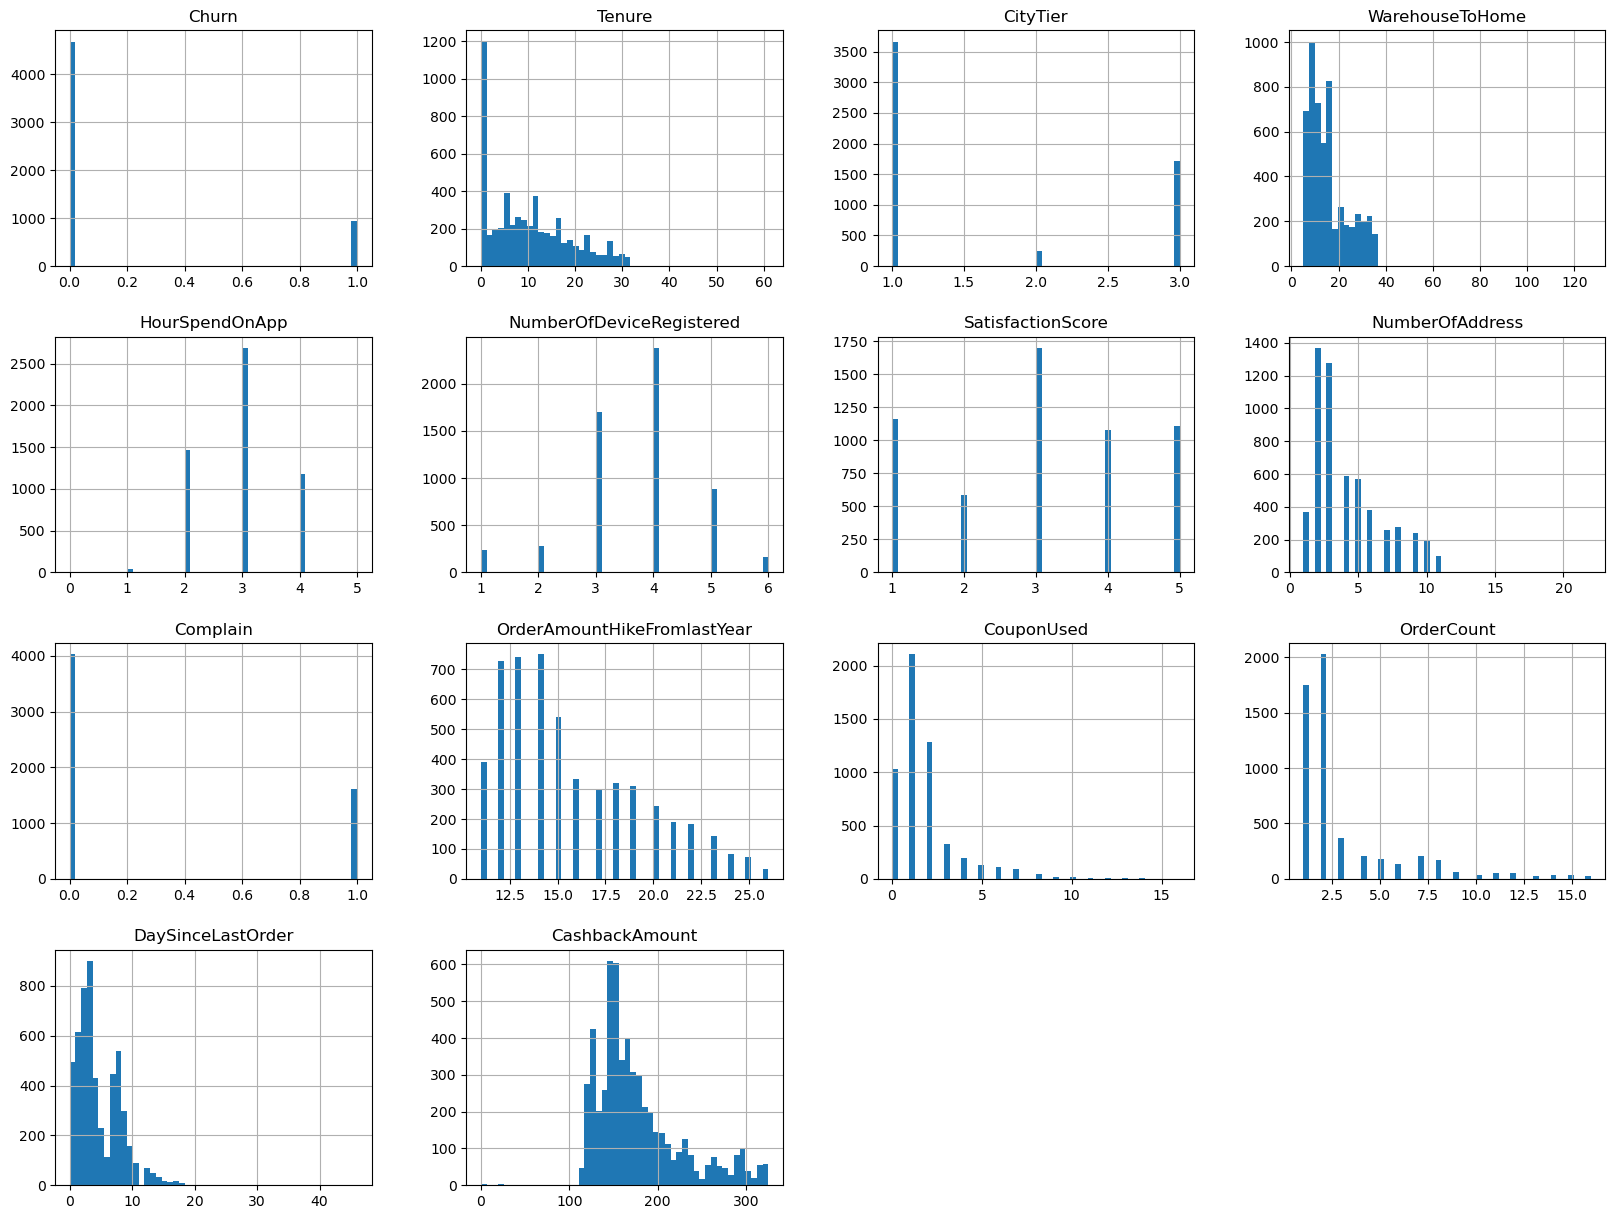

In [7]:
df.hist(bins =50,figsize=(20,15))
plt.show()

In [8]:
df_numeric = df.select_dtypes(include=['number'])
distribusi = []
for i in df_numeric.columns:
    test = kstest(df_numeric[i], 'norm')
    if test[1] > 0.05: 
        distribusi.append('normal')
    else:
        distribusi.append('tidak normal')

pd.DataFrame({'distribusi':distribusi},index=df_numeric.columns)

,distribusi
Churn,tidak normal
Tenure,tidak normal
CityTier,tidak normal
WarehouseToHome,tidak normal
HourSpendOnApp,tidak normal
NumberOfDeviceRegistered,tidak normal
SatisfactionScore,tidak normal
NumberOfAddress,tidak normal
Complain,tidak normal
OrderAmountHikeFromlastYear,tidak normal


Hasil uji Kolmogorov-Smirnov (kstest): Kolom Numerik pada dataset semuanya memiliki distribusi tidak normal

In [9]:
from scipy.stats import shapiro

distribusi = []
for col in df_numeric.columns:
    test_stat, p_value = shapiro(df_numeric[col])
    distribusi.append("normal" if p_value > 0.05 else "tidak normal")

pd.DataFrame({'distribusi': distribusi}, index=df_numeric.columns)

,distribusi
Churn,tidak normal
Tenure,tidak normal
CityTier,tidak normal
WarehouseToHome,tidak normal
HourSpendOnApp,tidak normal
NumberOfDeviceRegistered,tidak normal
SatisfactionScore,tidak normal
NumberOfAddress,tidak normal
Complain,tidak normal
OrderAmountHikeFromlastYear,tidak normal


Hasil uji Saphiro-Wilk: Kolom Numerik pada dataset semuanya memiliki distribusi tidak normal

### __2.5. Missing Value__

In [10]:
df.isna().sum()

Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [11]:
ListItem = []
for col in df.columns :
    ListItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=ListItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Churn,int64,0,0.00,2,"[1, 0]"
1,Tenure,float64,264,4.69,36,"[7.0, 13.0]"
2,PreferredLoginDevice,object,0,0.00,3,"[Mobile Phone, Computer]"
3,CityTier,int64,0,0.00,3,"[2, 3]"
4,WarehouseToHome,float64,251,4.46,34,"[29.0, 33.0]"
5,PreferredPaymentMode,object,0,0.00,7,"[E wallet, Debit Card]"
6,Gender,object,0,0.00,2,"[Female, Male]"
7,HourSpendOnApp,float64,255,4.53,6,"[3.0, 1.0]"
8,NumberOfDeviceRegistered,int64,0,0.00,6,"[4, 2]"
9,PreferedOrderCat,object,0,0.00,6,"[Mobile Phone, Mobile]"


In [12]:
df.dropna().shape[0]

3774

<Axes: >

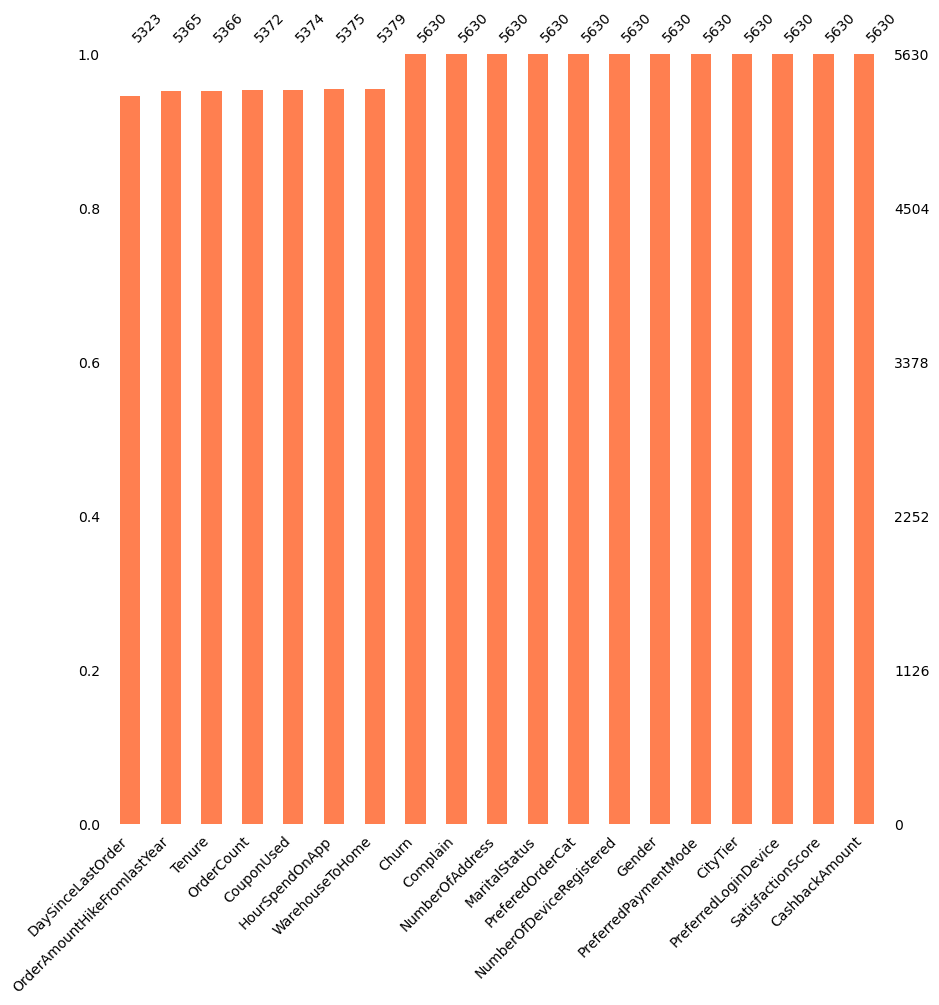

In [13]:
missingno.bar(df,color='coral', sort ='ascending', figsize=(10,10), fontsize=10)

terdapat 7 kolom yang memiliki missig value, DaySinceLastOrder, OrderAmountHikeFromlastYear,Tenure,OrderCount, CouponUsed, HourSpendOnApp, WarehouseToHome. jika dilihat dari bar, jumlah missing value pada kolom tersebut cuma beda sedikit.

<Axes: >

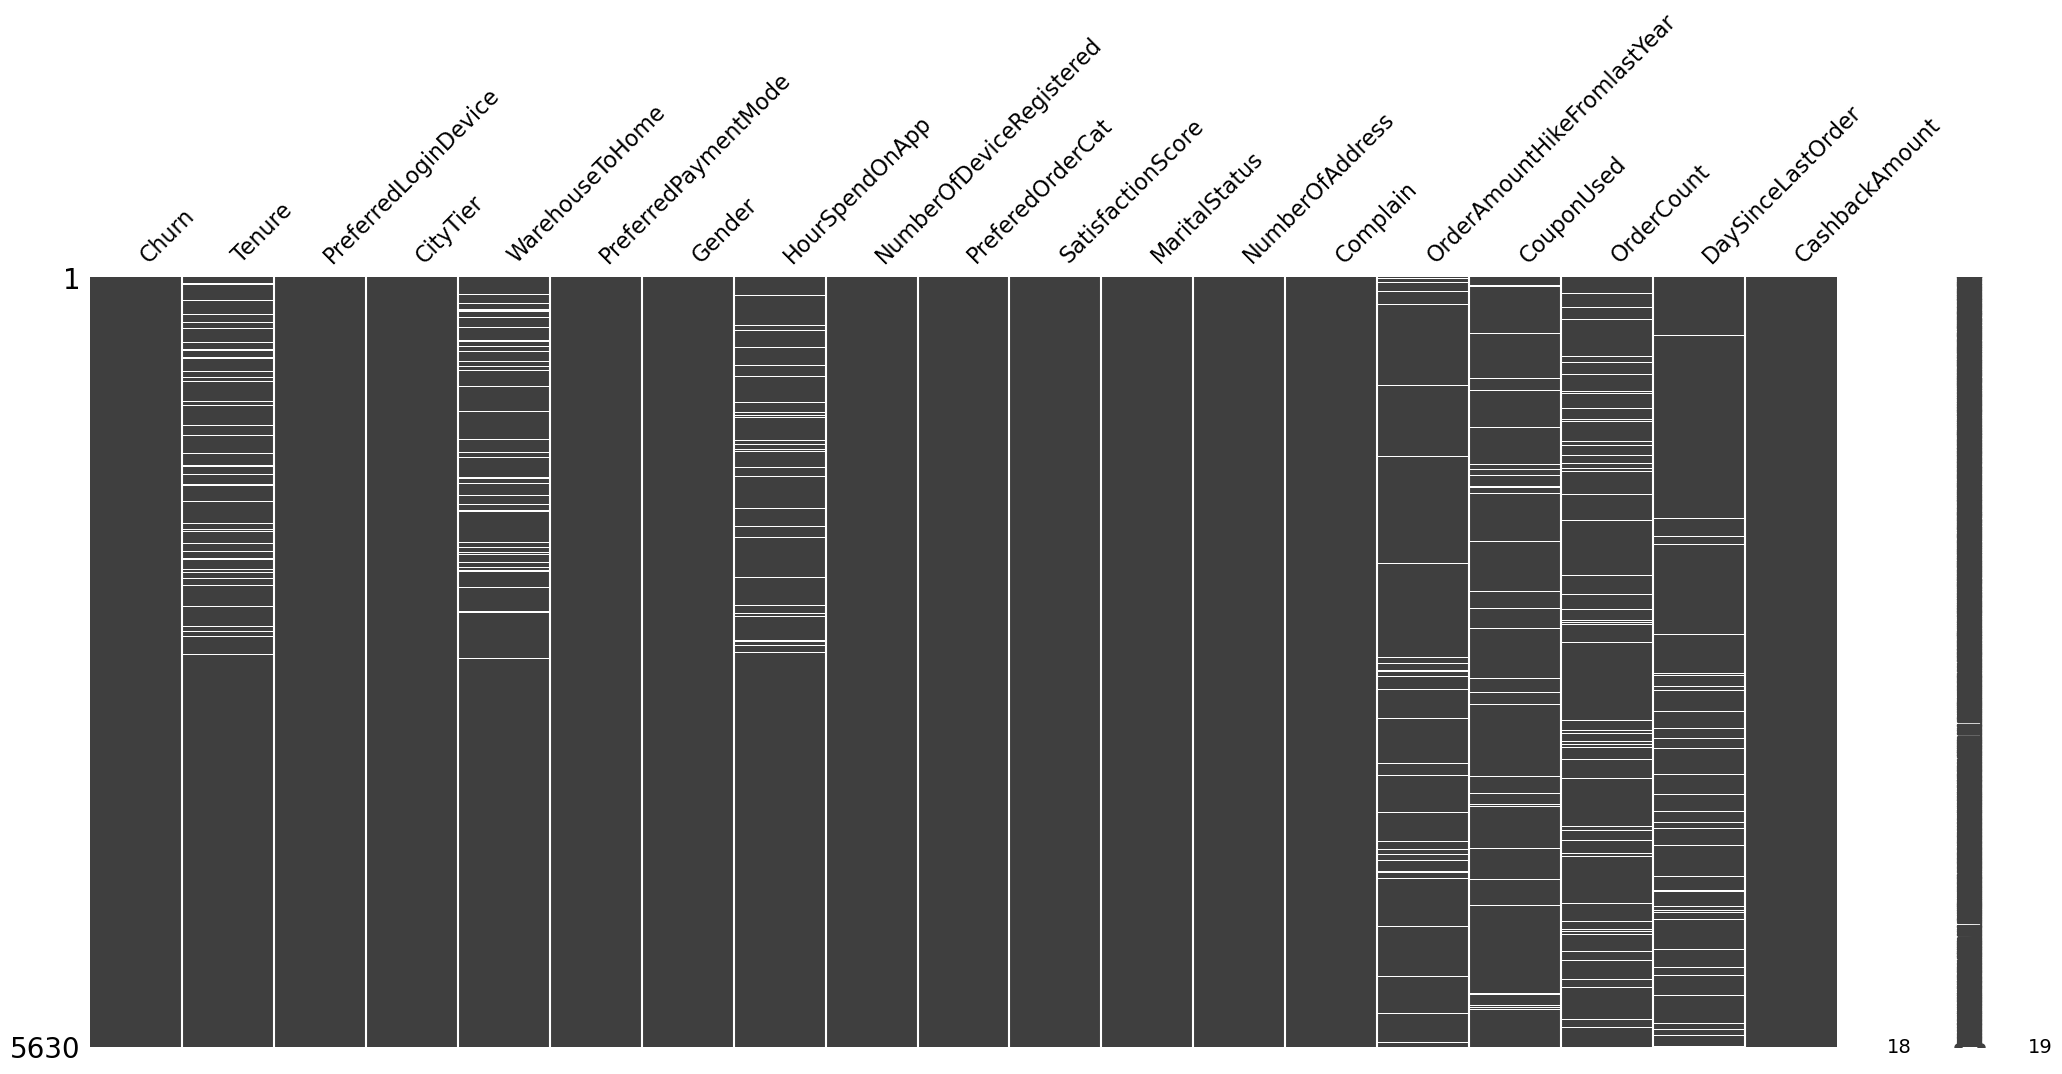

In [14]:
missingno.matrix(df)

pola yang ditampilkan oleh matrix diatas cukup acak

maka dari itu kita akan menampilkan missing no heatmap untuk melihat korelasi antara kolom yang memiliki missing value satu sama lain.
Cara kerja missingno heatmap ==> menampilkan korelasi missing value di berbagai kolom
korelasi dihitung menggunakan korelasi pearson: 
- 1.0 jika satu kolom memiliki missing value, maka kolom lain memiliki missing value.
- 0.0 tidak ada hubungan antara missing value pada kolom tersebut.
- -1.0 jika suatu kolom memiliki missing value, kolom lain selalu ada datanya.

<Axes: >

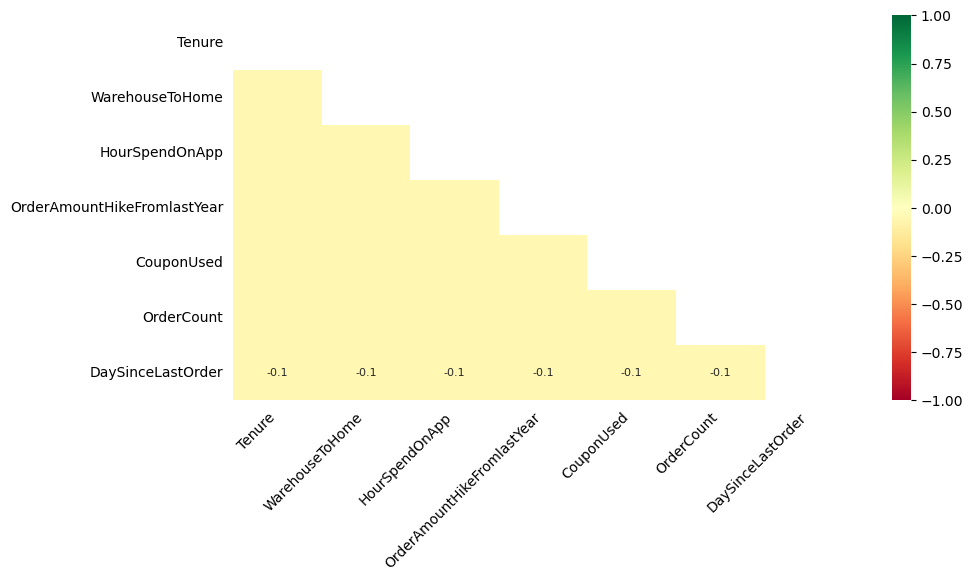

In [15]:
missingno.heatmap(df,cmap='RdYlGn', figsize=(10,5), fontsize=10)

jika dilihat dari heatmap diatas, kolom-kolom yang memiliki missing value tidak memiliki korelasi satu sama lain.

In [16]:
# missingno.dendrogram(df)
# plt.show()

#### __2.5.1. Missing Value Handling__

In [17]:
df.dropna().shape[0]

3774

dataset tergolong dataset kecil dimana hanya memiliki 5630 baris data. Menghapus semua data missing value maka akan membuang banyak data yang berharga. jika menghapus missing value maka kita akan kehilangan data sebanyak 1856 baris data atau sekitar 33% dari total data.

semua kolom yang memiliki missing value merupakan kolom numerikal, Karena distribusi data pada semua kolom tidak normal, maka akan digunakan median dari masing-masing kolom untuk mengisi kolom missing value tersebut.

In [18]:
MV_cols = ['DaySinceLastOrder', 'OrderAmountHikeFromlastYear','Tenure','OrderCount', 'CouponUsed', 'HourSpendOnApp', 'WarehouseToHome']

for col in MV_cols:
    df[col].fillna(df[col].median(), inplace=True)

In [19]:
df.isna().sum()

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

Missing value telah diisi dengan median dari kolomnya masing-masing. sehingga terlihat diatas tidak ada lagi missing value pada dataset

###  __2.6. Inconsistent Values__

In [20]:
cat_cols = df.select_dtypes(include=['object', 'category'])

In [21]:
for col in cat_cols.columns:
    print(col,'==>',df[col].unique())

PreferredLoginDevice ==> ['Mobile Phone' 'Phone' 'Computer']
PreferredPaymentMode ==> ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
Gender ==> ['Female' 'Male']
PreferedOrderCat ==> ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
MaritalStatus ==> ['Single' 'Divorced' 'Married']


terdapat value pada kolom yang memiliki makna hampir sama dengan value kolom yang lain.
- kolom __PreferredLoginDevice__ memiliki value 'Mobile phone' yang maknanya sama dengan 'Phone'
- kolom __PreferredPaymentMode__ memiliki value 'CC' dan 'Credit Card' dimana CC merupakan singkatan dari Credit Card. juga 'COD' dan 'Cash on Delivery' dimana COD merupakan singkatan dari Cash On Delivery
- kolom __PreferedOrderCat__ memiliki value 'Mobile phone' yang maknanya sama dengan 'Phone'

kita akan menggabungkan value tersebut

In [22]:
# 'Phone' menjadi 'Mobile Phone'
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].replace({'Phone' : 'Mobile Phone'})

# 'CC' menjadi 'Credit Card', 'COD' menjadi 'Cash on Delivery'
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace({'CC' : 'Credit Card','COD' : 'Cash on Delivery'})

# 'Mobile' menjadi 'Mobile Phone'
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace({'Mobile' : 'Mobile Phone'})


In [23]:
for col in cat_cols.columns:
    print(col,'==>',df[col].unique())

PreferredLoginDevice ==> ['Mobile Phone' 'Computer']
PreferredPaymentMode ==> ['Debit Card' 'UPI' 'Credit Card' 'Cash on Delivery' 'E wallet']
Gender ==> ['Female' 'Male']
PreferedOrderCat ==> ['Laptop & Accessory' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
MaritalStatus ==> ['Single' 'Divorced' 'Married']


### __2.7. Descriptive Statistic__

In [24]:
df.describe()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000
mean,0.168384,10.134103,1.654707,15.566785,2.934636,3.688988,3.066785,4.214032,0.284902,15.674600,1.716874,2.961812,4.459325,177.223030
std,0.374240,8.357951,0.915389,8.345961,0.705528,1.023999,1.380194,2.583586,0.451408,3.591058,1.857640,2.879248,3.570626,49.207036
min,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,3.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,0.000000,15.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [25]:
df_numeric.columns

Index(['Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

### __2.8. Outliers Identify__

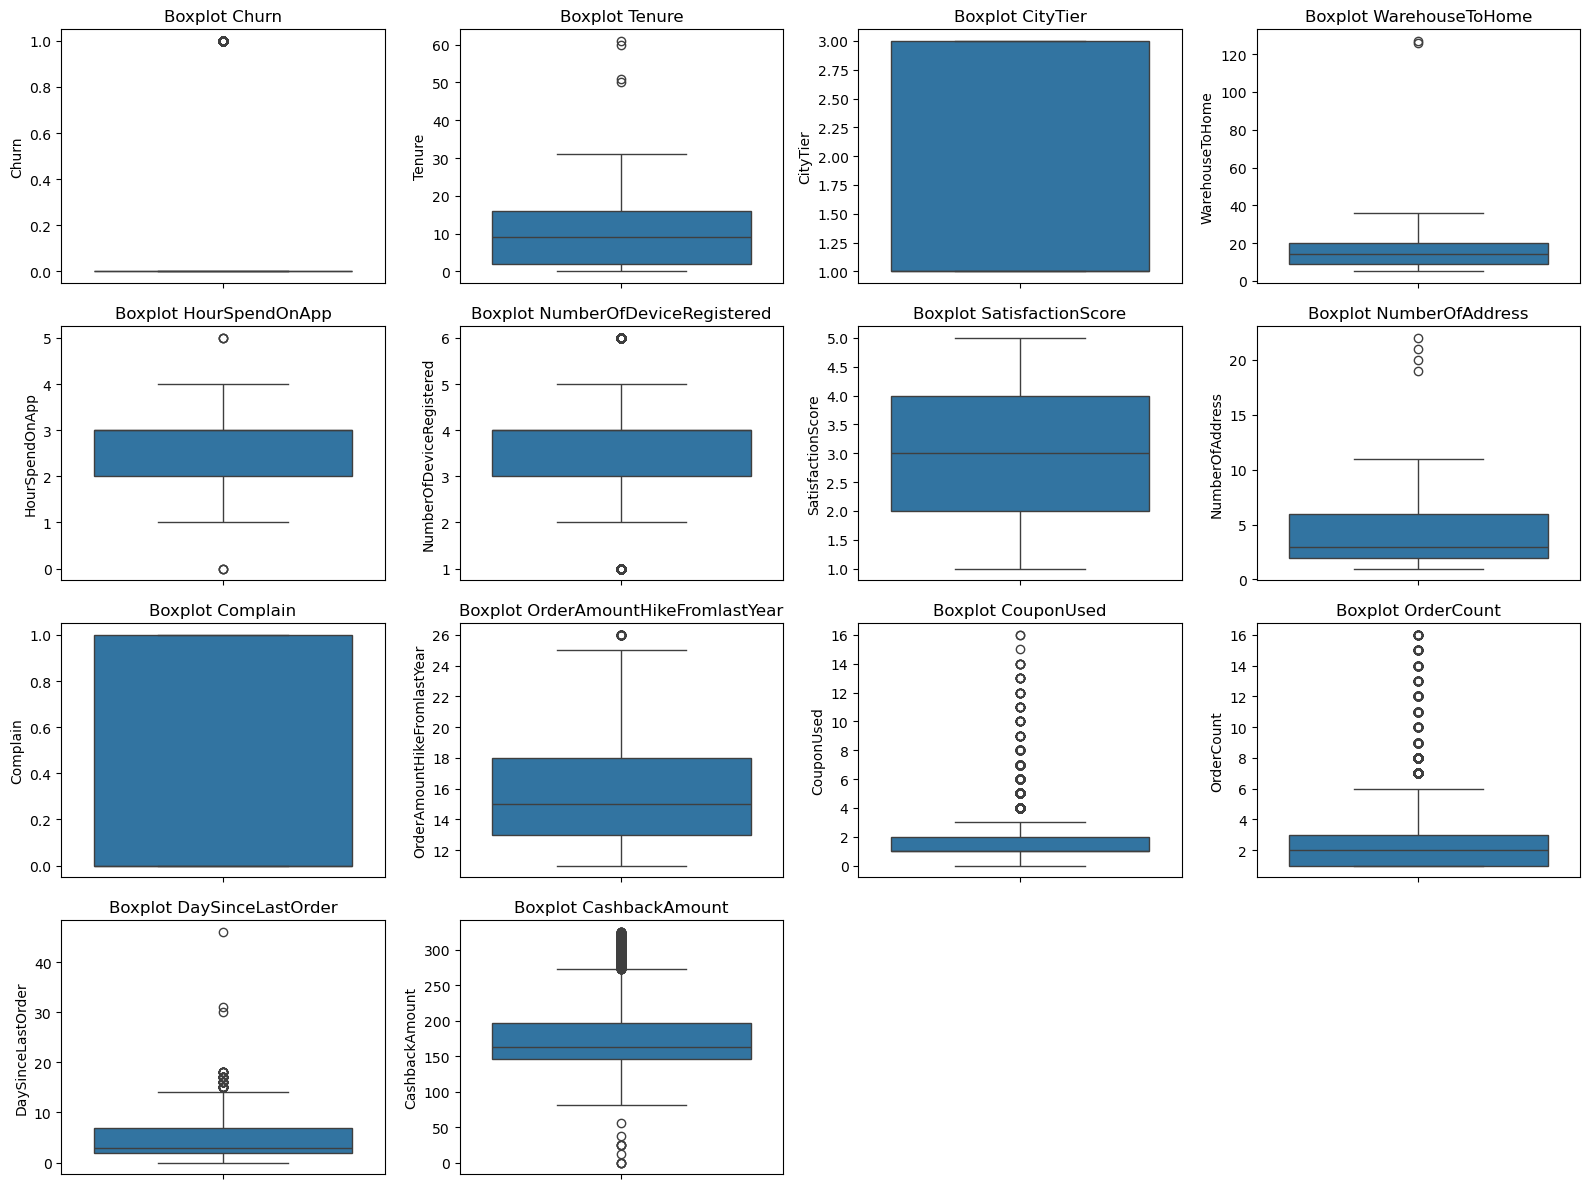

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Menentukan jumlah kolom untuk tampilan grid
num_cols = 4  # Bisa diubah sesuai kebutuhan
num_vars = len(df_numeric.columns)
num_rows = math.ceil(num_vars / num_cols)  # Hitung jumlah baris

# Membuat figure dan axes
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(num_cols * 4, num_rows * 3))
axes = axes.flatten()  # Flatten untuk mempermudah iterasi

# Looping untuk membuat boxplot di setiap subplot
for i, col in enumerate(df_numeric.columns):
    sns.boxplot(y=df_numeric[col], ax=axes[i])
    axes[i].set_title(f"Boxplot {col}")

# Hapus subplot kosong jika jumlah variabel tidak pas dengan grid
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Menyesuaikan tata letak
plt.tight_layout()
plt.show()


Terdapar beberapa kolom yang memiliki outliers. tidak terdapat kolom yang memiliki outliers extreme. jadi diputuskan untuk keep outliers.

In [27]:
df.to_excel('E commerce clean.xlsx')

In [28]:
# Copy data numerik saja
df_numeric = df.select_dtypes(include=['number'])

# Inisialisasi dictionary untuk menyimpan jumlah outlier
outlier_counts = {}

# Looping untuk tiap kolom numerik
for col in df_numeric.columns:
    Q1 = df_numeric[col].quantile(0.25)  # Kuartil 1
    Q3 = df_numeric[col].quantile(0.75)  # Kuartil 3
    IQR = Q3 - Q1  # Hitung IQR
    lower_bound = Q1 - 1.5 * IQR  # Batas bawah
    upper_bound = Q3 + 1.5 * IQR  # Batas atas

    # Menentukan jumlah outlier
    outliers = ((df_numeric[col] < lower_bound) | (df_numeric[col] > upper_bound)).sum()
    outlier_counts[col] = outliers

# Konversi hasil ke DataFrame
outlier_df = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Jumlah Outlier'])

# Tampilkan hasil
print(outlier_df.sort_values(by='Jumlah Outlier', ascending=False))


                             Jumlah Outlier
Churn                                   948
OrderCount                              703
CouponUsed                              629
CashbackAmount                          438
NumberOfDeviceRegistered                397
DaySinceLastOrder                        62
OrderAmountHikeFromlastYear              33
HourSpendOnApp                            6
Tenure                                    4
NumberOfAddress                           4
WarehouseToHome                           2
CityTier                                  0
SatisfactionScore                         0
Complain                                  0


1. Churn (948 outlier)
</br>Churn merupakan variabel kategorikal meskipun berisi angka 0 dan 1. Kedepannya akan dilakukan feature engineer pada variabel ini

2. OrderCount (703) & CouponUsed (629)
</br>Wajar jika banyak outlier karena perilaku pelanggan bisa sangat bervariasi.
Beberapa pelanggan bisa sangat aktif dan sering menggunakan kupon.

3. CashbackAmount (438)
</br>Cashback tinggi bisa terjadi pada pelanggan yang sering belanja atau mendapat promo spesial.

4. DaySinceLastOrder (62) & OrderAmountHikeFromLastYear (33)
</br>Masuk akal, karena beberapa pelanggan bisa lama tidak bertransaksi atau mengalami lonjakan jumlah pesanan.

5. HourSpendOnApp (6) & Tenure (4)
</br>Outlier relatif sedikit

Dari hasil analisis tersebut diputuskan untuk tidak menghapus outliers

### __2.9. Data Analysis__

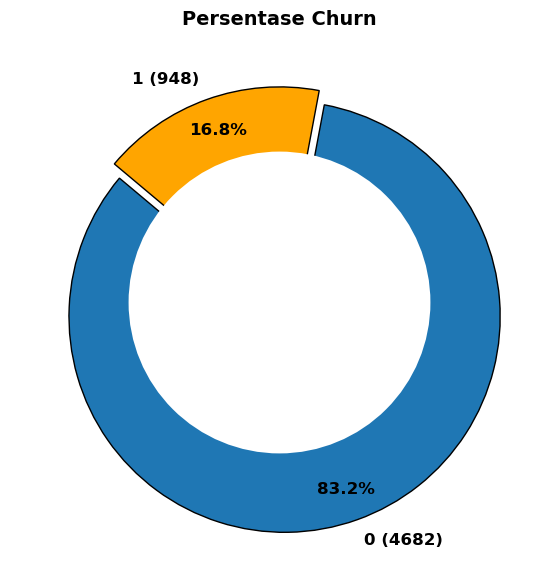

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ambil jumlah data churn
churn_pct = df['Churn'].value_counts()

# Warna manual: Oranye untuk Churn, Biru untuk Not Churn
colors = ['#1f77b4','#FFA500']  # Orange untuk Churn dan Blue untuk Not Churn

# Plot
plt.figure(figsize=(7, 7))
wedges, texts, autotexts = plt.pie(
    churn_pct, labels=churn_pct.index, 
    autopct='%1.1f%%', colors=colors, 
    startangle=140, pctdistance=0.85, 
    wedgeprops={'edgecolor': 'black', 'linewidth': 1},
    explode=[0.07, 0]
)

# Perbaiki tampilan label
for text in texts + autotexts:
    text.set_fontsize(12)
    text.set_weight("bold")

# Tambahkan anotasi jumlah data di luar pie chart
for i, txt in enumerate(texts):
    txt.set_text(f"{txt.get_text()} ({churn_pct.iloc[i]})")

# Tambahkan judul
plt.title("Persentase Churn", fontsize=14, fontweight="bold")

# Buat pie chart lebih clean dengan lingkaran tengah
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_patch(centre_circle)

# Tampilkan
plt.show()

secara normal, persentase churn pada perusahaan E commerce itu sebesar __15-30%__. Persentase Churn perusahaan E commerce yang sehat adalah __5%__. Churn rate E Commerce kita sudah tergolong kedalam persentase churn yang normal yaitu __16,8%__ akan tetapi jika dibandingkan dengan persentase churn yang sehat maka perbedaannya sangat besar sehingga kita perlu untuk menurunkan persentase churn tersebut. terdapat beberapa faktor yang membuat customer menajdi churn. kita akan melakukan analisis terhadap setiap variabel untuk menemukan pola mengapa customer tersebut melakukan churn. sehingga churn bisa di minimalisir

#### __2.9.1. Tenure__

##### __Definisi Tenure__
Tenure adalah durasi waktu yang telah dihabiskan oleh pelanggan dalam menjadi anggota dari suatu layanan atau platform. Dalam konteks e-commerce dan sistem membership seperti TechStyle, tenure mengacu pada periode berlangganan yang kontinuitasnya mencerminkan loyalitas pelanggan.

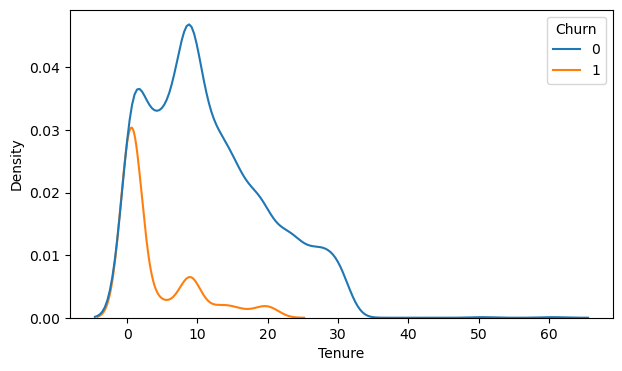

In [30]:
plt.figure(figsize=(7,4))
sns.kdeplot(data= df, x='Tenure', hue='Churn')
plt.show()

In [31]:
churn = df[df['Churn'] == 1]['Tenure']
not_churn = df[df['Churn'] == 0]['Tenure']

# uji Mann-Whitney U
stat, p_value = mannwhitneyu(churn, not_churn, alternative='two-sided')

print(f"U-Statistic: {stat}")
print(f"P-Value: {p_value}")

# Interpretasi hasil
alpha = 0.05
if p_value < alpha:
    print("Perbedaan rata-rata Tenure antara customer Churn dan customer Non-Churn signifikan!")
else:
    print("Tidak ada perbedaan signifikan.")


U-Statistic: 910384.0
P-Value: 1.3097213567891966e-181
Perbedaan rata-rata Tenure antara customer Churn dan customer Non-Churn signifikan!


In [32]:
rata_Tenure_tidakchurn = df[df['Churn'] == 0 ]['Tenure'].mean()
rata_Tenure_churn = df[df['Churn'] == 1 ]['Tenure'].mean()
print(f'rata-rata Tenure customer Churn adalah {rata_Tenure_churn}')
print(f'rata-rata Tenure customer Tidak Churn adalah {rata_Tenure_tidakchurn}')

rata-rata Tenure customer Churn adalah 3.859704641350211
rata-rata Tenure customer Tidak Churn adalah 11.404527979495942


##### __a. Insight: Tenure__

##### **Insight Utama**

Dari analisis data yang telah dilakukan, ditemukan bahwa terdapat perbedaan signifikan dalam rata-rata tenure antara pelanggan yang churn dan pelanggan yang tidak churn:
* Rata-rata Tenure Pelanggan Churn: 3.86 Bulan
* Rata-rata Tenure Pelanggan Tidak Churn: 11.40 Bulan

Pelanggan dengan tenure lebih singkat cenderung memiliki potensi yang lebih tinggi untuk melakukan churn dibandingkan dengan pelanggan dengan tenure lebih lama. Ini menunjukkan bahwa semakin lama pelanggan berlangganan, semakin kecil kemungkinan mereka untuk churn.

##### __b. Rekomendasi__

__Program Onboarding untuk Pelanggan Baru__

Onboarding adalah proses pengenalan dan pembelajaran awal yang diberikan kepada pelanggan baru untuk membantu mereka memahami dan memaksimalkan nilai dari layanan yang mereka dapatkan. Proses ini mencakup berbagai langkah seperti pengenalan fitur, panduan penggunaan, serta penawaran khusus untuk pelanggan baru. 

Tujuan dari Program onboarding untuk pelanggan baru yaitu meningkatkan engagement dan kepuasan pelanggan baru dalam periode awal berlangganan, sehingga mengurangi risiko churn.

##### __c. Action Items__

1. Desain dan Implementasi Program Onboarding (1-2 Bulan) :
* Membuat materi onboarding yang menarik dan informatif yang mencakup video tutorial, panduan langkah demi langkah, dan FAQ.
* Menyusun jadwal komunikasi onboarding yang terstruktur melalui email, notifikasi aplikasi, dan pesan teks. Misalnya:
  * Hari 1: Sambutan dan pengenalan fitur utama
  * Hari 7: Tips dan trik menggunakan platform
  * Hari 14: Penawaran eksklusif pertama
* Melibatkan customer support untuk membantu pelanggan baru dengan pertanyaan atau masalah yang mereka hadapi selama periode onboarding.

2. Pengembangan Program Benefit Tambahan untuk Pelanggan Baru (2-3 Bulan):
* Merancang program benefit tambahan khusus untuk pelanggan baru, seperti diskon eksklusif, voucher belanja, atau biaya layanan gratis selama bulan pertama.
* Verifikasi identitas untuk memastikan bahwa manfaat awal hanya diberikan sekali untuk setiap pelanggan unik.
* Meluncurkan program dengan komunikasi yang efektif dan melakukan uji coba program pada segmen pelanggan tertentu untuk mengukur efektivitasnya.

##### __d. Keuntungan bagi E-commerce__
  - Kondisi ideal yang terjadi jika menerapkan Action item tersebut adalah pelanggan memahami benefit yang ditawarkan secara menyeluruh sehingga dapat mempengaruhi keputusan pelanggan untuk tetap melanjutkan membership atau tidak churn
  - Mengurangi churn pada pelanggan baru akan meningkatkan retensi pelanggan, yang berkontribusi pada stabilitas pendapatan dan mengurangi biaya akuisisi pelanggan baru.

#### __2.9.2. PreferredLoginDevice__

##### __Defenisi PreferredLoginDevice__
PreferredLoginDevice adalah perangkat yang paling sering digunakan oleh pelanggan untuk mengakses platform e-commerce. Ini bisa berupa komputer (desktop/laptop) atau ponsel pintar. Pemilihan perangkat login ini mencerminkan preferensi dan kebiasaan pelanggan dalam berinteraksi dengan platform.

In [33]:
PreferredLoginDevice = pd.crosstab(index=df['PreferredLoginDevice'],columns=df['Churn']).reset_index()
PreferredLoginDevice['total'] = PreferredLoginDevice[0] + PreferredLoginDevice[1]
PreferredLoginDevice

Churn,PreferredLoginDevice,0,1,total
0,Computer,1310,324,1634
1,Mobile Phone,3372,624,3996


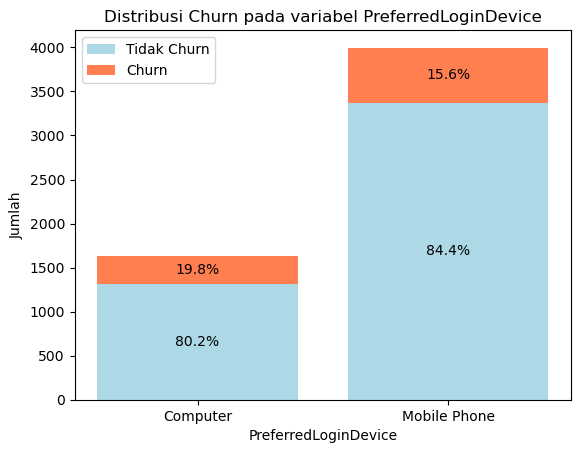

In [34]:
fig, ax = plt.subplots()
bar1 = ax.bar(PreferredLoginDevice['PreferredLoginDevice'], PreferredLoginDevice[0], label='Tidak Churn', color='lightblue')
bar2 = ax.bar(PreferredLoginDevice['PreferredLoginDevice'],PreferredLoginDevice[1], bottom=PreferredLoginDevice[0], label='Churn', color='coral')

# Menambahkan persentase pada setiap segmen
for bar, value, total in zip(bar1, PreferredLoginDevice[0], PreferredLoginDevice['total']):
    percent = f"{(value / total) * 100:.1f}%"
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, percent,
            ha='center', va='center', color='black', fontsize=10)

for bar, value, total, bottom in zip(bar2, PreferredLoginDevice[1], PreferredLoginDevice['total'], PreferredLoginDevice[0]):
    percent = f"{(value / total) * 100:.1f}%"
    ax.text(bar.get_x() + bar.get_width() / 2, bottom + bar.get_height() / 2, percent,
            ha='center', va='center', color='black', fontsize=10)

ax.set_title('Distribusi Churn pada variabel PreferredLoginDevice')
ax.set_xlabel('PreferredLoginDevice')
ax.set_ylabel('Jumlah')
ax.legend()

persentase Churn pada customer yang login menggunakan Computer dan Mobile Phone tidak terlalu jauh. hal ini menunjukkan preferensi login tidak terlalu berpengaruh terhadap churn nya seorang customer

In [35]:
PreferredLoginDevice = pd.crosstab(df['PreferredLoginDevice'], df['Churn'])
print(PreferredLoginDevice)

# Uji Chi-Square
chi2, p, dof, expected = stats.chi2_contingency(PreferredLoginDevice)

print(f"Chi-Square Score: {chi2}")
print(f"P-Value: {p}")

# Interpretasi hasil
if p < 0.05:
    print("Ada hubungan signifikan antara PreferredLoginDevice dan churn.")
else:
    print("Tidak ada hubungan signifikan antara PreferredLoginDevice dan churn.")

Churn                    0    1
PreferredLoginDevice           
Computer              1310  324
Mobile Phone          3372  624
Chi-Square Score: 14.401252650894026
P-Value: 0.00014770402399479684
Ada hubungan signifikan antara PreferredLoginDevice dan churn.


##### __a. Insight: PreferredLoginDevice__
__Insight Utama__

Dari analisis data, ditemukan bahwa terdapat perbedaan signifikan dalam distribusi churn berdasarkan PreferredLoginDevice:
* Jumlah Pelanggan yang Tidak Churn dengan Komputer: 1310
* Jumlah Pelanggan yang Churn dengan Komputer: 324
* Jumlah Pelanggan yang Tidak Churn dengan Ponsel Pintar: 3372
* Jumlah Pelanggan yang Churn dengan Ponsel Pintar: 624

 Terdapat hubungan signifikan antara PreferredLoginDevice dan churn. Pelanggan yang menggunakan komputer cenderung memiliki tingkat churn yang lebih tinggi (19.8%) dibandingkan dengan pelanggan yang menggunakan ponsel pintar (15.6%).

##### __b. Rekomendasi__
__Optimasi Pengalaman Pengguna untuk Perangkat Tertentu__
Pengalaman pengguna adalah bagaimana pengguna berinteraksi dengan dan merasakan aplikasi atau platform. Pengalaman ini mencakup antarmuka pengguna, navigasi, kecepatan respons, dan kenyamanan penggunaan.

Tujuan dari Optimasi Pengalaman Pengguna yaitu untuk Meningkatkan pengalaman pengguna khususnya bagi mereka yang menggunakan komputer, sehingga mengurangi tingkat churn.

##### __c. Action Items__
A/B Testing untuk UI/UX Pengguna Komputer (2-3 Bulan):
   * Membuat dua versi desain UI/UX untuk pengguna komputer (A dan B)
   * Melakukan pengujian A/B dengan membagi pengguna komputer secara acak menjadi dua grup
   * Menganalisis hasil pengujian untuk melihat desain mana yang memberikan engagement dan kepuasan lebih tinggi
   * Mengimplementasikan desain terbaik berdasarkan hasil pengujian

##### __d. Keuntungan bagi E-commerce__
Pengalaman pengguna yang lebih baik akan meningkatkan kepuasan dan loyalitas pelanggan, yang berdampak positif pada word-of-mouth dan reputasi merek

#### __2.9.3. City Tier__

city tier mengacu pada klasifikasi kota berdasarkan tingkat perkembangan ekonomi, populasi, dan infrastruktur.
- tier 1 ==> Kota metropolitan utama dengan infrastruktur maju, ekonomi kuat, dan populasi besar.
- tier 2 ==> Kota besar atau menengah dengan pertumbuhan ekonomi yang baik, tetapi tidak sebesar Tier 1.
- tier 3 ==> Kota kecil atau daerah berkembang dengan akses terbatas ke infrastruktur dan layanan premium.

In [36]:
CityTier = pd.crosstab(index=df['CityTier'],columns=df['Churn']).reset_index()
CityTier['total'] = CityTier[0] + CityTier[1]
CityTier

Churn,CityTier,0,1,total
0,1,3134,532,3666
1,2,194,48,242
2,3,1354,368,1722


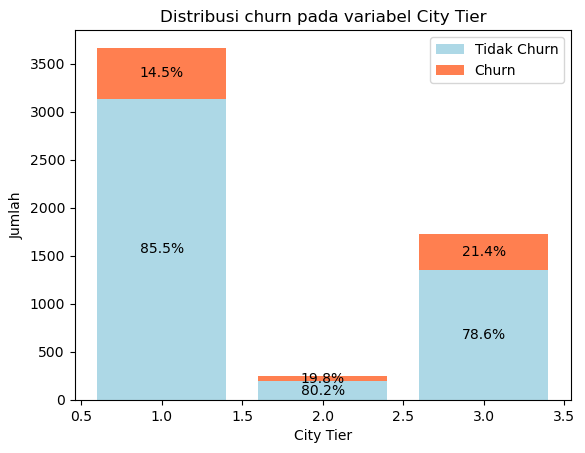

In [37]:
fig, ax = plt.subplots()
bar1 = ax.bar(CityTier['CityTier'], CityTier[0], label='Tidak Churn', color='lightblue')
bar2 = ax.bar(CityTier['CityTier'],CityTier[1], bottom=CityTier[0], label='Churn', color='coral')

# Menambahkan persentase pada setiap segmen
for bar, value, total in zip(bar1, CityTier[0], CityTier['total']):
    percent = f"{(value / total) * 100:.1f}%"
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, percent,
            ha='center', va='center', color='black', fontsize=10)

for bar, value, total, bottom in zip(bar2, CityTier[1], CityTier['total'], CityTier[0]):
    percent = f"{(value / total) * 100:.1f}%"
    ax.text(bar.get_x() + bar.get_width() / 2, bottom + bar.get_height() / 2, percent,
            ha='center', va='center', color='black', fontsize=10)

ax.set_title('Distribusi churn pada variabel City Tier')
ax.set_xlabel('City Tier')
ax.set_ylabel('Jumlah')
ax.legend()

##### __a. Insight: City Tier__
__Insight Utama__
Dari analisis data, ditemukan bahwa terdapat perbedaan signifikan dalam distribusi churn berdasarkan City Tier:
* City Tier 1:
    - Tidak Churn: 85.5%
    - Churn: 14.5%
* City Tier 2:
    - Tidak Churn: 80.2%
    - Churn: 19.8%
* City Tier 3:
    - Tidak Churn: 78.6%
    - Churn: 21.4%

Pelanggan yang berada di City Tier 3 memiliki tingkat churn tertinggi (21.4%), diikuti oleh City Tier 2 (19.8%), dan City Tier 1 (14.5%). Ini menunjukkan bahwa pelanggan di kota-kota dengan infrastruktur yang kurang maju memiliki kecenderungan lebih tinggi untuk churn.

##### __b. Rekomendasi__

__Optimasi Layanan dan Promosi Berdasarkan City Tier__

Layanan adalah segala upaya yang dilakukan untuk meningkatkan kepuasan pelanggan, sementara promosi adalah strategi untuk meningkatkan visibilitas dan daya tarik platform melalui penawaran khusus, diskon, dan insentif lainnya.

Tujuan dari program optimasi layanan Berdasarkan City Tier yaitu meningkatkan kepuasan dan retensi pelanggan di City Tier 2 dan City Tier 3 dengan layanan dan promosi yang disesuaikan.

##### __c. Action Items__

Pengembangan Program Promosi Spesifik untuk City Tier 2 dan City Tier 3 (2-3 Bulan):
- Merancang kampanye promosi yang menargetkan pelanggan di City Tier 2 dan City Tier 3, khusunya program gratis ongkir
- Menggunakan berbagai saluran komunikasi seperti email, notifikasi aplikasi, dan media sosial untuk mencapai target audiens
- Melakukan analisis terhadap efektivitas kampanye dan menyesuaikan strategi berdasarkan hasil

##### __d. Keuntungan bagi E-commerce__
Mengurangi churn pada pelanggan di City Tier 2 dan City Tier 3 akan meningkatkan retensi pelanggan, yang berkontribusi pada stabilitas pendapatan dan mengurangi biaya akuisisi pelanggan baru

#### 2.9.4. WarehouseToHome

__Definisi WarehouseToHome__

WarehouseToHome adalah jarak antara gudang tempat penyimpanan barang dan rumah pelanggan. Jarak ini dapat memengaruhi kepuasan pelanggan terkait kecepatan pengiriman, biaya pengiriman, dan keterjangkauan produk.

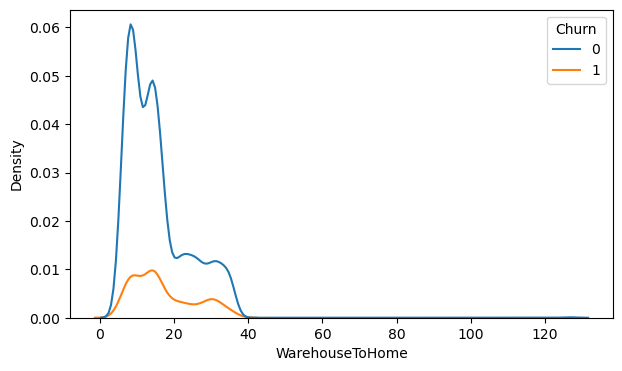

In [38]:
plt.figure(figsize=(7,4))
sns.kdeplot(data= df, x='WarehouseToHome', hue='Churn')
plt.show()

In [39]:
churn = df[df['Churn'] == 1]['WarehouseToHome'].mean()
not_churn = df[df['Churn'] == 0]['WarehouseToHome'].mean()

# uji Mann-Whitney U
stat, p_value = mannwhitneyu(churn, not_churn, alternative='two-sided')

print(f"U-Statistic: {stat}")
print(f"P-Value: {p_value}")

# Interpretasi hasil
alpha = 0.05
if p_value < alpha:
    print("Perbedaan perbedaan jarak WarehouseToHome antara Churn dan Non-Churn signifikan!")
else:
    print("Tidak ada perbedaan signifikan.")

U-Statistic: 1.0
P-Value: 1.0
Tidak ada perbedaan signifikan.


In [40]:
rata_WarehouseToHome_tidakchurn = df[df['Churn'] == 0 ]['WarehouseToHome'].mean()
rata_WarehouseToHome_churn = df[df['Churn'] == 1 ]['WarehouseToHome'].mean()
print(f'rata-rata WarehouseToHome customer Churn adalah {rata_WarehouseToHome_churn}')
print(f'rata-rata WarehouseToHome customer Tidak Churn adalah {rata_WarehouseToHome_tidakchurn}')

rata-rata WarehouseToHome customer Churn adalah 16.856540084388186
rata-rata WarehouseToHome customer Tidak Churn adalah 15.305638615976079


##### __a. Insight: WarehouseToHome__

__Insight Utama__
Dari analisis data, ditemukan bahwa terdapat perbedaan distribusi churn berdasarkan jarak WarehouseToHome. Hasil density plot menunjukkan bahwa pelanggan dengan jarak yang lebih jauh dari gudang cenderung memiliki tingkat churn yang lebih tinggi.

Pelanggan dengan jarak lebih jauh dari gudang cenderung memiliki tingkat churn yang lebih tinggi dibandingkan dengan pelanggan yang lebih dekat ke gudang. Ini menunjukkan bahwa faktor jarak memiliki pengaruh signifikan terhadap churn pelanggan.

##### __b. Rekomendasi__

__Optimasi Logistik dan Pengiriman__
Optimasi logistik adalah proses meningkatkan efisiensi dan efektivitas rantai pasokan dan distribusi dengan tujuan mengurangi biaya dan meningkatkan kepuasan pelanggan.

Tujuan Optimasi Logistik dan Pengiriman yaitu untuk Mengurangi waktu pengiriman dan biaya pengiriman untuk pelanggan yang jauh dari gudang, sehingga meningkatkan kepuasan dan mengurangi churn.

##### __c. Action Items__

Implementasi Strategi Pengiriman tepat waktu untuk Pelanggan Jauh:
- Mengidentifikasi area dengan jarak pengiriman yang jauh dari gudang
- Menyusun strategi pengiriman cepat dengan mitra logistik lokal untuk area tersebut
- Melakukan uji coba strategi pengiriman cepat pada segmen pelanggan tertentu
- Menganalisis hasil uji coba untuk mengukur efektivitas dan kepuasan pelanggan

##### __d. Keuntungan bagi E-commerce__
- Mengurangi churn pada pelanggan yang jauh dari gudang akan meningkatkan retensi pelanggan, yang berkontribusi pada stabilitas pendapatan dan mengurangi biaya akuisisi pelanggan baru
- Pengiriman yang tepat waktu dan biaya pengiriman yang lebih rendah akan meningkatkan kepuasan dan loyalitas pelanggan, yang berdampak positif pada word-of-mouth dan reputasi merek

#### __2.9.5. PreferredPaymentMode__

__Definisi PreferredPaymentMode__

PreferredPaymentMode adalah metode pembayaran yang paling sering digunakan oleh pelanggan untuk melakukan transaksi di platform e-commerce. Metode pembayaran ini mencakup berbagai opsi seperti Cash on Delivery (COD), Credit Card, Debit Card, E-wallet, dan UPI.

In [41]:
PreferredPaymentMode = pd.crosstab(index=df['PreferredPaymentMode'],columns=df['Churn']).reset_index()
PreferredPaymentMode['total'] = PreferredPaymentMode[0] + PreferredPaymentMode[1]
PreferredPaymentMode

Churn,PreferredPaymentMode,0,1,total
0,Cash on Delivery,386,128,514
1,Credit Card,1522,252,1774
2,Debit Card,1958,356,2314
3,E wallet,474,140,614
4,UPI,342,72,414


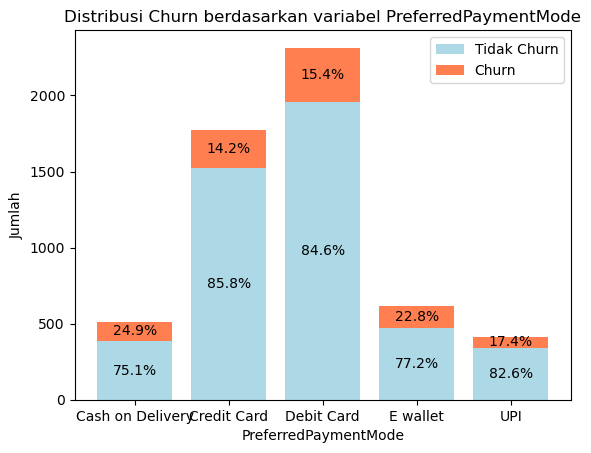

In [42]:
fig, ax = plt.subplots()
bar1 = ax.bar(PreferredPaymentMode['PreferredPaymentMode'], PreferredPaymentMode[0], label='Tidak Churn', color='lightblue')
bar2 = ax.bar(PreferredPaymentMode['PreferredPaymentMode'],PreferredPaymentMode[1], bottom=PreferredPaymentMode[0], label='Churn', color='coral')

# Menambahkan persentase pada setiap segmen
for bar, value, total in zip(bar1, PreferredPaymentMode[0], PreferredPaymentMode['total']):
    percent = f"{(value / total) * 100:.1f}%"
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, percent,
            ha='center', va='center', color='black', fontsize=10)

for bar, value, total, bottom in zip(bar2, PreferredPaymentMode[1], PreferredPaymentMode['total'], PreferredPaymentMode[0]):
    percent = f"{(value / total) * 100:.1f}%"
    ax.text(bar.get_x() + bar.get_width() / 2, bottom + bar.get_height() / 2, percent,
            ha='center', va='center', color='black', fontsize=10)

ax.set_title('Distribusi Churn berdasarkan variabel PreferredPaymentMode')
ax.set_xlabel('PreferredPaymentMode')
ax.set_ylabel('Jumlah')
ax.legend()

In [43]:
PreferredPaymentMode = pd.crosstab(df['PreferredPaymentMode'], df['Churn'])
print(PreferredPaymentMode)

# Uji Chi-Square
chi2, p, dof, expected = stats.chi2_contingency(PreferredPaymentMode)

print(f"Chi-Square Score: {chi2}")
print(f"P-Value: {p}")

# Interpretasi hasil
if p < 0.05:
    print("Ada hubungan signifikan antara PreferredPaymentMode dan churn.")
else:
    print("Tidak ada hubungan signifikan antara PreferredPaymentMode dan churn.")

Churn                    0    1
PreferredPaymentMode           
Cash on Delivery       386  128
Credit Card           1522  252
Debit Card            1958  356
E wallet               474  140
UPI                    342   72
Chi-Square Score: 51.82895974579939
P-Value: 1.4978570960706217e-10
Ada hubungan signifikan antara PreferredPaymentMode dan churn.


##### __a. Insight: PreferredPaymentMode__

__Insight Utama__

Dari analisis data, ditemukan bahwa terdapat perbedaan signifikan dalam distribusi churn berdasarkan PreferredPaymentMode:
* Cash on Delivery (COD):
   - Tidak Churn: 75.1%
   - Churn: 24.9%
* Credit Card:
   - Tidak Churn: 85.8%
   - Churn: 14.2%
* Debit Card:
   - Tidak Churn: 84.6%
   - Churn: 15.4%
* E-wallet:
   - Tidak Churn: 77.2%
   - Churn: 22.8%
* UPI:
   - Tidak Churn: 82.6%
   - Churn: 17.4%

Terdapat hubungan signifikan antara PreferredPaymentMode dan churn. Pelanggan yang menggunakan Cash on Delivery (COD) dan E-wallet memiliki tingkat churn yang lebih tinggi dibandingkan dengan pelanggan yang menggunakan metode pembayaran lain seperti Credit Card, Debit Card, atau UPI.

##### __b. Rekomendasi__

__Meningkatkan Layanan Pelanggan, Kepercayaan dan Keamanan Transaksi, serta Optimasi Pembayaran__

Peningkatan layanan pelanggan, kepercayaan, dan keamanan transaksi dapat meningkatkan kepuasan pelanggan dan mengurangi tingkat churn. Selain itu, optimasi pembayaran dapat membantu meningkatkan efisiensi dan mengurangi biaya operasional.

Tujuannya mengurangi churn dengan memberikan pengalaman pembayaran yang lebih terpercaya bagi pelanggan yang menggunakan metode pembayaran dengan tingkat churn tinggi.

##### __c. Action Items__

__Pengembangan Fitur Pembayaran yang Lebih Mudah dan Aman__
- Membuat panduan atau video tutorial untuk membantu pelanggan memahami cara menggunakan metode pembayaran yang lebih aman dan mudah.
- Simplifikaasi proses pembayaran untuk memudahkan pelanggan melakukan transaksi.
- Menawarkan dukungan 24/7 untuk membantu pelanggan yang mengalami masalah dengan metode pembayaran.
- Mengidentifikasi fitur pembayaran yang dapat meningkatkan kenyamanan dan keamanan pelanggan, seperti penyimpanan informasi pembayaran yang aman, one-click payment, atau integrasi dengan aplikasi pembayaran populer
- Merancang dan mengembangkan fitur tersebut dengan melibatkan tim teknologi dan keamanan
- Melakukan uji coba fitur baru pada segmen pelanggan tertentu dan menganalisis hasilnya

##### __d. Keuntungan bagi E-commerce__
   - Mengurangi churn pada pelanggan yang menggunakan Cash on Delivery (COD) dan E-wallet akan meningkatkan retensi pelanggan, yang berkontribusi pada stabilitas pendapatan dan mengurangi biaya akuisisi pelanggan baru
   - Strategi yang disesuaikan berdasarkan metode pembayaran akan meningkatkan efektivitas program pembayaran dan layanan, yang mengoptimalkan biaya promosi dan retensi

#### __2.9.6. Gender__

__Definisi Gender__

Gender adalah atribut yang menunjukkan jenis kelamin pelanggan, biasanya dikategorikan sebagai pria (male) atau wanita (female). Dalam konteks analisis ini, gender dapat memberikan wawasan mengenai perbedaan perilaku dan preferensi antara pelanggan pria dan wanita.

In [44]:
Gender = pd.crosstab(index=df['Gender'],columns=df['Churn']).reset_index()
Gender['total'] = Gender[0] + Gender[1]
Gender

Churn,Gender,0,1,total
0,Female,1898,348,2246
1,Male,2784,600,3384


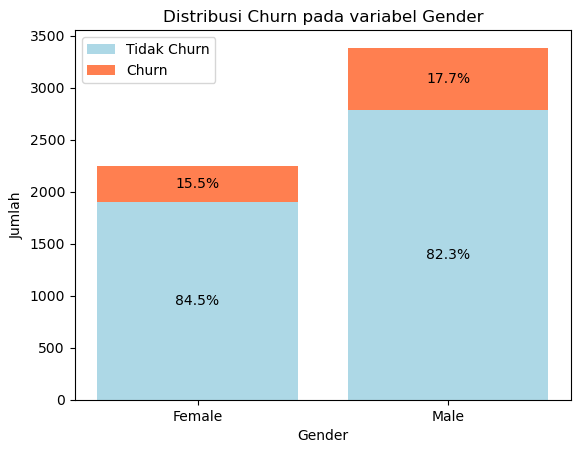

In [45]:
fig, ax = plt.subplots()
bar1 = ax.bar(Gender['Gender'], Gender[0], label='Tidak Churn', color='lightblue')
bar2 = ax.bar(Gender['Gender'], Gender[1], bottom=Gender[0], label='Churn', color='coral')

# Menambahkan persentase pada setiap segmen
for bar, value, total in zip(bar1, Gender[0], Gender['total']):
    percent = f"{(value / total) * 100:.1f}%"
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, percent,
            ha='center', va='center', color='black', fontsize=10)

for bar, value, total, bottom in zip(bar2, Gender[1], Gender['total'], Gender[0]):
    percent = f"{(value / total) * 100:.1f}%"
    ax.text(bar.get_x() + bar.get_width() / 2, bottom + bar.get_height() / 2, percent,
            ha='center', va='center', color='black', fontsize=10)

ax.set_title('Distribusi Churn pada variabel Gender')
ax.set_xlabel('Gender')
ax.set_ylabel('Jumlah')
ax.legend()

##### __a. Insight: Gender__

__Insight Utama__

Dari analisis data, ditemukan bahwa terdapat perbedaan signifikan dalam distribusi churn berdasarkan gender:
* Wanita:
   - Tidak Churn: 84.5%
   - Churn: 15.5%
* Pria:
   - Tidak Churn: 82.3%
   - Churn: 17.7%

Terdapat hubungan signifikan antara gender dan churn. Pelanggan pria memiliki tingkat churn yang lebih tinggi (17.7%) dibandingkan dengan pelanggan wanita (15.5%). Hal ini menunjukkan bahwa faktor gender memiliki pengaruh terhadap churn pelanggan.

##### __b. Rekomendasi__

__Optimasi Program Retensi dan Promosi Berdasarkan Gender__

Program retensi adalah strategi untuk mempertahankan pelanggan yang ada dengan meningkatkan kepuasan mereka, sementara program promosi adalah strategi untuk menarik perhatian dan meningkatkan daya tarik platform melalui penawaran khusus, diskon, dan insentif lainnya.

Tujuannya mengurangi churn dengan memberikan pengalaman yang lebih baik dan menarik bagi pelanggan pria dan wanita melalui program retensi dan promosi yang disesuaikan.

##### __c. Action Items__

__Desain dan Implementasi Program Retensi Khusus untuk Pelanggan Pria__

* Merancang program retensi khusus untuk pelanggan pria, seperti diskon eksklusif, voucher belanja, atau penawaran khusus untuk produk yang lebih sering dibeli oleh pelanggan pria

* Meluncurkan program dengan komunikasi yang efektif melalui email, notifikasi aplikasi, dan media sosial

* Melakukan uji coba program retensi pada segmen pelanggan pria dan menganalisis hasilnya

##### __d. Keuntungan bagi E-commerce__

- Mengurangi churn pada pelanggan pria akan meningkatkan retensi pelanggan, yang berkontribusi pada stabilitas pendapatan dan mengurangi biaya akuisisi pelanggan baru

#### 2.9.7. HourSpendOnApp 

__Definisi HourSpendOnApp__

HourSpendOnApp adalah jumlah waktu yang dihabiskan oleh pelanggan dalam satu minggu untuk menggunakan aplikasi e-commerce. Metrik ini mencerminkan tingkat keterlibatan dan aktivitas pelanggan di platform. Pengguna yang menghabiskan lebih banyak waktu di aplikasi cenderung lebih terlibat dan mungkin lebih puas dengan layanan yang diberikan.

In [46]:
HourSpendOnApp = pd.crosstab(index=df['HourSpendOnApp'],columns=df['Churn']).reset_index()
HourSpendOnApp['total'] = HourSpendOnApp[0] + HourSpendOnApp[1]
HourSpendOnApp

Churn,HourSpendOnApp,0,1,total
0,0.0,3,0,3
1,1.0,35,0,35
2,2.0,1239,232,1471
3,3.0,2424,518,2942
4,4.0,978,198,1176
5,5.0,3,0,3


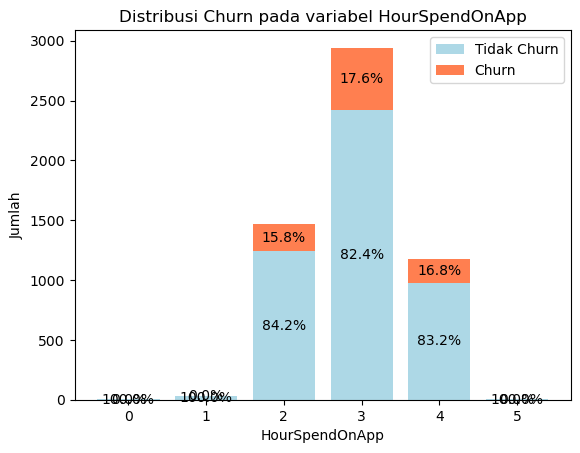

In [47]:
fig, ax = plt.subplots()
bar1 = ax.bar(HourSpendOnApp['HourSpendOnApp'], HourSpendOnApp[0], label='Tidak Churn', color='lightblue')
bar2 = ax.bar(HourSpendOnApp['HourSpendOnApp'], HourSpendOnApp[1], bottom=HourSpendOnApp[0], label='Churn', color='coral')

# Menambahkan persentase pada setiap segmen
for bar, value, total in zip(bar1, HourSpendOnApp[0], HourSpendOnApp['total']):
    percent = f"{(value / total) * 100:.1f}%"
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, percent,
            ha='center', va='center', color='black', fontsize=10)

for bar, value, total, bottom in zip(bar2, HourSpendOnApp[1], HourSpendOnApp['total'], HourSpendOnApp[0]):
    percent = f"{(value / total) * 100:.1f}%"
    ax.text(bar.get_x() + bar.get_width() / 2, bottom + bar.get_height() / 2, percent,
            ha='center', va='center', color='black', fontsize=10)

ax.set_title('Distribusi Churn pada variabel HourSpendOnApp')
ax.set_xlabel('HourSpendOnApp')
ax.set_ylabel('Jumlah')
ax.legend()

In [48]:
HourSpendOnApp = pd.crosstab(df['HourSpendOnApp'], df['Churn'])
print(HourSpendOnApp)

# Uji Chi-Square
chi2, p, dof, expected = stats.chi2_contingency(HourSpendOnApp)

print(f"Chi-Square Score: {chi2}")
print(f"P-Value: {p}")

# Interpretasi hasil
if p < 0.05:
    print("Ada hubungan signifikan antara HourSpendOnApp dan churn.")
else:
    print("Tidak ada hubungan signifikan antara HourSpendOnApp dan churn.")

Churn              0    1
HourSpendOnApp           
0.0                3    0
1.0               35    0
2.0             1239  232
3.0             2424  518
4.0              978  198
5.0                3    0
Chi-Square Score: 10.73853464775109
P-Value: 0.05681772218667573
Tidak ada hubungan signifikan antara HourSpendOnApp dan churn.


##### __a. Insight: HourSpendOnApp__

__Insight Utama__

Dari analisis data, ditemukan bahwa terdapat perbedaan signifikan dalam distribusi churn berdasarkan HourSpendOnApp:

* 0 Jam:
   - Tidak Churn: 100%
   - Churn: 0%

* 1 Jam:
   - Tidak Churn: 100%
   - Churn: 0%

* 2 Jam:
   - Tidak Churn: 84.2%
   - Churn: 15.8%

* 3 Jam:
   - Tidak Churn: 82.4%
   - Churn: 17.6%

* 4 Jam:
   - Tidak Churn: 83.2%
   - Churn: 16.8%

* 5 Jam:
   - Tidak Churn: 100%
   - Churn: 0%

Pelanggan yang menghabiskan lebih banyak waktu di aplikasi (3-4 jam) memiliki tingkat churn yang lebih tinggi dibandingkan dengan pelanggan yang menghabiskan waktu sedikit di aplikasi (0-1 jam) atau waktu yang sangat banyak (5 jam). Hal ini menunjukkan bahwa ada tingkat optimal waktu yang dihabiskan di aplikasi yang berhubungan dengan keterlibatan yang tinggi dan churn yang rendah.

##### __b. Rekomendasi__

__Optimasi Pengalaman Pengguna untuk Meningkatkan Keterlibatan__

Pengalaman pengguna adalah bagaimana pengguna berinteraksi dengan dan merasakan aplikasi atau platform. Pengalaman ini mencakup antarmuka pengguna, navigasi, kecepatan respons, dan kenyamanan penggunaan.

Tujuannya meningkatkan keterlibatan dan kepuasan pelanggan dengan menyediakan pengalaman pengguna yang optimal dan menarik.

##### __c. Action Items__

__A/B Testing untuk Fitur dan UX Aplikasi__

* Membuat dua versi desain UI/UX aplikasi (A dan B) dengan fitur-fitur yang berbeda

* Melakukan pengujian A/B dengan membagi pengguna secara acak menjadi dua grup

* Menganalisis hasil pengujian untuk melihat desain dan fitur mana yang memberikan keterlibatan dan kepuasan lebih tinggi

* Mengimplementasikan desain dan fitur terbaik berdasarkan hasil pengujian

##### __d. Keuntungan bagi E-commerce__

- Strategi yang disesuaikan berdasarkan waktu yang dihabiskan di aplikasi akan meningkatkan efektivitas program UX dan konten, yang mengoptimalkan biaya promosi dan retensi

#### **2.9.8 PreferedOrderCat**

__Definisi PreferredOrderCat__

PreferredOrderCat adalah kategori produk yang paling sering dipesan oleh pelanggan di platform e-commerce. Kategori ini mencakup berbagai jenis produk seperti Fashion, Grocery, Laptop & Accessories, Mobile Phone, dan Others.

In [49]:
df['PreferedOrderCat'].value_counts()

PreferedOrderCat
Mobile Phone          2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: count, dtype: int64

In [50]:
PreferedOrderCat = pd.crosstab(index=df['PreferedOrderCat'],columns=df['Churn']).reset_index()
PreferedOrderCat['total'] = PreferedOrderCat[0] + PreferedOrderCat[1]
PreferedOrderCat

Churn,PreferedOrderCat,0,1,total
0,Fashion,698,128,826
1,Grocery,390,20,410
2,Laptop & Accessory,1840,210,2050
3,Mobile Phone,1510,570,2080
4,Others,244,20,264


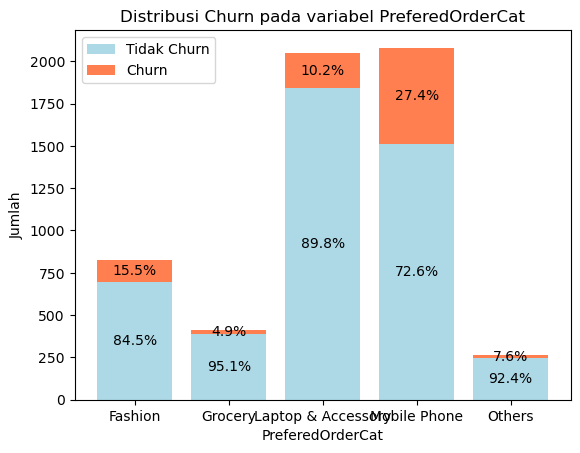

In [51]:
fig, ax = plt.subplots()
bar1 = ax.bar(PreferedOrderCat['PreferedOrderCat'], PreferedOrderCat[0], label='Tidak Churn', color='lightblue')
bar2 = ax.bar(PreferedOrderCat['PreferedOrderCat'], PreferedOrderCat[1], bottom=PreferedOrderCat[0], label='Churn', color='coral')

# Menambahkan persentase pada setiap segmen
for bar, value, total in zip(bar1, PreferedOrderCat[0], PreferedOrderCat['total']):
    percent = f"{(value / total) * 100:.1f}%"
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, percent,
            ha='center', va='center', color='black', fontsize=10)

for bar, value, total, bottom in zip(bar2, PreferedOrderCat[1], PreferedOrderCat['total'], PreferedOrderCat[0]):
    percent = f"{(value / total) * 100:.1f}%"
    ax.text(bar.get_x() + bar.get_width() / 2, bottom + bar.get_height() / 2, percent,
            ha='center', va='center', color='black', fontsize=10)

ax.set_title('Distribusi Churn pada variabel PreferedOrderCat')
ax.set_xlabel('PreferedOrderCat')
ax.set_ylabel('Jumlah')
ax.legend()

 kategori Mobile Phone memiliki churn rate tertinggi (27.4%), jauh lebih tinggi dibandingkan kategori lain. Pembelian Mobile Phone Bersifat One-Time Purchase (Tidak Berulang). Customer yang sudah membeli smartphone mungkin tidak kembali dalam waktu dekat karena masa pakai produk panjang.

##### __a. Insight: PreferredOrderCat__

__Insight Utama__

Dari analisis data dan visualisasi distribusi churn berdasarkan PreferredOrderCat, ditemukan beberapa insight penting:

* Fashion:
   - Tidak Churn: 84.5%
   - Churn: 15.5%

* Grocery:
   - Tidak Churn: 95.1%
   - Churn: 4.9%

* Laptop & Accessories:
   - Tidak Churn: 89.8%
   - Churn: 10.2%

* Mobile Phone:
   - Tidak Churn: 72.6%
   - Churn: 27.4%

* Others:
   - Tidak Churn: 92.4%
   - Churn: 7.6%

Pelanggan yang sering memesan kategori Mobile Phone memiliki tingkat churn yang tertinggi (27.4%), diikuti oleh kategori Fashion (15.5%) dan Laptop & Accessories (10.2%). Pelanggan yang sering memesan kategori Grocery memiliki tingkat churn terendah (4.9%). Hal ini menunjukkan bahwa kategori produk memiliki pengaruh signifikan terhadap churn pelanggan.

##### __b. Rekomendasi__

__Optimasi Program Retensi Berdasarkan Kategori Produk__

Program retensi adalah strategi untuk mempertahankan pelanggan yang ada dengan meningkatkan kepuasan mereka. Program ini mencakup berbagai inisiatif seperti penawaran eksklusif, diskon, dan insentif tambahan.

Tujuannya mengurangi churn dengan memberikan pengalaman yang lebih baik dan menarik bagi pelanggan yang sering memesan kategori produk dengan tingkat churn tinggi.

##### __c. Action Items__

__Desain dan Implementasi Program Retensi Khusus untuk Kategori Produk dengan Tingkat Churn Tinggi__

* Merancang program retensi khusus untuk kategori Mobile Phone, Fashion, dan Laptop & Accessories, seperti diskon eksklusif, voucher belanja, atau penawaran bundling. Sebagai contoh, diskon eksklusif 10% untuk setiap pembelian produk Mobile Phone untuk pelanggan yang pernah membeli produk tersebut sebelumnya.

* Merancang program loyalitas yang memberikan penghargaan kepada pelanggan yang sering memesan kategori produk tertentu, seperti poin loyalitas, diskon eksklusif, atau akses ke penawaran khusus. Sebagai contoh, memberikan poin loyalitas tambahan untuk setiap pembelian produk di kategori Fashion.

* Mengidentifikasi pola pembelian pelanggan berdasarkan kategori produk yang sering mereka pesan.

* Mengembangkan algoritma rekomendasi produk yang menyoroti produk-produk terkait yang mungkin menarik bagi pelanggan berdasarkan riwayat pembelian mereka. Sebagai contoh, merekomendasikan aksesori ponsel untuk pelanggan yang sering membeli produk Mobile Phone.

* Mengintegrasikan fitur rekomendasi ini ke dalam aplikasi dan situs web dengan antarmuka yang mudah digunakan.

* Melakukan uji coba program retensi pada segmen pelanggan tertentu dan menganalisis hasilnya. Sebagai contoh, melakukan uji coba pada pelanggan yang sering membeli kategori Mobile Phone untuk melihat pengaruh diskon terhadap retensi mereka.


##### __d. Keuntungan bagi E-commerce__

   - Mengurangi churn pada pelanggan yang sering memesan kategori produk dengan tingkat churn tinggi akan meningkatkan retensi pelanggan, yang berkontribusi pada stabilitas pendapatan dan mengurangi biaya akuisisi pelanggan baru.


#### __2.9.9. SatisfactionScore__
Skor kepuasan pelanggan terhadap layanan dengan skala 1-5
- 1 = sangat buruk
- 2 = buruk
- 3 = netral
- 4 = baik
- 5 = sangat baik

In [52]:
SatisfactionScore = pd.crosstab(index=df['SatisfactionScore'],columns=df['Churn']).reset_index()
SatisfactionScore['total'] = SatisfactionScore[0] + SatisfactionScore[1]
SatisfactionScore

Churn,SatisfactionScore,0,1,total
0,1,1030,134,1164
1,2,512,74,586
2,3,1406,292,1698
3,4,890,184,1074
4,5,844,264,1108


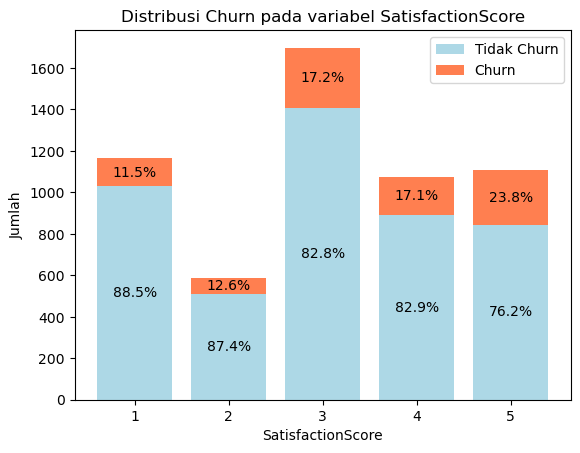

In [53]:
fig, ax = plt.subplots()
bar1 = ax.bar(SatisfactionScore['SatisfactionScore'], SatisfactionScore[0], label='Tidak Churn', color='lightblue')
bar2 = ax.bar(SatisfactionScore['SatisfactionScore'], SatisfactionScore[1], bottom=SatisfactionScore[0], label='Churn', color='coral')

# Menambahkan persentase pada setiap segmen
for bar, value, total in zip(bar1, SatisfactionScore[0], SatisfactionScore['total']):
    percent = f"{(value / total) * 100:.1f}%"
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, percent,
            ha='center', va='center', color='black', fontsize=10)

for bar, value, total, bottom in zip(bar2, SatisfactionScore[1], SatisfactionScore['total'], SatisfactionScore[0]):
    percent = f"{(value / total) * 100:.1f}%"
    ax.text(bar.get_x() + bar.get_width() / 2, bottom + bar.get_height() / 2, percent,
            ha='center', va='center', color='black', fontsize=10)

ax.set_title('Distribusi Churn pada variabel SatisfactionScore')
ax.set_xlabel('SatisfactionScore')
ax.set_ylabel('Jumlah')
ax.legend()

In [54]:
SatisfactionScore = pd.crosstab(df['SatisfactionScore'], df['Churn'])
# print(SatisfactionScore)

# Uji Chi-Square
chi2, p, dof, expected = stats.chi2_contingency(SatisfactionScore)

print(f"Chi-Square Score: {chi2}")
print(f"P-Value: {p}")

# Interpretasi hasil
if p < 0.05:
    print("Ada hubungan signifikan antara SatisfactionScore dan churn.")
else:
    print("Tidak ada hubungan signifikan antara SatisfactionScore dan churn.")

Chi-Square Score: 69.8653884066938
P-Value: 2.4233349782737515e-14
Ada hubungan signifikan antara SatisfactionScore dan churn.


In [55]:
rata_SatisfactionScore_tidakchurn = df[df['Churn'] == 0 ]['SatisfactionScore'].mean()
rata_SatisfactionScore_churn = df[df['Churn'] == 1 ]['SatisfactionScore'].mean()
print(f'rata-rata SatisfactionScore customer Churn adalah {(rata_SatisfactionScore_churn).round(2)}')
print(f'rata-rata SatisfactionScore customer Tidak Churn adalah {(rata_SatisfactionScore_tidakchurn).round(2)}')

rata-rata SatisfactionScore customer Churn adalah 3.39
rata-rata SatisfactionScore customer Tidak Churn adalah 3.0


##### __a. Insight: SatisfactionScore__

__Insight Utama__

Dari analisis data, ditemukan bahwa terdapat perbedaan signifikan dalam distribusi churn berdasarkan SatisfactionScore:

* SatisfactionScore 1:
   - Tidak Churn: 88.5%
   - Churn: 11.5%

* SatisfactionScore 2:
   - Tidak Churn: 87.4%
   - Churn: 12.6%

* SatisfactionScore 3:
   - Tidak Churn: 82.8%
   - Churn: 17.2%

* SatisfactionScore 4:
   - Tidak Churn: 82.9%
   - Churn: 17.1%

* SatisfactionScore 5:
   - Tidak Churn: 76.2%
   - Churn: 23.8%

Pelanggan dengan SatisfactionScore yang lebih rendah cenderung memiliki tingkat churn yang lebih tinggi. SatisfactionScore yang lebih tinggi cenderung berhubungan dengan tingkat churn yang lebih rendah, tetapi ada pengecualian untuk SatisfactionScore 5, yang memiliki tingkat churn tertinggi (23.8%).

##### __b. Rekomendasi__

__Pengembangan Sistem Feedback untuk Kepuasan Pelanggan__

Sistem feedback adalah mekanisme yang memungkinkan pelanggan untuk memberikan umpan balik secara mudah dan terstruktur mengenai pengalaman mereka dengan layanan. Ini mencakup survei kepuasan, formulir umpan balik, dan alat penilaian lainnya.

Tujuannya mengidentifikasi sumber ketidakpuasan pelanggan dan memberikan solusi yang tepat waktu untuk meningkatkan kepuasan dan mengurangi churn.

##### __c. Action Items__

__Pengembangan Program Quick Response untuk Ketidakpuasan Pelanggan__

* Menerapkan sistem notifikasi otomatis untuk memberitahu tim layanan pelanggan setiap kali ada feedback negatif atau SatisfactionScore rendah
* Melatih tim layanan pelanggan untuk menangani keluhan dengan cepat dan efektif, termasuk menyediakan solusi atau kompensasi yang sesuai
* Melakukan follow-up dengan pelanggan untuk memastikan masalah mereka telah diselesaikan dan meningkatkan kepuasan mereka


##### __d. Keuntungan bagi E-commerce__

- Mengurangi churn pada pelanggan dengan SatisfactionScore rendah akan meningkatkan retensi pelanggan, yang berkontribusi pada stabilitas pendapatan dan mengurangi biaya akuisisi pelanggan baru


#### **2.9.10. MaritalStatus**

In [56]:
MaritalStatus = pd.crosstab(index=df['MaritalStatus'],columns=df['Churn']).reset_index()
MaritalStatus['total'] = MaritalStatus[0] + MaritalStatus[1]
MaritalStatus

Churn,MaritalStatus,0,1,total
0,Divorced,724,124,848
1,Married,2642,344,2986
2,Single,1316,480,1796


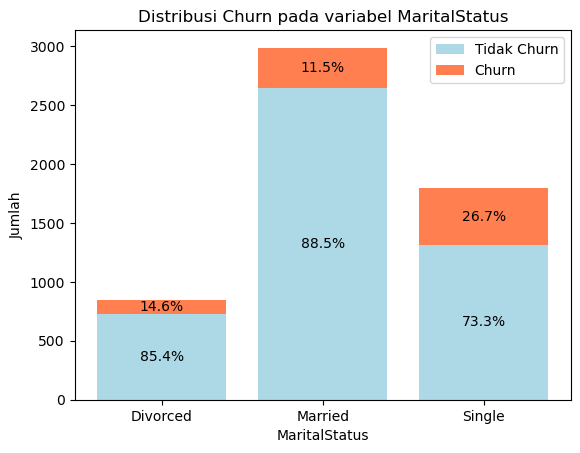

In [57]:
fig, ax = plt.subplots()
bar1 = ax.bar(MaritalStatus['MaritalStatus'], MaritalStatus[0], label='Tidak Churn', color='lightblue')
bar2 = ax.bar(MaritalStatus['MaritalStatus'], MaritalStatus[1], bottom=MaritalStatus[0], label='Churn', color='coral')

# Menambahkan persentase pada setiap segmen
for bar, value, total in zip(bar1, MaritalStatus[0], MaritalStatus['total']):
    percent = f"{(value / total) * 100:.1f}%"
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, percent,
            ha='center', va='center', color='black', fontsize=10)

for bar, value, total, bottom in zip(bar2, MaritalStatus[1], MaritalStatus['total'], MaritalStatus[0]):
    percent = f"{(value / total) * 100:.1f}%"
    ax.text(bar.get_x() + bar.get_width() / 2, bottom + bar.get_height() / 2, percent,
            ha='center', va='center', color='black', fontsize=10)

ax.set_title('Distribusi Churn pada variabel MaritalStatus')
ax.set_xlabel('MaritalStatus')
ax.set_ylabel('Jumlah')
ax.legend()

##### __a. Insight__
* __Tingkat churn tertinggi__ terdapat pada pelanggan yang berstatus Single (26.7%), dibandingkan Married (11.5%) dan Divorced (14.6%).

* Pelanggan yang menikah (Married) memiliki tingkat churn terendah (11.5%), dengan mayoritas (88.5%) masih bertahan sebagai pelanggan.

* Pelanggan Single lebih rentan untuk churn, yang dapat mengindikasikan bahwa mereka lebih mudah beralih ke layanan lain, lebih sensitif terhadap harga, atau memiliki kebutuhan layanan yang berbeda.

##### __b. Rekomendasi__
* Fokus pada retensi pelanggan Single, karena mereka memiliki tingkat churn tertinggi.

* Evaluasi layanan untuk pelanggan Married, karena mereka lebih loyal—dapat menjadi target untuk program upselling atau cross-selling.

* Pertimbangkan faktor eksternal yang memengaruhi churn pada setiap status pernikahan, misalnya harga layanan, promo, atau preferensi layanan.

##### __C. Action Item__

* Personalisasi Promosi untuk Pelanggan Single

* Upselling & Cross-selling untuk Pelanggan Married

#### **2.9.11. Complain**


In [58]:
Complain = pd.crosstab(index=df['Complain'],columns=df['Churn']).reset_index()
Complain['total'] = Complain[0] + Complain[1]
Complain

Churn,Complain,0,1,total
0,0,3586,440,4026
1,1,1096,508,1604


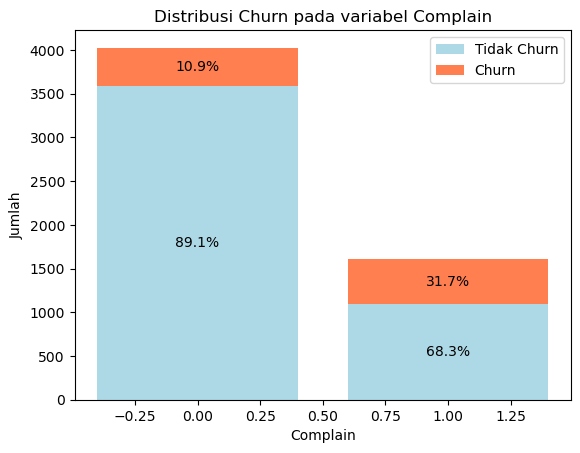

In [59]:
fig, ax = plt.subplots()
bar1 = ax.bar(Complain['Complain'], Complain[0], label='Tidak Churn', color='lightblue')
bar2 = ax.bar(Complain['Complain'], Complain[1], bottom=Complain[0], label='Churn', color='coral')

# Menambahkan persentase pada setiap segmen
for bar, value, total in zip(bar1, Complain[0], Complain['total']):
    percent = f"{(value / total) * 100:.1f}%"
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, percent,
            ha='center', va='center', color='black', fontsize=10)

for bar, value, total, bottom in zip(bar2, Complain[1], Complain['total'], Complain[0]):
    percent = f"{(value / total) * 100:.1f}%"
    ax.text(bar.get_x() + bar.get_width() / 2, bottom + bar.get_height() / 2, percent,
            ha='center', va='center', color='black', fontsize=10)

ax.set_title('Distribusi Churn pada variabel Complain')
ax.set_xlabel('Complain')
ax.set_ylabel('Jumlah')
ax.legend()

##### __a. Insight__

* Pelanggan yang mengajukan komplain memiliki tingkat churn lebih tinggi (31.7%) dibandingkan yang tidak mengajukan komplain (10.9%).
* Sebagian besar pelanggan yang tidak mengajukan komplain tetap bertahan (89.1%), menunjukkan bahwa mereka mungkin lebih puas dengan layanan.
* Pelanggan yang mengajukan komplain lebih rentan untuk churn, yang bisa mengindikasikan bahwa keluhan mereka tidak ditangani dengan baik atau mereka kecewa dengan layanan yang diterima.

##### __b. Rekomendasi__

* Perbaiki sistem penanganan komplain agar pelanggan merasa didengar dan masalah mereka segera ditindaklanjuti.
* Identifikasi pola dalam komplain untuk memahami masalah yang sering muncul dan mencari solusi sistematis.
* Berikan insentif kepada pelanggan yang mengajukan komplain agar mereka tetap bertahan, misalnya diskon atau layanan tambahan sebagai bentuk goodwill.

##### __c. Action Item__

* Optimalkan Customer Service dan perbaiki pelayanannya
Tingkatkan waktu respons dan penyelesaian komplain.
Berikan pelatihan kepada tim customer service agar lebih proaktif dan empatik dalam menangani keluhan pelanggan.
Analisis Akar Masalah Komplain

* Lakukan analisis terhadap jenis komplain yang sering diajukan.
Buat perbaikan produk atau layanan berdasarkan pola komplain.

* Program Retensi Pelanggan
Kirimkan follow-up kepada pelanggan setelah komplain untuk memastikan masalah mereka terselesaikan.
Tawarkan program loyalitas atau diskon khusus bagi pelanggan yang mengajukan komplain untuk meningkatkan kepuasan mereka.

#### **2.9.12. OrderAmountHikeFromlastYear**


In [60]:
df['OrderAmountHikeFromlastYear'].value_counts()

OrderAmountHikeFromlastYear
15.0    807
14.0    750
13.0    741
12.0    728
11.0    391
16.0    333
18.0    321
19.0    311
17.0    297
20.0    243
21.0    190
22.0    184
23.0    144
24.0     84
25.0     73
26.0     33
Name: count, dtype: int64

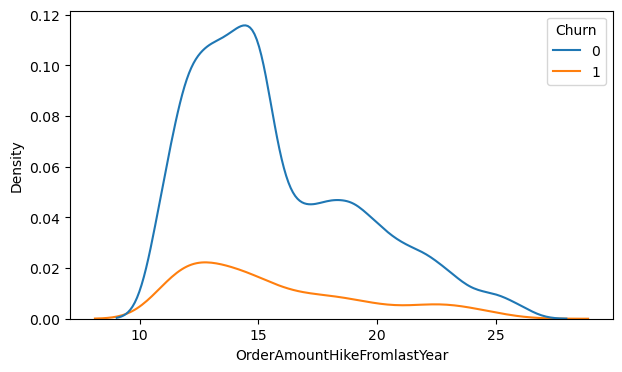

In [61]:
plt.figure(figsize=(7,4))
sns.kdeplot(data= df, x='OrderAmountHikeFromlastYear', hue='Churn')
plt.show()

In [62]:
churn = df[df['Churn'] == 1]['OrderAmountHikeFromlastYear'].mean()
not_churn = df[df['Churn'] == 0]['OrderAmountHikeFromlastYear'].mean()

# uji Mann-Whitney U
stat, p_value = mannwhitneyu(churn, not_churn, alternative='two-sided')

print(f"U-Statistic: {stat}")
print(f"P-Value: {p_value}")

# Interpretasi hasil
alpha = 0.05
if p_value < alpha:
    print("Perbedaan OrderAmountHikeFromlastYear antara Customer Churn dan Customer Non-Churn signifikan!")
else:
    print("Tidak ada perbedaan signifikan.")

U-Statistic: 0.0
P-Value: 1.0
Tidak ada perbedaan signifikan.


In [63]:
rata_OrderAmountHikeFromlastYear_tidakchurn = df[df['Churn'] == 0 ]['OrderAmountHikeFromlastYear'].mean()
rata_OrderAmountHikeFromlastYear_churn = df[df['Churn'] == 1 ]['OrderAmountHikeFromlastYear'].mean()
print(f'rata-rata OrderAmountHikeFromlastYear customer Churn adalah {(rata_OrderAmountHikeFromlastYear_churn).round(2)}')
print(f'rata-rata OrderAmountHikeFromlastYear customer Tidak Churn adalah {(rata_OrderAmountHikeFromlastYear_tidakchurn).round(2)}')

rata-rata OrderAmountHikeFromlastYear customer Churn adalah 15.62
rata-rata OrderAmountHikeFromlastYear customer Tidak Churn adalah 15.69


##### __a. Insight__

* Pelanggan yang churn cenderung memiliki distribusi OrderAmountHikeFromLastYear yang lebih rendah dibandingkan pelanggan yang tidak churn.
* Mayoritas pelanggan yang tidak churn memiliki peningkatan jumlah pesanan yang lebih tinggi, terutama berkisar antara 10 hingga 20.
* Pelanggan yang mengalami kenaikan pesanan lebih kecil lebih rentan untuk churn, yang bisa mengindikasikan bahwa mereka kurang puas dengan harga atau layanan yang diberikan.

##### __b. Rekomendasi__

* Pantau pelanggan dengan kenaikan pesanan kecil karena mereka memiliki kecenderungan lebih tinggi untuk churn.
* Berikan insentif kepada pelanggan dengan kenaikan pesanan rendah agar mereka tetap bertahan dan meningkatkan jumlah transaksi.
* Analisis lebih lanjut apakah ada faktor lain seperti harga, promosi, atau pengalaman pelanggan yang menyebabkan churn.

##### __c. Action Item__
* Program Diskon dan Cashback
Penawaran diskon eksklusif untuk pelanggan dengan kenaikan order kecil agar mereka lebih termotivasi untuk melakukan transaksi lebih banyak.
Buat program cashback bagi pelanggan yang melakukan repeat order.
Personalisasi Penawaran Berdasarkan Pola Order

* Lakukan survei kepada pelanggan churn untuk mengetahui apakah kenaikan harga menjadi faktor utama mereka berhenti menggunakan layanan.
Evaluasi kembali strategi pricing dan pastikan bahwa kenaikan harga masih sesuai dengan nilai yang diterima pelanggan.

#### **2.9.13. CouponUsed**
Jumlah total kupon yang telah digunakan bulan lalu

In [64]:
df['CouponUsed'].value_counts()

CouponUsed
1.0     2361
2.0     1283
0.0     1030
3.0      327
4.0      197
5.0      129
6.0      108
7.0       89
8.0       42
10.0      14
9.0       13
11.0      12
12.0       9
13.0       8
14.0       5
16.0       2
15.0       1
Name: count, dtype: int64

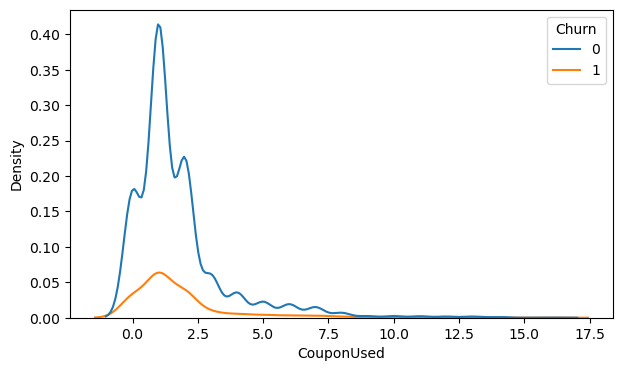

In [65]:
plt.figure(figsize=(7,4))
sns.kdeplot(data= df, x='CouponUsed', hue='Churn')
plt.show()

In [66]:
churn = df[df['Churn'] == 1]['CouponUsed'].mean()
not_churn = df[df['Churn'] == 0]['CouponUsed'].mean()

# uji Mann-Whitney U
stat, p_value = mannwhitneyu(churn, not_churn, alternative='two-sided')

print(f"U-Statistic: {stat}")
print(f"P-Value: {p_value}")

# Interpretasi hasil
alpha = 0.05
if p_value < alpha:
    print("Perbedaan CouponUsed antara Customer Churn dan Customer Non-Churn signifikan!")
else:
    print("Tidak ada perbedaan signifikan.")

U-Statistic: 0.0
P-Value: 1.0
Tidak ada perbedaan signifikan.


In [67]:
rata_CouponUsed_tidakchurn = df[df['Churn'] == 0 ]['CouponUsed'].mean()
rata_CouponUsed_churn = df[df['Churn'] == 1 ]['CouponUsed'].mean()
print(f'rata-rata CouponUsed customer Churn adalah {(rata_CouponUsed_churn).round(2)}')
print(f'rata-rata CouponUsed customer Tidak Churn adalah {(rata_CouponUsed_tidakchurn).round(2)}')

rata-rata CouponUsed customer Churn adalah 1.71
rata-rata CouponUsed customer Tidak Churn adalah 1.72


##### __a. Insight__

* **Penggunaan Kupon dan Churn**: Grafik ini menunjukkan hubungan antara penggunaan kupon dan tingkat churn (pelanggan yang berhenti berlangganan). Terlihat bahwa pelanggan yang menggunakan kupon cenderung memiliki tingkat churn yang lebih rendah (garis biru) dibandingkan dengan pelanggan yang tidak menggunakan kupon (garis oranye).

* **Distribusi Penggunaan Kupon**: Sebagian besar pelanggan tidak menggunakan kupon sama sekali (terlihat dari puncak tertinggi pada nilai 0). Namun, ada juga kelompok pelanggan yang menggunakan kupon dalam jumlah tertentu.

* **Perbedaan Churn**: Perbedaan tingkat churn antara kedua kelompok (pengguna kupon dan bukan pengguna kupon) cukup signifikan, terutama pada nilai penggunaan kupon yang lebih tinggi.

##### __b. Rekomendasi__

* **Promosikan Penggunaan Kupon**: Berdasarkan insight di atas, direkomendasikan untuk lebih aktif mempromosikan penggunaan kupon kepada pelanggan. Ini dapat membantu mengurangi tingkat churn dan meningkatkan retensi pelanggan.
Segmentasi Pelanggan: Lakukan segmentasi pelanggan berdasarkan perilaku penggunaan kupon mereka. Kelompokkan pelanggan yang sering menggunakan kupon dan berikan penawaran atau hadiah khusus untuk mempertahankan mereka.

* **Analisis Lebih Lanjut**: Lakukan analisis lebih lanjut untuk memahami mengapa pelanggan yang menggunakan kupon memiliki tingkat churn yang lebih rendah. Apakah mereka merasa lebih dihargai? Apakah kupon membantu meningkatkan loyalitas?
Variasi Kupon: Uji berbagai jenis kupon dan promosi untuk melihat mana yang paling efektif dalam mengurangi churn. Misalnya, berikan kupon diskon, hadiah gratis, atau penawaran khusus lainnya.

##### __c. Action Item__

* **Kampanye Pemasaran Kupon**: Buat kampanye pemasaran yang menarik untuk mempromosikan penggunaan kupon. Gunakan berbagai saluran komunikasi seperti email, media sosial, atau iklan online.

* **Program Loyalitas**: Pertimbangkan untuk membuat program loyalitas yang memberikan penghargaan kepada pelanggan yang sering menggunakan kupon atau melakukan pembelian berulang.

* **Personalisasi Kupon**: Personalisasikan penawaran kupon berdasarkan preferensi dan riwayat pembelian pelanggan.

#### **2.9.14. OrderCount**

In [68]:
df['OrderCount'].value_counts()

OrderCount
2.0     2283
1.0     1751
3.0      371
7.0      206
4.0      204
5.0      181
8.0      172
6.0      137
9.0       62
12.0      54
11.0      51
10.0      36
14.0      36
15.0      33
13.0      30
16.0      23
Name: count, dtype: int64

In [69]:
OrderCount = pd.crosstab(index=df['OrderCount'],columns=df['Churn']).reset_index()
OrderCount['total'] = OrderCount[0] + OrderCount[1]
OrderCount

Churn,OrderCount,0,1,total
0,1.0,1435,316,1751
1,2.0,1895,388,2283
2,3.0,303,68,371
3,4.0,176,28,204
4,5.0,167,14,181
5,6.0,121,16,137
6,7.0,164,42,206
7,8.0,140,32,172
8,9.0,54,8,62
9,10.0,28,8,36


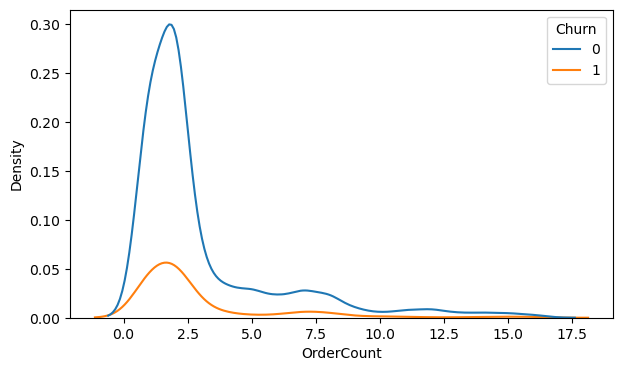

In [70]:
plt.figure(figsize=(7,4))
sns.kdeplot(data= df, x='OrderCount', hue='Churn')
plt.show()

In [71]:
churn = df[df['Churn'] == 1]['OrderCount'].mean()
not_churn = df[df['Churn'] == 0]['OrderCount'].mean()

# uji Mann-Whitney U
stat, p_value = mannwhitneyu(churn, not_churn, alternative='two-sided')

print(f"U-Statistic: {stat}")
print(f"P-Value: {p_value}")

# Interpretasi hasil
alpha = 0.05
if p_value < alpha:
    print("Perbedaan rata-rata OrderCount antara Customer Churn dan Customer Non-Churn signifikan!")
else:
    print("Tidak ada perbedaan signifikan.")

U-Statistic: 0.0
P-Value: 1.0
Tidak ada perbedaan signifikan.


In [72]:
rata_ordercount_tidakchurn = df[df['Churn'] == 0 ]['OrderCount'].mean()
rata_ordercount_churn = df[df['Churn'] == 1 ]['OrderCount'].mean()
print(f'rata-rata order count customer Churn adalah {(rata_ordercount_churn).round(2)}')
print(f'rata-rata order count customer Tidak Churn adalah {(rata_ordercount_tidakchurn).round(2)}')

rata-rata order count customer Churn adalah 2.81
rata-rata order count customer Tidak Churn adalah 2.99


##### __a. Insight__
* **Pengaruh OrderCount terhadap Churn**: Grafik ini menggambarkan hubungan antara jumlah pesanan (OrderCount) dan tingkat churn (pelanggan yang berhenti berlangganan). Terlihat bahwa pelanggan yang memiliki jumlah pesanan lebih tinggi cenderung memiliki tingkat churn yang lebih rendah.
* **Perbedaan Churn yang Signifikan**: Pada nilai OrderCount yang rendah (sekitar 0-2), perbedaan tingkat churn antara pelanggan yang churn dan tidak churn sangat besar. Namun, seiring bertambahnya OrderCount, perbedaan ini semakin mengecil.
* **Mayoritas Pelanggan dengan OrderCount Rendah**: Mayoritas pelanggan memiliki jumlah pesanan yang rendah (terlihat dari puncak tertinggi pada nilai 0). Hal ini mengindikasikan bahwa banyak pelanggan yang mungkin baru pertama kali atau beberapa kali melakukan pembelian.

##### __b. Rekomendasi__

* **Personalisasi Penawaran lebih akurat**: Personalisasikan penawaran dan promosi berdasarkan riwayat pembelian pelanggan. Tawarkan produk atau diskon yang relevan dengan minat mereka.
* **Program Loyalitas**: Buat program loyalitas yang memberikan penghargaan kepada pelanggan yang sering melakukan pembelian. Semakin banyak pesanan, semakin banyak keuntungan yang didapatkan.

##### __c. Action Item__

* **Kampanye Pemasaran Ulang**: Buat kampanye pemasaran ulang yang menargetkan pelanggan dengan OrderCount rendah. Tawarkan diskon khusus atau hadiah menarik untuk mendorong mereka melakukan pembelian lagi.
* **Pembuatan Alghoritma Rekomendasi Barang yang lebih akurat**: Pemutakhiran sistem untuk mendeteksi barang favorit pelanggan
* **Pemberian Penawaran Menarik**: Bagi pelanggan yang melakukan order dalam jumlah tertentu dan periode tertentu akan mendapatkan bonus atau diskon menarik

#### **2.9.15 DaySinceLastOrder**
mengacu pada jumlah hari sejak pelanggan terakhir kali melakukan pembelian atau transaksi

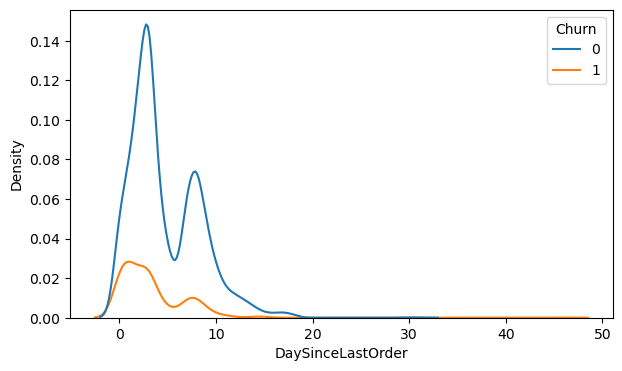

In [73]:
plt.figure(figsize=(7,4))
sns.kdeplot(data= df, x='DaySinceLastOrder', hue='Churn')
plt.show()

In [74]:
churn = df[df['Churn'] == 1]['DaySinceLastOrder'].mean()
not_churn = df[df['Churn'] == 0]['DaySinceLastOrder'].mean()

# uji Mann-Whitney U
stat, p_value = mannwhitneyu(churn, not_churn, alternative='two-sided')

print(f"U-Statistic: {stat}")
print(f"P-Value: {p_value}")

# Interpretasi hasil
alpha = 0.05
if p_value < alpha:
    print("Perbedaan DaySinceLastOrder antara Customer Churn dan Customer Non-Churn signifikan!")
else:
    print("Tidak ada perbedaan signifikan.")

U-Statistic: 0.0
P-Value: 1.0
Tidak ada perbedaan signifikan.


In [75]:
rata_DaySinceLastOrder_tidakchurn = df[df['Churn'] == 0 ]['DaySinceLastOrder'].mean()
rata_DaySinceLastOrder_churn = df[df['Churn'] == 1 ]['DaySinceLastOrder'].mean()
print(f'rata-rata DaySinceLastOrder customer Churn adalah {rata_DaySinceLastOrder_churn}')
print(f'rata-rata DaySinceLastOrder customer Tidak Churn adalah {rata_DaySinceLastOrder_tidakchurn}')

rata-rata DaySinceLastOrder customer Churn adalah 3.2225738396624473
rata-rata DaySinceLastOrder customer Tidak Churn adalah 4.709739427595045


##### **Insight**  

* **Sebagian besar pelanggan melakukan pemesanan terakhir dalam waktu dekat**  
   - Mayoritas pelanggan yang tidak churn (label 0) memiliki waktu sejak pemesanan terakhir kurang dari 10 hari.  
   - Ada dua puncak pada pelanggan non-churn, sekitar 2-3 hari dan 8-10 hari.
* **Pelanggan yang churn memiliki pola distribusi lebih merata tetapi tetap rendah**  
   - Pelanggan churn (label 1) juga cenderung memiliki pemesanan terakhir dalam 10 hari terakhir, tetapi distribusinya lebih rendah dibandingkan non-churn.  
   - Beberapa pelanggan churn memiliki nilai `DaySinceLastOrder` yang lebih tinggi (di atas 30 hari), menunjukkan bahwa semakin lama pelanggan tidak melakukan pemesanan, semakin besar kemungkinan mereka churn.  
* **Tidak ada pelanggan aktif dengan DaySinceLastOrder > 30 hari**  
   - Pelanggan dengan DaySinceLastOrder lebih dari 30 hari tampaknya semuanya churn, menunjukkan batas kritis di mana pelanggan sangat mungkin churn.  


##### **Recommendation**

1. **Optimalkan strategi retensi berbasis perilaku**  
   - Jika pola churn lebih tinggi setelah 10 hari tanpa pemesanan, perlu strategi retensi seperti "re-engagement campaign" dengan menawarkan promo khusus bagi pelanggan yang hampir churn.  
   - Analisis data historis untuk memprediksi kapan pelanggan berisiko churn dan intervensi lebih awal dengan program loyalitas atau insentif.  

2. **Pantau pelanggan baru lebih ketat**  
   - Jika pelanggan baru tidak melakukan pemesanan kembali dalam 7 hari pertama, ada risiko mereka churn lebih cepat.  
   - Lakukan pendekatan khusus untuk meningkatkan engagement pelanggan baru, seperti email onboarding atau kupon selamat datang.  

##### **Action Item**  

1. **Identifikasi alasan churn untuk pelanggan dengan DaySinceLastOrder > 30 hari**  
   - Lakukan analisis lebih lanjut atau survei kepada pelanggan yang sudah lama tidak bertransaksi untuk mengetahui alasan mereka tidak kembali.  
   - Apakah mereka mengalami kendala dalam layanan, berpindah ke kompetitor, atau tidak memiliki kebutuhan lagi?
   
2. **Bangun sistem notifikasi dan reminder untuk pelanggan dengan DaySinceLastOrder > 7 hari**  
   - Kirimkan pengingat atau penawaran khusus untuk pelanggan yang tidak melakukan pemesanan dalam 7-10 hari terakhir untuk mencegah mereka churn.  
   - Bisa dalam bentuk diskon eksklusif, rekomendasi produk, atau layanan gratis.  

#### **2.9.16** CashbackAmount

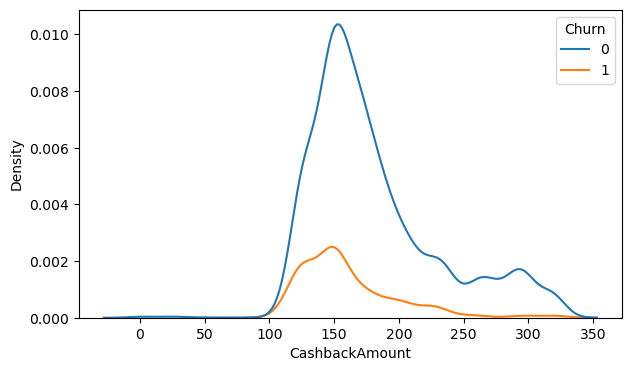

In [76]:
plt.figure(figsize=(7,4))
sns.kdeplot(data= df, x='CashbackAmount', hue='Churn')
plt.show()

In [77]:
churn = df[df['Churn'] == 1]['CashbackAmount'].mean()
not_churn = df[df['Churn'] == 0]['CashbackAmount'].mean()

# uji Mann-Whitney U
stat, p_value = mannwhitneyu(churn, not_churn, alternative='two-sided')

print(f"U-Statistic: {stat}")
print(f"P-Value: {p_value}")

# Interpretasi hasil
alpha = 0.05
if p_value < alpha:
    print("Perbedaan rata-rata CashbackAmount antara Customer Churn dan Customer Non-Churn signifikan!")
else:
    print("Tidak ada perbedaan signifikan.")

U-Statistic: 0.0
P-Value: 1.0
Tidak ada perbedaan signifikan.


In [78]:
rata_CashbackAmount_tidakchurn = df[df['Churn'] == 0 ]['CashbackAmount'].mean()
rata_CashbackAmount_churn = df[df['Churn'] == 1 ]['CashbackAmount'].mean()
print(f'rata-rata CashbackAmount customer Churn adalah {rata_CashbackAmount_churn}')
print(f'rata-rata CashbackAmount customer Tidak Churn adalah {rata_CashbackAmount_tidakchurn}')

rata-rata CashbackAmount customer Churn adalah 160.3709282700422
rata-rata CashbackAmount customer Tidak Churn adalah 180.63520290474156


##### **Insight**  

1. **Mayoritas pelanggan menerima cashback di kisaran 100-200**  
   - Distribusi cashback paling tinggi berada di sekitar 150.  
   - Pelanggan yang tidak churn (label 0) memiliki distribusi cashback yang lebih tinggi dan lebih tersebar, mencapai hingga 300+.  

2. **Pelanggan yang churn cenderung menerima cashback lebih rendah**  
   - Distribusi pelanggan churn (label 1) mulai muncul di sekitar 100 dan menurun setelahnya.  
   - Pelanggan churn jarang menerima cashback dalam jumlah besar (>200).  

3. **Cashback yang lebih besar mungkin berkorelasi dengan retensi pelanggan**  
   - Pelanggan yang menerima cashback lebih besar tampaknya lebih cenderung tetap bertahan.  
   - Pelanggan churn lebih umum di kelompok dengan cashback lebih rendah.  

##### **Recommendation** 

1. **Optimalkan program cashback untuk meningkatkan retensi**  
   - Jika pelanggan churn lebih banyak pada cashback rendah, pertimbangkan untuk meningkatkan cashback bagi pelanggan berisiko churn.  
   - Luncurkan program insentif berbasis loyalitas yang memberikan lebih banyak cashback kepada pelanggan aktif.  

##### **Action Item**
1. **Personalisasi strategi cashback berdasarkan pola penggunaan**  
   - cashback yang lebih besar akan diberikan untuk pelanggan yang sering melakukan transaksi guna meningkatkan loyalitas.  
   - Jika pelanggan memiliki cashback rendah dan menunjukkan tanda-tanda churn, maka akan ada promo eksklusif untuk meningkatkan engagement mereka.


#### 2.9.17. NumberOfAddress Feature

__Defenisi NumberOfAddress__

Fitur 'NumberOfAddress' menunjukkan jumlah alamat yang didaftarkan oleh pelanggan di aplikasi e-commerce. Dari data fitur ini, terlihat bahwa sebagian besar pelanggan memiliki lebih dari satu alamat terdaftar. Selain itu, semakin banyak alamat yang didaftarkan oleh pelanggan, semakin tinggi kemungkinan mereka untuk berhenti menggunakan platform ini (churn).

<Axes: xlabel='Churn', ylabel='NumberOfAddress'>

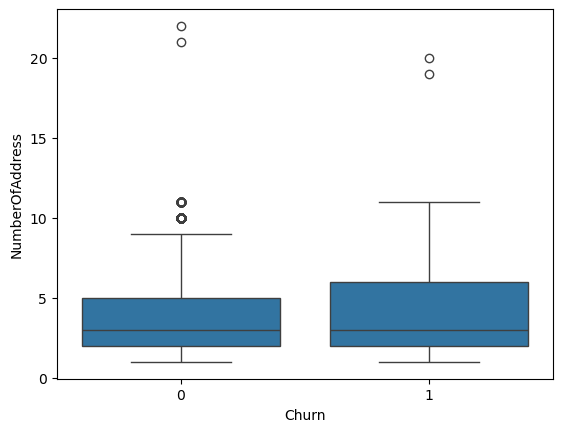

In [79]:
sns.boxplot(x='Churn', y='NumberOfAddress', data=df)

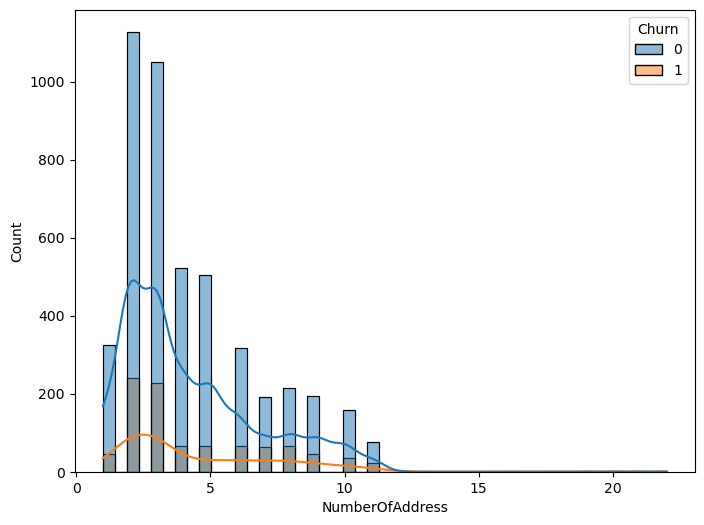

In [80]:
plt.figure(figsize=(8,6))
sns.histplot(data=df,x='NumberOfAddress',hue='Churn',kde=True)
plt.show();

##### **Insight**:  
1. **Mayoritas pengguna memiliki alamat yang sedikit**  
   - Sebagian besar pengguna memiliki jumlah alamat rendah (0-5).  
   - Jumlah pengguna berkurang seiring bertambahnya jumlah alamat.  

2. **Pelanggan churn lebih sedikit dibanding yang bertahan**  
   - Distribusi pelanggan yang churn (label 1) jauh lebih rendah dibanding yang tidak churn (label 0).  
   - Pelanggan dengan churn cenderung memiliki jumlah alamat yang lebih sedikit juga.  

##### **Recommendation**
1. **Segmentasi pelanggan berdasarkan jumlah alamat**  
   - Kelompokkan pelanggan ke dalam kategori berdasarkan jumlah alamat (misalnya: rendah (0-3), sedang (4-7), tinggi (>7)).  
   - Analisis lebih lanjut apakah pelanggan dengan lebih banyak alamat memang memiliki tingkat churn lebih tinggi.  

2. **Optimalkan customer engagement**  
   - Jika pelanggan dengan jumlah alamat tinggi memiliki kebutuhan khusus (misalnya, sering berpindah lokasi), sediakan layanan yang lebih fleksibel atau beradaptasi dengan mobilitas mereka.  

##### **Action Item**

1. **Personalisasi strategi retention**  
   - Jika pelanggan dengan jumlah alamat tinggi lebih rentan churn, akan dibuatkan strategi seperti diskon atau program loyalitas untuk mempertahankan mereka.  
   - Jika pelanggan dengan sedikit alamat lebih sering churn, mungkin ada faktor lain seperti kurangnya keterikatan dengan layanan.
   - Jika alamat customer memiliki lebih dari satu jenis seperti rumah, kantor, kontrakan, dan lainnya. perlu juga algoritma yang dapat memberikan rekomendasi sesuai dengan kebutuhan pelanggan di masing-masing tempat 

#### 2.9.18. __NumberOfDeviceRegistered Feature__

__NumberOfDeviceRegistered__

Fitur 'NumberOfDeviceRegistered' menunjukkan jumlah perangkat yang didaftarkan oleh pelanggan di aplikasi e-commerce. Berdasarkan analisis data, semakin banyak perangkat yang didaftarkan, semakin tinggi kecenderungan pelanggan untuk berhenti menggunakan platform ini (churn). Hal ini kemungkinan disebabkan oleh pelanggan yang hanya ingin memanfaatkan promosi awal yang biasanya ditawarkan oleh platform e-commerce kepada pelanggan baru.

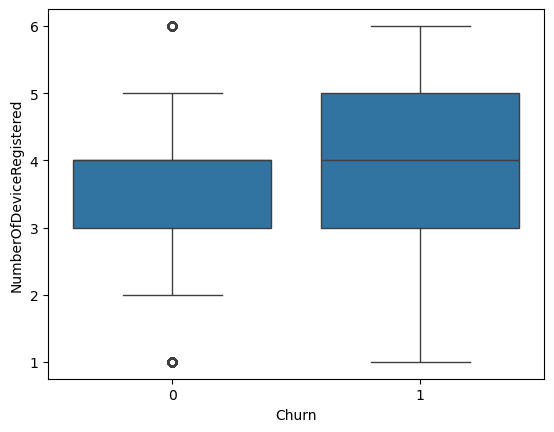

In [81]:
sns.boxplot(x='Churn', y='NumberOfDeviceRegistered', data=df);

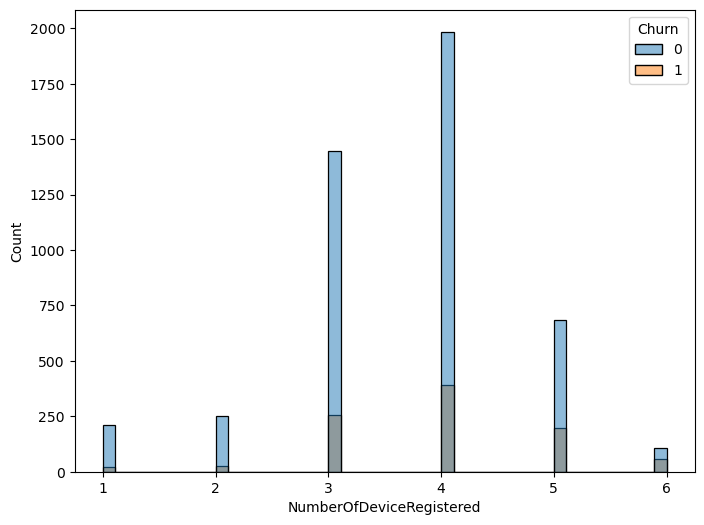

In [82]:
plt.figure(figsize=(8,6))
sns.histplot(data=df,x='NumberOfDeviceRegistered',hue='Churn')
plt.show();

##### **Insight**  
1. **Mayoritas pelanggan memiliki 3-5 perangkat terdaftar**  
   - Puncak distribusi terlihat pada 3 dan 4 perangkat terdaftar.  
   - Sangat sedikit pelanggan dengan 1, 2, atau lebih dari 5 perangkat.  

2. **Pelanggan dengan 3-5 perangkat lebih banyak mengalami churn**  
   - Walaupun jumlah pelanggan yang tidak churn lebih tinggi, proporsi churn juga meningkat pada kategori 3-5 perangkat.  
   - Semakin banyak perangkat yang terdaftar, semakin tinggi kemungkinan pelanggan mengalami churn.  

3. **Pelanggan dengan 1-2 perangkat jarang churn**  
   - Pelanggan yang hanya memiliki 1 atau 2 perangkat tampaknya lebih loyal dibandingkan yang memiliki lebih banyak perangkat.  

##### **Recommendation** 
1. **Analisis lebih lanjut pelanggan dengan banyak perangkat**  
   - Investigasi lebih dalam apakah ada kendala teknis, pengalaman buruk, atau faktor lain yang menyebabkan churn lebih tinggi pada pelanggan dengan banyak perangkat.  
   - Investigasi tindakan abusive

##### **Action Item**
1. **Survei Jumlah Perangkat**
   - Survei apakah ada kendala atau experience pelanggan yang menyebabkan harus login di banyak perangkat

2. **Deteksi abuse atau penyalahgunaan terhadap customer dengan banyak device**  
   - Terapkan imei atau mac adress untuk membatasi jumlah penyalahgunaan promo akun baru  
   - Meningkatkan program retensi dibandingkan dengan akusisi agar mengurangi penyalahgunaan akun baru

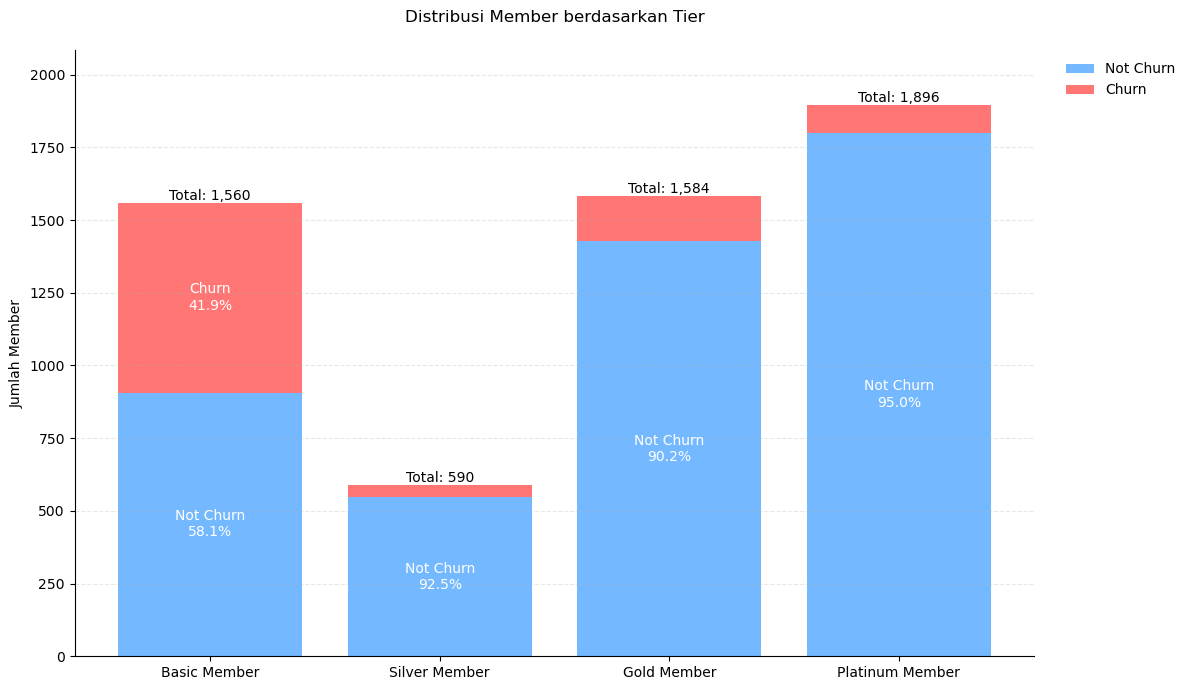

In [83]:
# Fungsi untuk menentukan tier berdasarkan tenure
def get_tier(tenure):
    if tenure <= 3:
        return 'Basic Member'
    elif tenure <= 6:
        return 'Silver Member'
    elif tenure <= 12:
        return 'Gold Member'
    else:
        return 'Platinum Member'

# Tambahkan kolom membership_tier
df['membership_tier'] = df['Tenure'].apply(get_tier)

# Urutkan tier sesuai tingkatan
tier_order = ['Basic Member', 'Silver Member', 'Gold Member', 'Platinum Member']

# Hitung distribusi member dan churn per tier
distribution = df.groupby('membership_tier').agg({
    'Churn': ['count', 'sum']
}).reindex(tier_order)

# Hitung jumlah churn dan tidak churn
distribution.columns = ['total', 'churned']
distribution['not_churned'] = distribution['total'] - distribution['churned']

# Hitung persentase
distribution['churn_rate'] = (distribution['churned'] / distribution['total'] * 100).round(1)
distribution['not_churn_rate'] = (distribution['not_churned'] / distribution['total'] * 100).round(1)

# Buat visualisasi
plt.figure(figsize=(12, 7))

# Plot stacked bar
not_churn_bars = plt.bar(range(len(tier_order)), distribution['not_churned'], 
                        color='#74b9ff', label='Not Churn')
churn_bars = plt.bar(range(len(tier_order)), distribution['churned'], 
                    bottom=distribution['not_churned'], color='#ff7675', label='Churn')

# Customize plot
plt.title('Distribusi Member berdasarkan Tier', pad=20, fontsize=12)
plt.ylabel('Jumlah Member')
plt.xticks(range(len(tier_order)), tier_order, rotation=0)

# Tambahkan grid
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Hapus border
for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

# Minimum height untuk menampilkan label (dalam persen dari total tinggi plot)
min_height_percent = 0.1

# Tambahkan label untuk setiap bar
for idx in range(len(tier_order)):
    total = distribution['total'].iloc[idx]
    not_churn_height = distribution['not_churned'].iloc[idx]
    churn_height = distribution['churned'].iloc[idx]
    not_churn_rate = distribution['not_churn_rate'].iloc[idx]
    churn_rate = distribution['churn_rate'].iloc[idx]
    
    # Total di atas bar
    plt.text(idx, total, f'Total: {total:,.0f}',
            ha='center', va='bottom', fontsize=10)
    
    # Tentukan tinggi minimum untuk label (10% dari maksimum total)
    min_height = max(distribution['total']) * min_height_percent
    
    # Label untuk not churn (hanya jika cukup tinggi)
    if not_churn_height > min_height:
        y_pos = not_churn_height/2
        plt.text(idx, y_pos,
                f'Not Churn\n{not_churn_rate:.1f}%',
                ha='center', va='center', color='white', fontsize=10)
    
    # Label untuk churn (hanya jika cukup tinggi)
    if churn_height > min_height:
        y_pos = not_churn_height + churn_height/2
        plt.text(idx, y_pos,
                f'Churn\n{churn_rate:.1f}%',
                ha='center', va='center', color='white', fontsize=10)

# Customize legend
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', 
            frameon=False, fontsize=10)

# Set y-axis limit
plt.ylim(0, max(distribution['total']) * 1.1)

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

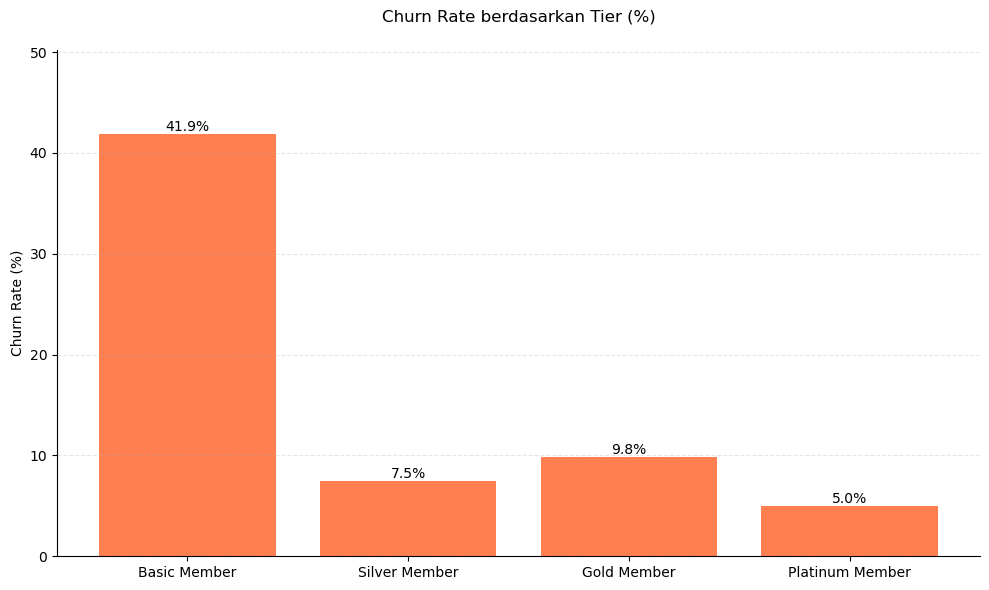

In [84]:
# Hitung churn rate per tier
churn_by_tier = df.groupby('membership_tier')['Churn'].mean() * 100

# Urutkan tier sesuai tingkatan
tier_order = ['Basic Member', 'Silver Member', 'Gold Member', 'Platinum Member']
churn_by_tier = churn_by_tier.reindex(tier_order)

# Buat visualisasi
plt.figure(figsize=(10, 6))

# Plot bar chart
bars = plt.bar(range(len(churn_by_tier)), churn_by_tier, color='#FF7F50')

# Customize plot
plt.title('Churn Rate berdasarkan Tier (%)', pad=20, fontsize=12)
plt.ylabel('Churn Rate (%)')
plt.xticks(range(len(churn_by_tier)), tier_order, rotation=0)

# Tambahkan grid
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Hapus border
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Set y-axis limit
plt.ylim(0, max(churn_by_tier) * 1.2)

# Tambahkan value labels di atas bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}%',
            ha='center', va='bottom')

# Tampilkan plot
plt.tight_layout()
plt.show()

##### __a. Insight: Distribusi Churn Rate berdasarkan Tier Membership__

##### **Insight Utama**

Dari grafik distribusi member dan churn rate berdasarkan tier, terlihat perbedaan signifikan dalam pola churn:
* Basic Member: Churn rate tertinggi (41.9%) dengan 1,560 total member
* Silver Member: Churn rate 7.5% dengan 590 total member
* Gold Member: Churn rate 9.8% dengan 1,584 total member
* Platinum Member: Churn rate terendah (5.0%) dengan 1,896 total member

Terdapat gap yang sangat besar antara churn rate di Basic Member dengan tier-tier lainnya, menunjukkan bahwa 3 bulan pertama adalah periode kritis dalam journey pelanggan TechStyle. Sementara itu, terdapat anomali kecil di Gold Member yang memiliki churn rate lebih tinggi dibandingkan Silver Member.

##### __b. Rekomendasi__

__Program Retensi Khusus Basic Member (Critical Period Program)__

Mengembangkan program retensi intensif khusus untuk Basic Member yang fokus pada 90 hari pertama sebagai masa kritis dalam menentukan loyalitas pelanggan jangka panjang. Program ini dirancang untuk mempercepat engagement dan value realization bagi pelanggan baru.

Tujuan dari program ini adalah menurunkan churn rate pada Basic Member dari 41.9% menjadi <25% dalam jangka waktu 6 bulan implementasi, sehingga meningkatkan conversion rate ke Silver Member.

##### __c. Action Items__

1. Implementasi Early Warning System (1-2 Bulan):
* Membangun sistem scoring yang mengidentifikasi tanda-tanda early churn pada Basic Member (minimal engagement, low order frequency, dll)
* Mengembangkan dashboard real-time untuk monitoring engagement Basic Member per hari
* Membuat automated alert system yang memicu intervensi pada hari ke-30, 60, dan 75

2. Enhanced Value Program untuk Basic Member (2-3 Bulan):
* Merancang program "Fast Track to Silver" yang memberikan benefit Silver tier lebih awal bagi Basic Member yang mencapai target transaksi tertentu
* Menerapkan "Double Cashback Weekend" khusus untuk Basic Member di bulan ke-2 membership
* Membuat program "Milestone Rewards" yang memberikan insentif pada order ke-1, ke-3, dan ke-5

3. Personalized Engagement Strategy (3-4 Bulan):
* Mengembangkan journey map berbasis segmentasi kebiasaan belanja Basic Member
* Membuat personalized recommendation engine berdasarkan first-purchase category
* Mendesain komunikasi bertahap via email, push notification, dan SMS dengan personalized offers

##### __d. Keuntungan bagi TechStyle__
- Meningkatkan konversi Basic Member ke Silver Member akan signifikan meningkatkan CLV (Customer Lifetime Value)
- Mengurangi churn rate Basic Member sebesar 16.9% (dari 41.9% menjadi 25%) akan menyelamatkan revenue tahunan sekitar $6,191,791.80
- Menurunkan CAC ratio dengan mempertahankan pelanggan sudah diakuisisi
- Meningkatkan basis pelanggan loyal yang melakukan repeat purchase

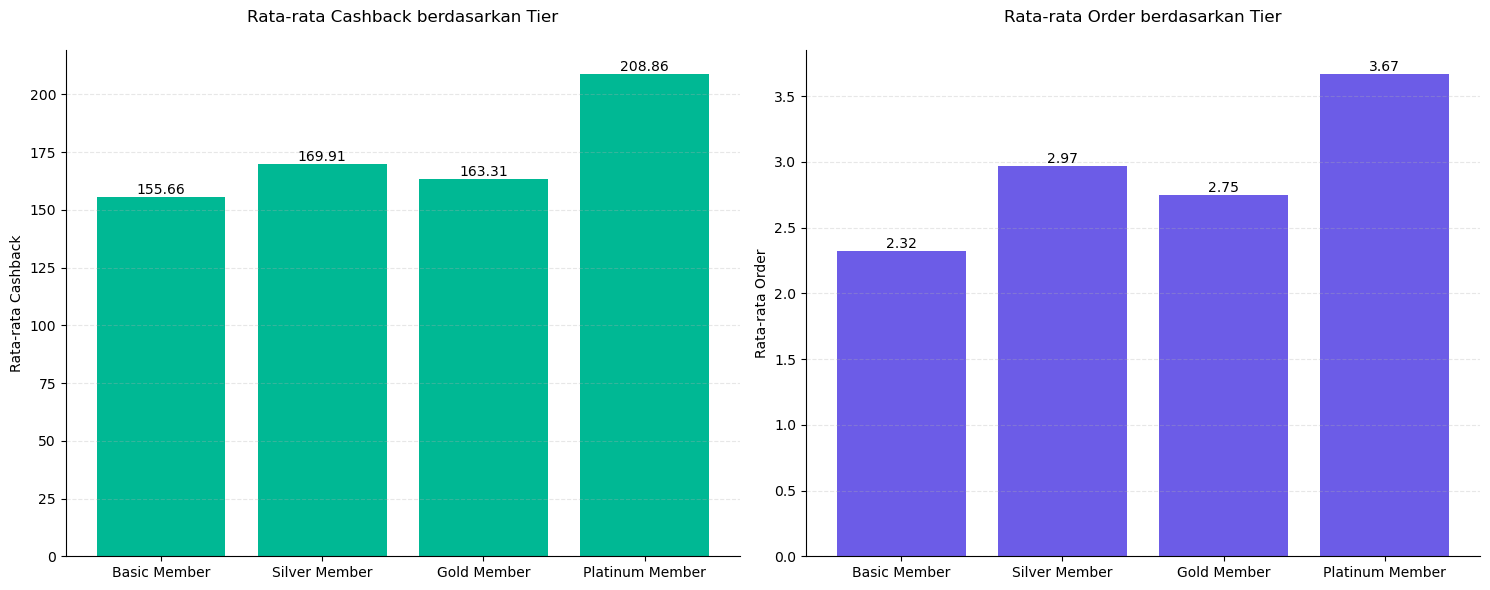


Detail Rata-rata per Tier:
                 CashbackAmount  OrderCount
membership_tier                            
Basic Member             155.66        2.32
Silver Member            169.91        2.97
Gold Member              163.31        2.75
Platinum Member          208.86        3.67


In [85]:
# Hitung rata-rata metrics per tier
avg_metrics = df.groupby('membership_tier').agg({
    'CashbackAmount': 'mean',
    'OrderCount': 'mean'
}).reindex(tier_order)

# Bulatkan nilai
avg_metrics = avg_metrics.round(2)

# Buat figure dengan 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot untuk Average Cashback
bars1 = ax1.bar(range(len(tier_order)), avg_metrics['CashbackAmount'], color='#00b894')
ax1.set_title('Rata-rata Cashback berdasarkan Tier', pad=20)
ax1.set_ylabel('Rata-rata Cashback')
ax1.set_xticks(range(len(tier_order)))
ax1.set_xticklabels(tier_order)
ax1.grid(axis='y', linestyle='--', alpha=0.3)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Tambahkan label nilai di atas bar untuk cashback
for i, bar in enumerate(bars1):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:,.2f}',
            ha='center', va='bottom')

# Plot untuk Average Order
bars2 = ax2.bar(range(len(tier_order)), avg_metrics['OrderCount'], color='#6c5ce7')
ax2.set_title('Rata-rata Order berdasarkan Tier', pad=20)
ax2.set_ylabel('Rata-rata Order')
ax2.set_xticks(range(len(tier_order)))
ax2.set_xticklabels(tier_order)
ax2.grid(axis='y', linestyle='--', alpha=0.3)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Tambahkan label nilai di atas bar untuk order
for i, bar in enumerate(bars2):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:,.2f}',
            ha='center', va='bottom')

# Adjust layout
plt.tight_layout()
plt.show()

# Print detail statistik
print("\nDetail Rata-rata per Tier:")
print(avg_metrics.to_string())

##### __a. Insight: Pola Cashback dan Order berdasarkan Tier__

##### **Insight Utama**

Grafik menunjukkan korelasi positif antara tier membership dengan pola belanja:
* Rata-rata Cashback meningkat dari tier terendah ke tertinggi ($155.66 → $208.86)
* Rata-rata Order per bulan juga meningkat seiring kenaikan tier (2.32 → 3.67)
* Platinum Member memiliki pola belanja paling aktif dengan 3.67 order per bulan dan cashback $208.86
* Terdapat sedikit penurunan cashback di Gold Member ($169.91 → $163.31) dibanding Silver Member

Data ini mengkonfirmasi bahwa semakin tinggi tier membership, semakin tinggi pula engagement dan nilai transaksi pelanggan, dengan anomali kecil di tier Gold.

##### __b. Rekomendasi__

__Strategi Cashback Progresif dan Retention Ladder__

Mengembangkan sistem cashback progresif yang memberikan insentif lebih tinggi untuk order frekuensi tinggi, serta program "Retention Ladder" yang menawarkan clear path and benefits untuk naik ke tier yang lebih tinggi.

Tujuan dari strategi ini adalah meningkatkan rata-rata order per bulan di setiap tier sebesar 15% dan mengurangi anomali churn rate di Gold Member dari 9.8% menjadi <7%.

##### __c. Action Items__

1. Restrukturisasi Program Cashback (2-3 Bulan):
* Mendesain struktur cashback progresif:
  * Basic: 3% cashback dasar, bonus 1% untuk order ke-3 dalam sebulan
  * Silver: 5% cashback dasar, bonus 2% untuk order ke-4 dalam sebulan
  * Gold: 7% cashback dasar, bonus 3% untuk order ke-5 dalam sebulan
  * Platinum: 10% cashback dasar, bonus 5% untuk order ke-6 dalam sebulan
* Implementasi sistem "Cashback Accelerator" yang memberikan multiplier pada kategori produk favorit pelanggan
* Pengembangan fitur visualisasi cashback accumulation di dashboard user

2. Gold Member Retention Program (2-3 Bulan):
* Menciptakan program "Gold Elite" dengan benefit eksklusif untuk Gold Member yang sudah >9 bulan
* Menerapkan dedicated account representative untuk Gold Member
* Mengembangkan "Platinum Preview" yang memberikan sneak peek benefit Platinum untuk Gold Member

3. Membership Journey Mapping (3-4 Bulan):
* Merancang customer journey map yang jelas untuk setiap transisi tier
* Mengembangkan milestone notification system yang memberitahu pelanggan progress menuju tier berikutnya
* Implementasi "Tier Achievement Celebration" yang memberikan reward spesial saat pelanggan naik tier

##### __d. Keuntungan bagi TechStyle__
- Meningkatkan rata-rata order per bulan akan langsung berdampak pada peningkatan revenue
- Menurunkan churn rate di Gold Member akan meningkatkan conversion rate ke Platinum Member, tier dengan nilai transaksi tertinggi
- Struktur cashback progresif akan mendorong perilaku belanja yang lebih menguntungkan perusahaan
- Memberikan clear value proposition untuk setiap tier meningkatkan motivasi pelanggan untuk bertahan dan naik ke tier yang lebih tinggi


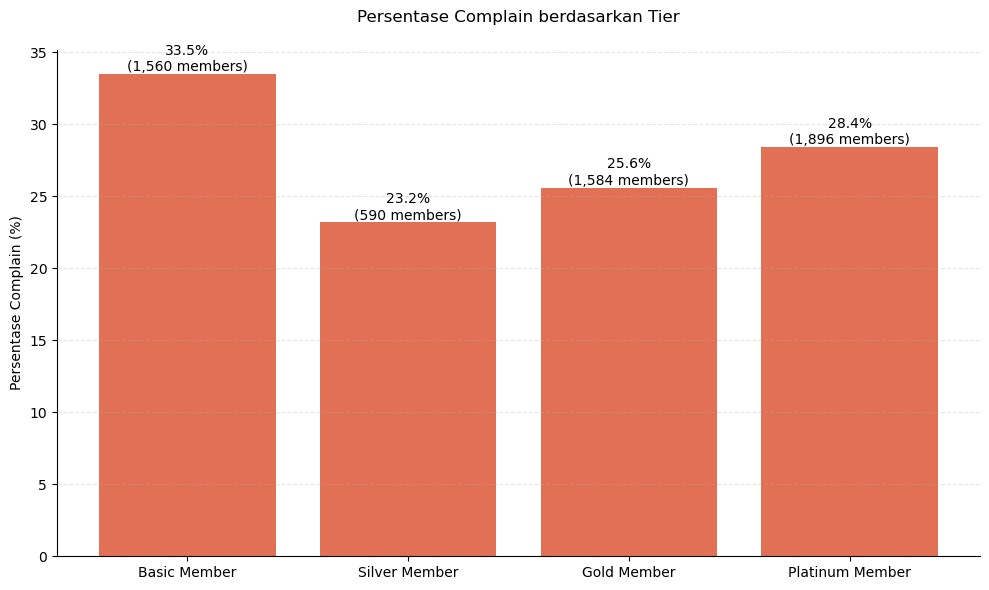


Detail Persentase Complain per Tier:
                 Complain  Tenure
membership_tier                  
Basic Member         33.5    1560
Silver Member        23.2     590
Gold Member          25.6    1584
Platinum Member      28.4    1896


In [86]:
# Hitung persentase complain dan total member per tier
metrics = df.groupby('membership_tier').agg({
    'Complain': lambda x: (x.sum() / len(x) * 100),  # Persentase complain
    'Tenure': 'count'  # untuk menghitung jumlah member
}).reindex(tier_order)

metrics = metrics.round(1)  # Bulatkan ke 1 desimal untuk persentase

# Buat visualisasi
plt.figure(figsize=(10, 6))

# Plot bars
bars = plt.bar(range(len(tier_order)), metrics['Complain'], color='#e17055')

# Customize plot
plt.title('Persentase Complain berdasarkan Tier', pad=20, fontsize=12)
plt.ylabel('Persentase Complain (%)')
plt.xticks(range(len(tier_order)), tier_order, rotation=0)

# Tambahkan grid
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Hapus border
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Tambahkan label nilai di atas bar
for idx, bar in enumerate(bars):
    height = bar.get_height()
    complaint_percent = metrics['Complain'].iloc[idx]
    member_count = metrics['Tenure'].iloc[idx]
    
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{complaint_percent:.1f}%\n({member_count:,} members)',
            ha='center', va='bottom')

# Adjust layout
plt.tight_layout()
plt.show()

# Print detail statistik
print("\nDetail Persentase Complain per Tier:")
print(metrics.to_string())

##### **Insight dari Persentase Complain berdasarkan Tier**
1. **Basic Member memiliki persentase complain tertinggi**
  - Basic Member menunjukkan persentase complain tertinggi (33.5%) dibandingkan tier lainnya.
  - Terdapat gap signifikan antara Basic Member dengan Silver Member (selisih 10.3%).
  - Tingginya persentase complain pada Basic Member selaras dengan tingginya churn rate di tier ini.

2. **Silver Member memiliki persentase complain terendah**
  - Silver Member menunjukkan persentase complain terendah (23.2%) di antara semua tier.
  - Ini menunjukkan kemungkinan adanya pengalaman positif pada periode transisi dari Basic ke Silver.

3. **Peningkatan persentase complain pada Gold dan Platinum**
  - Terjadi peningkatan complain dari Silver ke Gold (23.2% menjadi 25.6%).
  - Platinum Member juga menunjukkan persentase complain yang cukup tinggi (28.4%).
  - Fenomena ini menunjukkan kemungkinan adanya ekspektasi yang lebih tinggi pada tier atas.

4. **Jumlah member dan hubungannya dengan complain**
  - Meskipun Platinum Member memiliki jumlah terbanyak (1,896 members), persentase complainnya tetap tinggi.
  - Hal ini menunjukkan bahwa volume pelanggan tidak selalu berkorelasi dengan kepuasan pelanggan.

##### **Recommendation & Action**
1. **Program Peningkatan Kualitas untuk Basic Member**
  - Implementasikan program quality assurance khusus untuk Basic Member dengan fokus pada pain points utama yang sering dikeluhkan.
  - Bangun sistem onboarding yang lebih komprehensif untuk mengedukasi pelanggan baru tentang cara maksimalkan benefit dan fitur platform.
  - Lakukan pre-emptive support dengan menghubungi pelanggan baru setelah 7 hari berlangganan untuk menangkap potential issues sebelum berkembang menjadi complain formal.

2. **Benchmark Program Silver Member**
  - Analisis faktor-faktor yang membuat Silver Member memiliki persentase complain terendah.
  - Dokumentasikan best practices dari penanganan Silver Member dan terapkan ke tier lainnya.
  - Kembangkan case study internal untuk memahami apa yang berhasil pada tier ini.

3. **Program Expectation Management untuk Tier Atas**
  - Desain strategi komunikasi yang lebih jelas tentang benefit dan limitasi pada tier Gold dan Platinum untuk mengelola ekspektasi.
  - Buat dedicated support channel untuk Gold dan Platinum Member dengan SLA yang lebih ketat.
  - Kembangkan program "Platinum Experience Enhancement" untuk menangani complain high-tier member dengan pendekatan white-glove service.

4. **Sistem Predictive Complain Analysis**
  - Bangun model prediktif untuk mengidentifikasi potential complainers berdasarkan pola perilaku dan interaksi.
  - Implementasikan proactive intervention untuk member yang terdeteksi memiliki risiko tinggi untuk complain.
  - Kembangkan dashboard real-time untuk monitoring sentimen pelanggan di semua tier dengan alert system.

5. **Feedback Loop dari Resolusi Complain**
  - Buat program "You Spoke, We Listened" yang menunjukkan perubahan konkret berdasarkan complain pelanggan.
  - Implementasikan post-resolution survey untuk memastikan kepuasan terhadap penanganan complain.
  - Kembangkan knowledge base internal berdasarkan complain umum dan resolusinya untuk meningkatkan first-call resolution rate.

## 2.10. Correlation Analysis

Matriks Korelasi Spearman:
                                Churn    Tenure  CityTier  WarehouseToHome  \
Churn                        1.000000 -0.383026  0.085222         0.079899   
Tenure                      -0.383026  1.000000 -0.058138        -0.045585   
CityTier                     0.085222 -0.058138  1.000000         0.012704   
WarehouseToHome              0.079899 -0.045585  0.012704         1.000000   
HourSpendOnApp               0.016728 -0.008552 -0.013477         0.074788   
NumberOfDeviceRegistered     0.101244 -0.015429  0.020206         0.019996   
SatisfactionScore            0.104802 -0.020677 -0.007090         0.025209   
NumberOfAddress              0.028838  0.285789 -0.028985         0.018357   
Complain                     0.250188 -0.036529  0.002366         0.037884   
OrderAmountHikeFromlastYear -0.021645  0.020432 -0.031936         0.038824   
CouponUsed                  -0.008108  0.088467  0.021718         0.018523   
OrderCount                  -0.028837

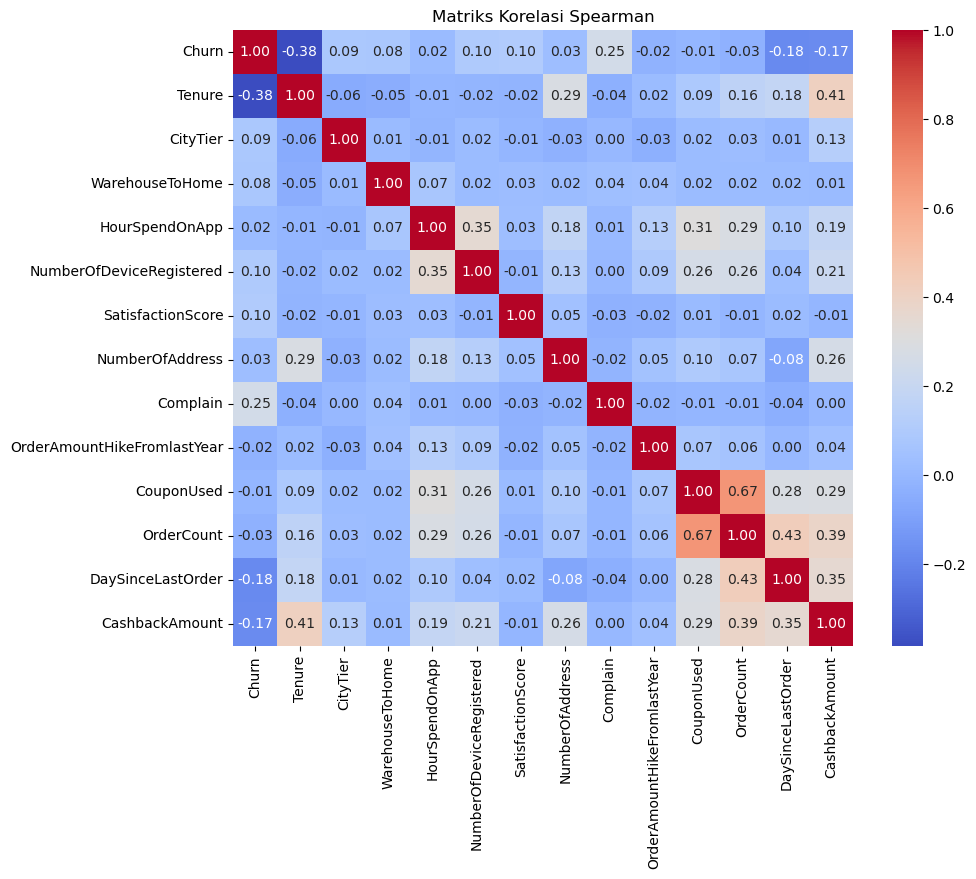

In [87]:
import pandas as pd
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df_numeric.corr(method='spearman')
print("Matriks Korelasi Spearman:")
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi Spearman')
plt.show()

##### **Insight dari Matriks Korelasi Spearman**
1. **Korelasi Tenure dengan Churn**
  - Terdapat korelasi negatif yang signifikan antara tenure dan churn (-0.38).
  - Semakin lama pelanggan berlangganan (tinggi tenure), semakin rendah kemungkinan mereka untuk churn.
  - Ini mengkonfirmasi fenomena "critical period" pada Basic Member yang memiliki tenure rendah.

2. **Korelasi Complain dengan Churn**
  - Complain memiliki korelasi positif dengan churn (0.25).
  - Pelanggan yang mengajukan komplain memiliki kecenderungan lebih tinggi untuk churn.
  - Ini menunjukkan pentingnya penanganan komplain yang efektif dalam strategi retensi.

3. **Korelasi DaySinceLastOrder dengan Churn**
  - Terdapat korelasi negatif antara DaySinceLastOrder dan churn (-0.18).
  - Pelanggan yang baru saja melakukan pemesanan cenderung tetap loyal.
  - Ini menekankan pentingnya mendorong transaksi rutin dan konsisten.

4. **Korelasi CashbackAmount dengan Churn**
  - CashbackAmount memiliki korelasi negatif dengan churn (-0.17).
  - Pelanggan yang mendapatkan cashback lebih tinggi cenderung memiliki loyalitas lebih baik.
  - Ini mendukung rekomendasi strategi cashback progresif yang telah diusulkan.

5. **Korelasi antara Perilaku Transaksi**
  - CouponUsed dan OrderCount memiliki korelasi positif yang kuat (0.67).
  - OrderCount berkorelasi dengan DaySinceLastOrder (0.43) dan CashbackAmount (0.39).
  - Ini menunjukkan cluster aktivitas pelanggan yang saling terkait.

##### **Recommendation & Action**
1. **Program Retensi berbasis Tenure**
  - Implementasikan early intervention untuk pelanggan dengan tenure rendah (0-3 bulan).
  - Ciptakan program "Loyalty Milestone" yang merayakan pencapaian tenure pelanggan pada bulan ke-3, 6, dan 12.
  - Buat visualisasi "Tenure Journey" pada dashboard pelanggan untuk meningkatkan awareness tentang benefit yang akan didapat dengan bertahan lebih lama.

2. **Sistem Manajemen Komplain Proaktif**
  - Bangun tim khusus untuk menangani komplain dengan protokol eskalasi yang jelas.
  - Implementasikan sistem follow-up otomatis untuk memastikan resolusi komplain yang memuaskan.
  - Kembangkan program "Service Recovery" yang menawarkan insentif khusus bagi pelanggan yang pernah mengalami masalah.

3. **Strategi Re-engagement**
  - Buat sistem alert untuk pelanggan yang tidak bertransaksi dalam periode waktu tertentu.
  - Desain kampanye "We Miss You" dengan penawaran khusus untuk mendorong transaksi baru.
  - Implementasikan program "Back to Shopping" dengan insentif progresif berdasarkan durasi inaktivitas.

4. **Optimasi Program Cashback**
  - Tingkatkan visibilitas cashback pada user interface platform.
  - Implementasikan reminder otomatis untuk cashback yang belum digunakan atau akan kedaluwarsa.
  - Kembangkan feature "Cashback Forecast" yang memproyeksikan potential cashback dari rencana belanja pelanggan.

5. **Integrasi Perilaku Transaksi dalam Model ML**
  - Buat feature engineering yang mengkombinasikan OrderCount, CouponUsed, dan CashbackAmount.
  - Kembangkan segmentasi pelanggan berdasarkan pola transaksi untuk personalisasi intervensi.
  - Implementasikan predictive engagement score yang mempertimbangkan recency, frequency, dan monetary value dari transaksi.

## __3. DATA PREPROCESSING__

Sebelumnya kita akan melakukan encoding untuk fitur-fitur yang bertipe kategorikal. berikut yang akan kita lakukan : 
1. Mengubah fitur `PreferredLoginDevice` menggunakan Label Encoding karena fitur ini hanya memiliki 2 Unique data.
2. Mengubah fitur `PreferredPaymentMode` menggunakan One Hot Encoding karena memiliki lebih dari 2 unique data dan datanya tidak memiliki urutan(Ordinal)
2. Mengubah fitur `Gender` menggunakan Label Encoding karena fitur ini hanya memiliki 2 unique data.
3. Mengubah fitur `PreferedOrderCat` menggunakan One Hot Encoding karena memiliki lebih dari 2 unique data dan datanya tidak memiliki urutan(Ordinal)
4. Mengubah fitur `MaritalStatus` menggunakan One Hot Encoding karena memiliki lebih dari 2 unique data dan datanya tidak memiliki urutan(Ordinal)

### __3.1 Label Encoding__
label Encoding kolom `PreferredLoginDevice` dan `Gender`

In [88]:
df['PreferredLoginDevice_encode'] = df['PreferredLoginDevice'].map({'Mobile Phone' : 0, 'Computer' :  1})
df['Gender_encode'] = df['Gender'].map({'Male' : 0, 'Female' :  1})

In [89]:
df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,membership_tier,PreferredLoginDevice_encode,Gender_encode
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93,Silver Member,0,1
1,1,9.0,Mobile Phone,1,8.0,UPI,Male,3.0,4,Mobile Phone,3,Single,7,1,15.0,0.0,1.0,0.0,120.90,Gold Member,0,0
2,1,9.0,Mobile Phone,1,30.0,Debit Card,Male,2.0,4,Mobile Phone,3,Single,6,1,14.0,0.0,1.0,3.0,120.28,Gold Member,0,0
3,1,0.0,Mobile Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07,Basic Member,0,0
4,1,0.0,Mobile Phone,1,12.0,Credit Card,Male,3.0,3,Mobile Phone,5,Single,3,0,11.0,1.0,1.0,3.0,129.60,Basic Member,0,0


### __3.2 One Hot Encoding__

One Hot Encoding kolom `PreferredPaymentMode`,`PreferedOrderCat`, `MaritalStatus`

In [90]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['PreferredPaymentMode','PreferedOrderCat', 'MaritalStatus']) # one hot encoding kolom PreferredPaymentMode, PreferedOrderCat, MaritalStatus
], remainder='passthrough') # Agar kolom lainnya tetap ada (kolom yang tidak di encode)

In [91]:
df_model = df.drop(columns=['PreferredLoginDevice','Gender','membership_tier'])

In [92]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   Tenure                       5630 non-null   float64
 2   CityTier                     5630 non-null   int64  
 3   WarehouseToHome              5630 non-null   float64
 4   PreferredPaymentMode         5630 non-null   object 
 5   HourSpendOnApp               5630 non-null   float64
 6   NumberOfDeviceRegistered     5630 non-null   int64  
 7   PreferedOrderCat             5630 non-null   object 
 8   SatisfactionScore            5630 non-null   int64  
 9   MaritalStatus                5630 non-null   object 
 10  NumberOfAddress              5630 non-null   int64  
 11  Complain                     5630 non-null   int64  
 12  OrderAmountHikeFromlastYear  5630 non-null   float64
 13  CouponUsed        

### __3.3 Data Splitting__

In [93]:
x = df_model.drop(columns=['Churn']) # ==> Features
y = df_model['Churn'] # ==> target

In [94]:
x_train,x_test,y_train,y_test = train_test_split(x,y,stratify=y,train_size=0.8, random_state=2021) # split data 

In [95]:
testing = pd.DataFrame(transformer.fit_transform(x_train),columns=transformer.get_feature_names_out()) # Model Mempelajari pola dari Data train
testing

,onehot__PreferredPaymentMode_Credit Card,onehot__PreferredPaymentMode_Debit Card,onehot__PreferredPaymentMode_E wallet,onehot__PreferredPaymentMode_UPI,onehot__PreferedOrderCat_Grocery,onehot__PreferedOrderCat_Laptop & Accessory,onehot__PreferedOrderCat_Mobile Phone,onehot__PreferedOrderCat_Others,onehot__MaritalStatus_Married,onehot__MaritalStatus_Single,remainder__Tenure,remainder__CityTier,remainder__WarehouseToHome,remainder__HourSpendOnApp,remainder__NumberOfDeviceRegistered,remainder__SatisfactionScore,remainder__NumberOfAddress,remainder__Complain,remainder__OrderAmountHikeFromlastYear,remainder__CouponUsed,remainder__OrderCount,remainder__DaySinceLastOrder,remainder__CashbackAmount,remainder__PreferredLoginDevice_encode,remainder__Gender_encode
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,8.0,1.0,13.0,3.0,5.0,4.0,8.0,0.0,16.0,2.0,2.0,1.0,170.05,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,13.0,1.0,8.0,2.0,3.0,3.0,1.0,0.0,15.0,0.0,3.0,9.0,294.36,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,1.0,9.0,3.0,3.0,5.0,2.0,1.0,13.0,2.0,2.0,3.0,130.65,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,9.0,1.0,31.0,3.0,3.0,4.0,2.0,1.0,19.0,6.0,7.0,8.0,120.22,1.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,1.0,8.0,3.0,4.0,1.0,1.0,0.0,13.0,0.0,1.0,2.0,127.20,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4499,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,18.0,3.0,7.0,4.0,4.0,3.0,9.0,0.0,13.0,2.0,2.0,1.0,172.68,1.0,1.0
4500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,18.0,1.0,6.0,3.0,3.0,4.0,2.0,0.0,12.0,6.0,7.0,7.0,174.41,0.0,0.0
4501,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,23.0,1.0,29.0,4.0,4.0,4.0,5.0,0.0,17.0,1.0,2.0,3.0,289.13,0.0,1.0
4502,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,9.0,3.0,13.0,2.0,1.0,5.0,3.0,0.0,16.0,5.0,6.0,13.0,146.39,1.0,1.0


## __4. MODELING &  EVALUATION__

### __4.1 Penjelasan cara kerja model yang akan dipakai__
##### 1. __Logistic Regression__
###### - __Defenisi Logistic Regression__
Regresi logistik adalah teknik analisis data yang menggunakan matematika untuk menemukan hubungan antara dua faktor data. Kemudian menggunakan hubungan ini untuk memprediksi nilai dari salah satu faktor tersebut berdasarkan faktor yang lain. Prediksi biasanya memiliki jumlah hasil yang terbatas, seperti ya atau tidak.[(amazon.com)](https://aws.amazon.com/id/what-is/logistic-regression/)
###### - __Cara Kerja Logistic Regression__
Regresi logistik adalah model statistik yang menggunakan fungsi logistik, atau fungsi logit, dalam matematika sebagai persamaan antara x dan y. Fungsi logit memetakan y sebagai fungsi sigmoid dari x. Seperti yang Anda lihat, fungsi logit mengembalikan hanya nilai-nilai antara 0 dan 1 untuk variabel dependen, terlepas dari nilai-nilai variabel independen. Ini adalah cara regresi logistik memperkirakan nilai variabel dependen. Metode regresi logistik juga memodelkan persamaan antara beberapa variabel independen dan satu variabel dependen. 

Logistic regression bekerja dengan model matematis yang mirip dengan regresi linear​. Hasil dari persamaan linear kemudian dimasukkan ke fungsi sigmoid untuk mendapatkan probabilitas antara 0 dan 1. Setelah mendapatkan probabilitas, keputusan diambil dengan threshold (batasan), biasanya 0.5. Jika output > 0.5 → model memprediksi kelas positif (1), Jika output ≤ 0.5 → model memprediksi kelas negatif (0) [(amazon.com)](https://aws.amazon.com/id/what-is/logistic-regression/)


##### 2. __KNeighborsClassifier__
###### - __Defenisi KNeighborsClassifier__
Dikenal juga dengan singkatan KNN, K-nearest neighbor merupakan algoritma yang digunakan untuk mengidentifikasi adanya persamaan antara data baru dan lama. Kemudian, algoritma satu ini akan memasukkan data baru tersebut dalam kategori yang paling mirip dengan kategori yang telah ada sebelumnya. Dengan kata lain, K-nearest neighbor menyimpan seluruh data lama dan mengklasifikasikan data point baru berdasarkan kemiripan.[(algorit.ma)](https://blog.algorit.ma/k-nearest-neighbor)

###### - __Cara Kerja KNeighborsClassifier__
Berikut ini adalah cara kerja KNeighborsClassifier:
- Pilih nomor K neighbor atau terdekat.
- Hitung jarak Euclidean dari jumlah K terdekat.
- Ambil K terdekat ini sesuai dengan jarak Euclidean yang dihitung.
- Di antara K terdekat ini, hitunglah jumlah titik data dalam setiap kategori.
- Tetapkan titik data baru ke dalam kategori yang jumlah tetangganya maksimum.
- Model yang Anda buat sudah siap. [(algorit.ma)](https://blog.algorit.ma/k-nearest-neighbor/)

##### 3. __DecisionTreeClassifier__
###### - __Defenisi DecisionTreeClassifier__
Decision tree merupakan struktur pohon yang terdiri dari node-node yang merepresentasikan keputusan dan cabang-cabang yang merepresentasikan konse
kuensi dari keputusan tersebut. Setiap node dalam decision tree merepresentasikan variabel dalam dataset yang mempengaruhi keputusan dan konsekuensi tersebut.[(dqlab.id)](https://dqlab.id/apa-itu-decision-tree-di-machine-learning-model)

###### - __Cara Kerja DecisionTreeClassifier__
Cara Kerja DecisionTreeClassifier dapat dibagi menjadi beberapa tahap:
- Pertama pengumpulan dan persiapan data. Pada tahap ini, data yang diperlukan untuk membuat model decision tree dikumpulkan dan dipersiapkan. Data yang diperlukan terdiri dari variabel target atau dependen yang akan diprediksi, dan variabel prediktor atau independen yang digunakan sebagai acuan dalam membuat keputusan. Data yang diberikan dapat berupa data numerik atau kategorikal.
- Selanjutnya, Pembentukan decision tree. pada tahap ini, decision tree dibentuk dari data yang telah dikumpulkan. Proses ini dilakukan dengan menggunakan algoritma decision tree seperti ID3, C4.5, CART, atau CHAID. Algoritma-algoritma tersebut akan memilih variabel prediktor yang paling informatif untuk dijadikan pemisah pada setiap cabang dari decision tree.
- Setelah decision tree terbentuk, dilakukan pruning atau pemangkasan pada cabang-cabang yang tidak signifikan atau tidak memberikan kontribusi pada prediksi. Proses pruning bertujuan untuk menghindari overfitting atau kelebihan fitting pada model decision tree.
- Setelah decision tree terbentuk dan dipangkas, model decision tree dievaluasi dengan menggunakan data yang belum dipakai selama pembuatan decision tree (data validasi atau testing)[(dqlab.id)](https://dqlab.id/apa-itu-decision-tree-di-machine-learning-model)

##### 4. __RandomForestClassifier__
###### - __Defenisi RandomForestClassifier__
Random Forest adalah algoritma dalam machine learning yang digunakan untuk pengklasifikasian data set dalam jumlah besar. Karena fungsinya bisa digunakan untuk banyak dimensi dengan berbagai skala dan performa yang tinggi. Salah satu algoritma terbaik dalam machine learning ini menggunakan decision tree atau pohon keputusan untuk melangsungkan proses seleksi, di mana tree atau pohon decision tree akan dibagi secara rekursif berdasarkan data pada kelas yang sama. Dalam hal ini, penggunaan tree yang semakin banyak akan memengaruhi akurasi yang didapat menjadi lebih optimal. Penentuan klasifikasi dengan Random Forest dilakukan berdasarkan hasil voting dan tree yang terbentuk. [(algorit.ma)](https://algorit.ma/blog/cara-kerja-algoritma-random-forest-2022/)

###### - __Cara Kerja RandomForestClassifier__
Random Forest bekerja dengan membangun beberapa decision tree dan menggabungkannya demi mendapatkan prediksi yang lebih stabil dan akurat. ‘Hutan’ yang dibangun oleh Random Forest adalah kumpulan decision tree di mana biasanya dilatih dengan metode bagging. Ide umum dari metode bagging adalah kombinasi model pembelajaran untuk meningkatkan hasil keseluruhan

Algoritma Random Forest meningkatkan keacakan pada model sambil menumbuhkan tree. Alih-alih mencari fitur yang paling penting saat memisahkan sebuah node, Random Forest mencari fitur terbaik di antara subset fitur yang acak. Alhasil, cara ini menghasilkan keragaman yang luas dan umumnya menghasilkan model yang lebih baik.[(algorit.ma)](https://algorit.ma/blog/cara-kerja-algoritma-random-forest-2022/)

##### 5. __XGBClassifier__
###### - __Defenisi XGBClassifier__
XGBoost (Extreme Gradient Boosting) adalah sebuah algoritma machine learning yang sangat populer dan efektif dalam analisis data, khususnya dalam tugas-tugas seperti klasifikasi dan regresi. XGBoost menggunakan teknik ensemble learning, yang menggabungkan prediksi dari beberapa model untuk meningkatkan kinerja keseluruhan. Pendekatan ini berbasis pada teknik boosting, di mana model-model lemah (weak learners), biasanya berupa pohon keputusan (decision trees) yang sederhana, digabungkan menjadi model yang kuat (strong learner). [(dqlab.id)](https://dqlab.id/tools-data-science-dengan-algoritma-xgboost)

###### - __Cara Kerja XGBClassifier__
XGBoost bekerja dengan cara menggabungkan beberapa model machine learning yang lemah menjadi satu model yang kuat. Proses ini dilakukan dengan cara mengurangi error dari setiap model yang dibangun, dengan cara menambahkan model baru yang dapat meminimalkan error yang ada. Proses ini dilakukan secara iteratif, sehingga setiap kali iterasi, performa model semakin meningkat.

XGBoost sendiri menggunakan teknik gradient boosting, dimana setiap model machine learning yang dibangun akan diambil residual error dari model sebelumnya sebagai target variable. Dengan cara ini, setiap model yang dibangun akan fokus pada mengurangi error yang ada pada model sebelumnya.

Selain itu, XGBoost juga menggunakan teknik regularisasi untuk mencegah overfitting, yaitu suatu kondisi dimana model terlalu fokus pada data training sehingga performanya menurun pada data testing. Teknik regularisasi yang digunakan oleh XGBoost adalah L1 dan L2 regularization, dimana setiap feature akan diberikan bobot yang berbeda tergantung dari signifikansinya terhadap target variable.[(medium.com)](https://dindaadi.medium.com/algoritme-xgboost-dengan-contohnya-28e958a3e2f6)

##### 6. __LGBMClassifier__
###### - __Defenisi LGBMClassifier__
Algoritma LIGHTGBM singkatan dari Light Gradient Boosting Machine, adalah sebuah algoritma machine learning yang menggunakan teknik gradient boosting untuk melakukan prediksi. Algoritma ini dikembangkan oleh Microsoft dan menjadi salah satu algoritma yang populer dalam dunia data science. algoritma ini memiliki keunggulan dalam kecepatan dan efisiensi yang tinggi, serta mampu mengatasi masalah yang berkaitan dengan data yang besar dan fitur yang banyak. [(kantinit.com)](https://kantinit.com/kecerdasan-buatan/apa-itu-algoritma-lightgbm-cara-kerja-dan-contoh-penerapan/)

###### - __Cara Kerja LGBMClassifier__
Secara umum, Light Gradient Boosting Machine bekerja dengan menggabungkan beberapa pohon keputusan yang relatif sederhana menjadi sebuah model yang kuat. Algoritma ini menggunakan pendekatan berbasis histogram untuk membagi data secara cerdas dan meningkatkan kinerja pemodelan.

Berikut adalah langkah-langkah utama dalam algoritma Light Gradient Boosting Machine:

- Pembagian Data Menjadi Binning
Algoritma LightGBM memulai dengan membagi setiap fitur numerik menjadi beberapa bin diskrit. Binning ini membantu dalam mengurangi kompleksitas perhitungan dan mempercepat proses pembelajaran. LightGBM menggunakan pendekatan binning berbasis histogram, yang mengumpulkan data dalam interval yang saling tumpang tindih.

- Pembuatan Histogram
Setelah data dibagi menjadi bin, LightGBM membangun histogram untuk setiap fitur. Histogram ini merepresentasikan distribusi data dalam setiap bin. Pada tahap ini, LightGBM juga melakukan pengelompokan data berdasarkan fitur kategorikal jika ada.

- Pemilihan Fitur Terbaik untuk Splitting
LightGBM menggunakan histogram yang telah dibangun untuk memilih fitur yang paling informatif untuk dilakukan splitting. Algoritma ini menggunakan metode yang disebut Gradient-based One-Side Sampling (GOSS) untuk mempercepat proses pemilihan fitur. GOSS memilih sebagian data yang memiliki gradient besar dan data acak yang memiliki gradient kecil.

- Pembentukan Pohon Keputusan
LightGBM membangun banyak pohon keputusan secara paralel. Setiap pohon dibangun dengan menggunakan pendekatan penambahan leaf ke leaf (leaf-wise). Pendekatan ini berbeda dengan pendekatan level-wise yang digunakan dalam algoritma Gradient Boosting tradisional. Pendekatan leaf-wise memungkinkan LightGBM untuk menggabungkan banyak leaf yang dapat memperluas ruang solusi dan meningkatkan kemampuan generalisasi.


- Pemangkasan Pohon
Setelah setiap pohon selesai dibangun, LightGBM melakukan pemangkasan pada pohon untuk mencegah overfitting dan meningkatkan generalisasi pada data baru. Algoritma ini menggunakan pendekatan yang disebut Gradient-based One-Side Sampling (GOSS) untuk memotong cabang-cabang yang tidak memberikan peningkatan signifikan dalam loss function.

- Penggabungan Pohon
Akhirnya, LightGBM menggabungkan hasil dari semua pohon yang telah dibangun. Pada tahap ini, setiap prediksi pohon diberi bobot berdasarkan performa pohon tersebut. LightGBM menggunakan pendekatan yang disebut Gradient-based One-Side Sampling (GOSS) untuk menghitung bobot prediksi dari setiap pohon.[(kantinit.com)](https://kantinit.com/kecerdasan-buatan/apa-itu-algoritma-lightgbm-cara-kerja-dan-contoh-penerapan/)

In [96]:
## Model Yang dipakai
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
lgbm = lgb.LGBMClassifier()

### __4.2 Model Benchmarking : K-Fold__

In [97]:
## Model Benchmarking : K-Fold

models = [logreg,knn,dt,rf,xgb,lgbm] # list model yang akan digunakan untuk benchmarking
score=[] # menyimpan hasil cross validation
mean=[] # menyimpan nilai rata-rata recall untuk tiap model
std=[] # menyimpan standard deviasi untuk tiap model 

for i in models: # loop untuk melakukan cross-val
    skfold=StratifiedKFold(n_splits=5) # membagi data menjadi 5 fold dengan stratifikasi. distribusi kelas dalam setiap fold tetap proporsional.
    estimator=Pipeline([ # pipeline digunakan agar preprocessing dalam model dapat berjalan dalam suatu proses
        ('preprocess',transformer), 
        ('model',i)]) 
    model_cv=cross_val_score(estimator,x_train,y_train,cv=skfold,scoring='recall') #  Melakukan 5-Fold Cross Validation
    score.append(model_cv) # menyimpan hasil scoring
    mean.append(model_cv.mean()) # menyimpan mean score
    std.append(model_cv.std()) # menyimpan standar deviasi score
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'],'mean recall':mean,'sdev':std}).set_index('model').sort_values(by='mean recall',ascending=False) # membua dataframe untuk hasil score benchmarking

[LightGBM] [Info] Number of positive: 607, number of negative: 2996
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000261 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 453
[LightGBM] [Info] Number of data points in the train set: 3603, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.168471 -> initscore=-1.596505
[LightGBM] [Info] Start training from score -1.596505
[LightGBM] [Info] Number of positive: 606, number of negative: 2997
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000353 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 454
[LightGBM] [Info] Number of data points in the train set: 3603, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.168193 -> initscore=-1.598487
[LightGBM] [

,mean recall,sdev
model,,
XGBoost,0.860134,0.032177
LightGBM,0.832476,0.033335
Decision Tree,0.828529,0.029860
Random Forest,0.782285,0.031710
Logistic Regression,0.505211,0.027273
KNN,0.386424,0.042004


### __4.3 Model Benchmarking : Test Data__

In [98]:
## menggunakan data test untuk melihat performas model dengan data test
models = [logreg, knn, dt, rf, xgb, lgbm] ## model yang akan di benchmarking/evaluasi
score_recall = [] # list untuk menyimpan score recall dari tiap model 


# Melatih model dan memprediksi
def y_pred_func(i):
    estimator = Pipeline([
        ('preprocess', transformer),
        ('model', i)
    ])
    
    estimator.fit(x_train, y_train) # melatih model dengan data training
    y_pred = estimator.predict(x_test) # prediksi label dengan data test
    y_pred_proba = estimator.predict_proba(x_test)[:, 1]  # probabilitas kelas positif
    return estimator, y_pred, y_pred_proba 


# Evaluasi model dalam loop
for model, name in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM']):
    estimator, y_pred, y_pred_proba = y_pred_func(model)
    
    # Konversi probabilitas ke label biner (threshold = 0.5)
    y_pred_binary = (y_pred_proba >= 0.5).astype(int) # kelas 1 (positif), jika tidak maka 0 (negatif). Ini disebut thresholding (batas probabilitas 0.5). 
    score_recall.append(recall_score(y_test, y_pred_binary)) # Hitung recall score dengan y_pred_binary
    print(f"{name}\n", classification_report(y_test, y_pred_binary)) # menampilkan Classification report untuk semua model yang di uji

# Buat dataframe hasil
pd.DataFrame({'model': ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'],
              'recall score': score_recall}).set_index('model').sort_values(by='recall score', ascending=False)


Logistic Regression
               precision    recall  f1-score   support

           0       0.91      0.96      0.94       936
           1       0.76      0.54      0.63       190

    accuracy                           0.89      1126
   macro avg       0.83      0.75      0.78      1126
weighted avg       0.88      0.89      0.88      1126

KNN
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       936
           1       0.70      0.46      0.55       190

    accuracy                           0.87      1126
   macro avg       0.80      0.71      0.74      1126
weighted avg       0.86      0.87      0.86      1126

Decision Tree
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       936
           1       0.88      0.88      0.88       190

    accuracy                           0.96      1126
   macro avg       0.93      0.93      0.93      1126
weighted avg       0.96      0.96

,recall score
model,
XGBoost,0.905263
Decision Tree,0.884211
Random Forest,0.863158
LightGBM,0.852632
Logistic Regression,0.536842
KNN,0.457895


### __4.4 Menentukan Model Untuk Hyperparameter Tuning__
Setelah mendapatkan Score benchmarking dari ke-6 Model yang dipakai, diputuskan untuk mengambil 3 model dengan skor tertinggi untuk dilakukan hyperparameter tuning. dipilih 3 teratas untuk tuning karena model yang memiliki skor benchmarking tertinggi belum tentu memiliki performa yang terbaik setelah dilakukan hyperparameter tuning. Sebelum tuning, dilakukan dulu tes oversampling pada ketiga model untuk mengecek apakah model akan lebih baik jika dilakukan oversampling atau tidak. ketiga model yang akan dipakai adalah __XGBoost__, __Decision Tree__, dan __LightGBM__

#### __Oversampling__
Imbalance data adalah kasus di mana kelas dataset klasifikasi memiliki proporsi yang tidak seimbang. berdasarkan dataset ini kelas churn memiliki proporsi 16.8% , dimana imbalance data tergolong kedalam kasus Mild (1-20% dari jumlah dataset)[(berdata.com)](https://www.berdata.com/post/5-teknik-smote-untuk-oversampling-data-yang-imbalance). Kelas imbalance menghasilkan bias di mana model machine learning cenderung memprediksi kelas mayoritas. maka dari itu dilakukan teknik oversampling untuk mengatasi masalah Imbalance.

## __5. HYPER PARAMETER TUNING XGBOOST, DECISION TREE & LGBM__

### __5.1 Model XGBOOST__

#### __5.1.1 Test Oversampling with K-Fold Cross Validation__

In [99]:
## Menghitung performa model pada data training. 
def calc_train_error(X_train, y_train, model):
#     '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train) # Prediksi label untuk training data
    predictProba = model.predict_proba(X_train) # probabilitas prediksi kelas positif
    accuracy = accuracy_score(y_train, predictions) # akurasi model 
    f1 = f1_score(y_train, predictions, average='macro') # f1 Score (macro)
    roc_auc = roc_auc_score(y_train, predictProba[:,1]) # ROC AUC untuk kelas 1
    recall = recall_score(y_train, predictions) # Recall score
    precision = precision_score(y_train, predictions) # Precision score
    report = classification_report(y_train, predictions) # Classification report
    return { 
        'report': report, 
        'f1' : f1, 
        'roc': roc_auc, 
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }

## Menghitung performa model pada data testing. Tujuan ==>  melihat apakah model bisa generalize ke data baru atau justru mengalami overfitting
def calc_validation_error(X_test, y_test, model):
#     '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test) # Prediksi label untuk testing data
    predictProba = model.predict_proba(X_test) # probabilitas prediksi kelas positif
    accuracy = accuracy_score(y_test, predictions) # akurasi model
    f1 = f1_score(y_test, predictions, average='macro') # F1 score (macro)
    roc_auc = roc_auc_score(y_test, predictProba[:,1]) # ROC AUC untuk kelas 1
    recall = recall_score(y_test, predictions) # recall score
    precision = precision_score(y_test, predictions) # precision 
    report = classification_report(y_test, predictions) # classification report
    return { 
        'report': report, 
        'f1' : f1, 
        'roc': roc_auc, 
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }

## Melatih model dan mengembalikan hasil evaluasi pada train & test
def calc_metrics(X_train, y_train, X_test, y_test, model):
#     '''fits model and returns the in-sample error and out-of-sample error'''
    model.fit(X_train, y_train) # melatih model dengan data train 
    train_error = calc_train_error(X_train, y_train, model) # Mengukur performa pada data train
    validation_error = calc_validation_error(X_test, y_test, model) # Mengukur performa pada data test
    return train_error, validation_error

In [100]:
## Kode ini digunakan untuk membandingkan performa model dengan dan tanpa oversampling menggunakan K-Fold Cross-Validation.

# Konsep Utama :
# - Menggunakan Stratified K-Fold (K=10) ==> Membagi dataset menjadi 10 bagian (fold), memastikan distribusi kelas tetap seimbang di setiap fold.
# - Oversampling menggunakan RandomOverSampler() ==> Menyeimbangkan jumlah sampel di setiap kelas dalam data pelatihan untuk mengatasi ketidakseimbangan kelas.
# - Model yang digunakan adalah XGBClassifier() ==> Model ini diterapkan dalam Pipeline yang mencakup preprocessing (transformer) dan model.
# - Menggunakan Fungsi calc_metrics() ==> Menghitung metrik evaluasi (accuracy, recall, precision, F1-score, ROC-AUC, dll.) untuk train dan validation set.

K = 10 # dataset dibagi menjadi 10 fold
kf = StratifiedKFold(n_splits=K, shuffle=True, random_state=42) 
# StratifiedKFold digunakan untuk menjaga proporsi kelas di setiap fold.
# shuffle=True ==> Data akan diacak sebelum dibagi.
# random_state=42 ==> Agar pembagian tetap konsisten setiap kali kode dijalankan.


data = x_train
target = y_train

# list untuk menyimpan hasil evaluasi tanpa oversampling
train_errors_without_oversampling = []
validation_errors_without_oversampling = []

# list untuk menyimpan hasil evaluasi dengan oversampling
train_errors_with_oversampling = []
validation_errors_with_oversampling = []



for train_index, val_index in kf.split(data, target): # looping K fold cross validation
    
    # Membagi data menjadi train dan validation berdasarkan indeks yang diberikan oleh StratifiedKFold
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    Y_train, Y_val = target.iloc[train_index], target.iloc[val_index]
    
#     print(len(X_val), (len(X_train) + len(X_val)))
    ros = RandomOverSampler() # oversampling dengan random oversampler

    X_ros, Y_ros = ros.fit_resample(X_train, Y_train) # dilakukan oversample pada data pelatihan. (X_ros, Y_ros) akan digunakan untuk membandingkan performa model.
        
    # instantiate model
    xgb = XGBClassifier() # Menggunakan model dengan score terbaik dari hasil benchmarking
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',xgb)
    ])

    #Evaluasi model
    train_error_without_oversampling, val_error_without_oversampling = calc_metrics(X_train, Y_train, X_val, Y_val, estimator) ## Tanpa Oversampling
    train_error_with_oversampling, val_error_with_oversampling = calc_metrics(X_ros, Y_ros, X_val, Y_val, estimator) ## Dengan Oversampling
    
    # Menyimpan Hasil Evaluasi
    train_errors_without_oversampling.append(train_error_without_oversampling) # Train Error tanpa oversampling
    validation_errors_without_oversampling.append(val_error_without_oversampling) # Validation Error tanpa oversampling 
    
    train_errors_with_oversampling.append(train_error_with_oversampling) # Train Error dengan oversampling
    validation_errors_with_oversampling.append(val_error_with_oversampling) # Validation Error tanpa oversampling

#### __5.1.2 Evaluation Metrics Without Oversampling__

In [101]:
listItem = [] # list untuk menyimpanmetrik evaluasi dari setiap fold

# looping untuk mengumpulkan metrik evaluasi
for tr,val in zip(train_errors_without_oversampling,validation_errors_without_oversampling) :
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],
                     tr['recall'],val['recall'],tr['precision'],val['precision']])

listItem.append(list(np.mean(listItem,axis=0))) # Menghitung rata-rata untuk setiap metrik dari seluruh fold. Hasilnya ditambahkan sebagai baris terakhir dalam listItem.

# Membuat DataFrame dari listItem
dfEvaluate = pd.DataFrame(listItem, 
                    columns=['Train Accuracy', 
                            'Test Accuracy', 
                            'Train ROC AUC', 
                            'Test ROC AUC', 
                            'Train F1 Score',
                            'Test F1 Score',
                            'Train Recall',
                            'Test Recall',
                            'Train Precision',
                            'Test Precision'])

# Mengubah Indeks Baris Terakhir Menjadi average
listIndex = list(dfEvaluate.index)
listIndex[-1] = 'Average'
dfEvaluate.index = listIndex
dfEvaluate

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,1.0,0.966741,1.0,0.968561,1.0,0.936953,1.0,0.828947,1.0,0.969231
1,1.0,0.975610,1.0,0.984807,1.0,0.956709,1.0,0.934211,1.0,0.922078
2,1.0,0.973392,1.0,0.980526,1.0,0.950418,1.0,0.868421,1.0,0.970588
3,1.0,0.971175,1.0,0.964947,1.0,0.946586,1.0,0.868421,1.0,0.956522
4,1.0,0.977778,1.0,0.985884,1.0,0.959567,1.0,0.920000,1.0,0.945205
5,1.0,0.973333,1.0,0.972516,1.0,0.949831,1.0,0.866667,1.0,0.970149
6,1.0,0.966667,1.0,0.982761,1.0,0.939019,1.0,0.868421,1.0,0.929577
7,1.0,0.962222,1.0,0.981072,1.0,0.933066,1.0,0.894737,1.0,0.883117
8,1.0,0.988889,1.0,0.990571,1.0,0.979893,1.0,0.947368,1.0,0.986301
9,1.0,0.966667,1.0,0.966789,1.0,0.939019,1.0,0.868421,1.0,0.929577


#### __5.1.3 Evaluation Metrics With Oversampling__

In [102]:
listItem = [] # # list untuk menyimpan metrik evaluasi dari setiap fold

# looping untuk mengumpulkan metrik evaluasi
for tr,val in zip(train_errors_with_oversampling,validation_errors_with_oversampling) :
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],
                     tr['recall'],val['recall'],tr['precision'],val['precision']])

# Menghitung rata-rata untuk setiap metrik dari seluruh fold. Hasilnya ditambahkan sebagai baris terakhir dalam listItem.
listItem.append(list(np.mean(listItem,axis=0)))

# Membuat DataFrame dari listItem
dfEvaluate = pd.DataFrame(listItem, 
                    columns=['Train Accuracy', 
                            'Test Accuracy', 
                            'Train ROC AUC', 
                            'Test ROC AUC', 
                            'Train F1 Score',
                            'Test F1 Score',
                            'Train Recall',
                            'Test Recall',
                            'Train Precision',
                            'Test Precision'])

# Mengubah Indeks Baris Terakhir Menjadi average
listIndex = list(dfEvaluate.index)
listIndex[-1] = 'Average'
dfEvaluate.index = listIndex
dfEvaluate

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,1.0,0.971175,1.0,0.975123,1.0,0.946586,1.0,0.868421,1.0,0.956522
1,1.0,0.977827,1.0,0.985754,1.0,0.961246,1.0,0.960526,1.0,0.912500
2,1.0,0.971175,1.0,0.984246,1.0,0.947173,1.0,0.881579,1.0,0.943662
3,1.0,0.971175,1.0,0.969930,1.0,0.947744,1.0,0.894737,1.0,0.931507
4,1.0,0.977778,1.0,0.975360,1.0,0.959567,1.0,0.920000,1.0,0.945205
5,1.0,0.957778,1.0,0.971556,1.0,0.922758,1.0,0.853333,1.0,0.888889
6,1.0,0.964444,1.0,0.987194,1.0,0.936673,1.0,0.894737,1.0,0.894737
7,1.0,0.953333,1.0,0.981741,1.0,0.918989,1.0,0.894737,1.0,0.839506
8,1.0,0.977778,1.0,0.986666,1.0,0.960830,1.0,0.947368,1.0,0.923077
9,1.0,0.964444,1.0,0.981459,1.0,0.935308,1.0,0.868421,1.0,0.916667


Dari test oversampling yang dilakukan pada model __XGB__. dapat kita lihat bahwa model tanpa oversampling mendapat score __recall__ untuk data train yaitu __1.0__ dan score __recall__ untuk data test yaitu __0.886__ . Sedangkan model dengan oversampling mendapat score __recall__ untuk data train yaitu __1.0__ dan score __recall__ untuk data test yaitu __0.898__. Model dengan oversampling lebih baik meskipun perbedaannya tidak signifikan yaitu hanya mengalami kenaikan sebesar 1% untuk score recall pada data test. sehingga diputuskan untuk melakukan oversampling pada hyperparameter tuning. 

#### __5.1.4 Classification Reports Without Oversampling__

In [103]:
# Loop untuk menampilkan classification report model tanpa oversampling
for rep in validation_errors_without_oversampling :
    print(rep['report'])

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       375
           1       0.97      0.83      0.89        76

    accuracy                           0.97       451
   macro avg       0.97      0.91      0.94       451
weighted avg       0.97      0.97      0.97       451

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       375
           1       0.92      0.93      0.93        76

    accuracy                           0.98       451
   macro avg       0.95      0.96      0.96       451
weighted avg       0.98      0.98      0.98       451

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       375
           1       0.97      0.87      0.92        76

    accuracy                           0.97       451
   macro avg       0.97      0.93      0.95       451
weighted avg       0.97      0.97      0.97       451

              preci

#### __5.1.5 Classification Reports With Oversampling__

In [104]:
# Loop untuk menampilkan classification report model dengan oversampling
for rep in validation_errors_with_oversampling :
    print(rep['report'])

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       375
           1       0.96      0.87      0.91        76

    accuracy                           0.97       451
   macro avg       0.97      0.93      0.95       451
weighted avg       0.97      0.97      0.97       451

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       375
           1       0.91      0.96      0.94        76

    accuracy                           0.98       451
   macro avg       0.95      0.97      0.96       451
weighted avg       0.98      0.98      0.98       451

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       375
           1       0.94      0.88      0.91        76

    accuracy                           0.97       451
   macro avg       0.96      0.94      0.95       451
weighted avg       0.97      0.97      0.97       451

              preci

#### __5.1.6 Hyperparameter Tuning XGBoost__

##### References :

- https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning
- https://xgboost.readthedocs.io/en/stable/parameter.html

In [105]:
xgb = XGBClassifier() # model yang digunakan 
ros = RandomOverSampler(random_state=42) # Oversampling dengan RandomOverSampler

estimator=Pipeline([
    ('oversampling',ros),
    ('preprocess',transformer),
    ('model',xgb)
])

hyperparam_space = {
    'model__n_estimators': [100, 300],  # Jumlah pohon, default : 100 
    'model__learning_rate': [0.3, 0.1],  # Ukuran langkah, default : 0.3
    'model__max_depth': [6, 5],  # Kedalaman pohon, default : 6 
    'model__subsample': [1.0, 0.8],  # Persentase sampel untuk setiap iterasi, default : 1.0
    'model__min_child_weight': [1, 3], #Bobot untuk membuat split baru, default : 1
    'model__colsample_bytree': [1.0, 0.8],  # Proporsi fitur yang digunakan, default : 1.0
    'model__reg_lambda': [1, 0, 10],  # Regularisasi L2, default : 1
    'model__reg_alpha': [0, 1, 10],  # Regularisasi L1, default : 0
    'model__gamma': [0, 0.1] # pruning awal pada split, default : 0
}


grid = GridSearchCV(estimator, # Hyperparameter tuning dengan GridSearchCV
                    n_jobs=-1, 
                    param_grid=hyperparam_space, 
                    scoring='recall', 
                    cv=StratifiedKFold(n_splits=10, 
                    shuffle=True, 
                    random_state=42))

In [106]:
grid.fit(x_train,y_train) #Menjalankan GridSearchCV dengan melakukan training dan cross-validation
print(grid.best_score_)
print(grid.best_params_)

0.9063333333333332
{'model__colsample_bytree': 1.0, 'model__gamma': 0, 'model__learning_rate': 0.3, 'model__max_depth': 6, 'model__min_child_weight': 1, 'model__n_estimators': 300, 'model__reg_alpha': 0, 'model__reg_lambda': 1, 'model__subsample': 1.0}


In [107]:
best_model_XGB = grid.best_estimator_ # mengambil model terbaik yang ditemukan oleh GridSearchCV
best_model_XGB.fit(x_train, y_train) # Model terbaik yang diperoleh dari GridSearchCV kemudian dilatih ulang menggunakan seluruh data training 

Pipeline(steps=[('oversampling', RandomOverSampler(random_state=42)),
                ('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['PreferredPaymentMode',
                                                   'PreferedOrderCat',
                                                   'MaritalStatus'])])),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=Non...
                               feature_types=None, gamma=0, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.3,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None, min_child_weight=1,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=300,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=None, ...))])

In [108]:
estimator=Pipeline([
    ('oversampling',ros),
    ('preprocess',transformer),
    ('model',xgb)
])
estimator.fit(x_train, y_train)

Pipeline(steps=[('oversampling', RandomOverSampler(random_state=42)),
                ('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['PreferredPaymentMode',
                                                   'PreferedOrderCat',
                                                   'MaritalStatus'])])),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=Non...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [109]:
y_pred_default_XGB = estimator.predict(x_test)
y_pred_proba_default_XGB = estimator.predict_proba(x_test)
y_pred_tuned_XGB = best_model_XGB.predict(x_test)
y_pred_proba_tuned_XGB = best_model_XGB.predict_proba(x_test)

recall_default_XGB = recall_score(y_test, y_pred_default_XGB)
recall_tuned_XGB = recall_score(y_test, y_pred_tuned_XGB)

print('Recall Score Default XGB : ', recall_default_XGB)
print('Recall Score Tuned XGB : ', recall_tuned_XGB)

Recall Score Default XGB :  0.9473684210526315
Recall Score Tuned XGB :  0.9421052631578948


setelah dilakukan tuning pada model __XGBoost__ dapat kita lihat perbedaan score recallnya. score recall sebelum tuning yaitu __0.94736__ dan setelah tuning yaitu __0.94210__. Terjadi Penurunan score recall sebesar 0.5% menunjukkan bahwa performa model setelah dilakukan tuning tidak lebih baik dibanding model sebelum tuning

In [110]:
report_default_XGB = classification_report(y_test, y_pred_default_XGB)
report_tuned_XGB = classification_report(y_test, y_pred_tuned_XGB)

print('Classification Report Default XGB : \n', report_default_XGB)
print('Classification Report Tuned XGB : \n', report_tuned_XGB)

Classification Report Default XGB : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       936
           1       0.94      0.95      0.94       190

    accuracy                           0.98      1126
   macro avg       0.96      0.97      0.97      1126
weighted avg       0.98      0.98      0.98      1126

Classification Report Tuned XGB : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       936
           1       0.94      0.94      0.94       190

    accuracy                           0.98      1126
   macro avg       0.96      0.96      0.96      1126
weighted avg       0.98      0.98      0.98      1126



- Recall untuk Kelas 1 (Positif). Setelah tuning, terjadi penurunan dari 95% ke 94%. artinya model sedikit lebih banyak mengklasifikasikan sampel negatif sebagai positif (False Positive) dibandingkan model default.
- Recall untuk Kelas 0 (Negatif). setelah tuning, tidak terjadi peningkatan atau penurunan pada recall kelas 0 (Negatif). artinya baik sebelum atau setelah tuning model memiliki akurasi yang sama yaitu sebesar 99% untuk memprediksi kelas 0(Tidak churn)

#### __5.1.7 Confusion Matrix XGB__

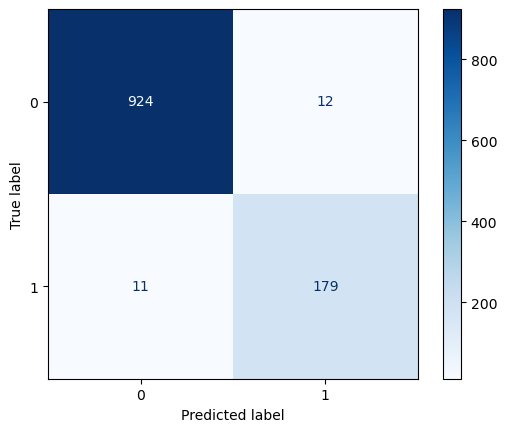

In [111]:
# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred_tuned_XGB)

# Tampilkan Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')  # Bisa pakai cmap lain seperti 'viridis', 'Reds', dll.

# Tampilkan plot
plt.show()

### __5.2 Model Decision Tree__

#### __5.2.1 Test Oversampling with K-Fold Cross Validation__

In [112]:
## Menghitung performa model pada data training. 
def calc_train_error(X_train, y_train, model):
#     '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train) # Prediksi label untuk training data
    predictProba = model.predict_proba(X_train) # probabilitas prediksi kelas positif
    accuracy = accuracy_score(y_train, predictions) # akurasi model 
    f1 = f1_score(y_train, predictions, average='macro') # f1 Score (macro)
    roc_auc = roc_auc_score(y_train, predictProba[:,1]) # ROC AUC untuk kelas 1
    recall = recall_score(y_train, predictions) # Recall score
    precision = precision_score(y_train, predictions) # Precision score
    report = classification_report(y_train, predictions) # Classification report
    return { 
        'report': report, 
        'f1' : f1, 
        'roc': roc_auc, 
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }

## Menghitung performa model pada data testing. Tujuan ==>  melihat apakah model bisa generalize ke data baru atau justru mengalami overfitting
def calc_validation_error(X_test, y_test, model):
#     '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test) # Prediksi label untuk testing data
    predictProba = model.predict_proba(X_test) # probabilitas prediksi kelas positif
    accuracy = accuracy_score(y_test, predictions) # akurasi model
    f1 = f1_score(y_test, predictions, average='macro') # F1 score (macro)
    roc_auc = roc_auc_score(y_test, predictProba[:,1]) # ROC AUC untuk kelas 1
    recall = recall_score(y_test, predictions) # recall score
    precision = precision_score(y_test, predictions) # precision 
    report = classification_report(y_test, predictions) # classification report
    return { 
        'report': report, 
        'f1' : f1, 
        'roc': roc_auc, 
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }

## Melatih model dan mengembalikan hasil evaluasi pada train & test
def calc_metrics(X_train, y_train, X_test, y_test, model):
#     '''fits model and returns the in-sample error and out-of-sample error'''
    model.fit(X_train, y_train) # melatih model dengan data train 
    train_error = calc_train_error(X_train, y_train, model) # Mengukur performa pada data train
    validation_error = calc_validation_error(X_test, y_test, model) # Mengukur performa pada data test
    return train_error, validation_error

In [113]:
## Kode ini digunakan untuk membandingkan performa model dengan dan tanpa oversampling menggunakan K-Fold Cross-Validation.

# Konsep Utama :
# - Menggunakan Stratified K-Fold (K=10) ==> Membagi dataset menjadi 10 bagian (fold), memastikan distribusi kelas tetap seimbang di setiap fold.
# - Oversampling menggunakan RandomOverSampler() ==> Menyeimbangkan jumlah sampel di setiap kelas dalam data pelatihan untuk mengatasi ketidakseimbangan kelas.
# - Model yang digunakan adalah XGBClassifier() ==> Model ini diterapkan dalam Pipeline yang mencakup preprocessing (transformer) dan model.
# - Menggunakan Fungsi calc_metrics() ==> Menghitung metrik evaluasi (accuracy, recall, precision, F1-score, ROC-AUC, dll.) untuk train dan validation set.

K = 10 # dataset dibagi menjadi 10 fold
kf = StratifiedKFold(n_splits=K, shuffle=True, random_state=42) 
# StratifiedKFold digunakan untuk menjaga proporsi kelas di setiap fold.
# shuffle=True ==> Data akan diacak sebelum dibagi.
# random_state=42 ==> Agar pembagian tetap konsisten setiap kali kode dijalankan.


data = x_train
target = y_train

# list untuk menyimpan hasil evaluasi tanpa oversampling
train_errors_without_oversampling = []
validation_errors_without_oversampling = []

# list untuk menyimpan hasil evaluasi dengan oversampling
train_errors_with_oversampling = []
validation_errors_with_oversampling = []



for train_index, val_index in kf.split(data, target): # looping K fold cross validation
    
    # Membagi data menjadi train dan validation berdasarkan indeks yang diberikan oleh StratifiedKFold
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    Y_train, Y_val = target.iloc[train_index], target.iloc[val_index]
    
#     print(len(X_val), (len(X_train) + len(X_val)))
    ros = RandomOverSampler() # oversampling dengan random oversampler

    X_ros, Y_ros = ros.fit_resample(X_train, Y_train) # dilakukan oversample pada data pelatihan. (X_ros, Y_ros) akan digunakan untuk membandingkan performa model.
        
    # instantiate model
    dt = DecisionTreeClassifier() # Menggunakan model dengan score terbaik dari hasil benchmarking
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',dt)
    ])

    #Evaluasi model
    train_error_without_oversampling, val_error_without_oversampling = calc_metrics(X_train, Y_train, X_val, Y_val, estimator) ## Tanpa Oversampling
    train_error_with_oversampling, val_error_with_oversampling = calc_metrics(X_ros, Y_ros, X_val, Y_val, estimator) ## Dengan Oversampling
    
    # Menyimpan Hasil Evaluasi
    train_errors_without_oversampling.append(train_error_without_oversampling) # Train Error tanpa oversampling
    validation_errors_without_oversampling.append(val_error_without_oversampling) # Validation Error tanpa oversampling 
    
    train_errors_with_oversampling.append(train_error_with_oversampling) # Train Error dengan oversampling
    validation_errors_with_oversampling.append(val_error_with_oversampling) # Validation Error tanpa oversampling

#### __5.2.2 Evaluation Metrics Without Oversampling__

In [114]:
listItem = [] # list untuk menyimpanmetrik evaluasi dari setiap fold

# looping untuk mengumpulkan metrik evaluasi
for tr,val in zip(train_errors_without_oversampling,validation_errors_without_oversampling) :
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],
                     tr['recall'],val['recall'],tr['precision'],val['precision']])

listItem.append(list(np.mean(listItem,axis=0))) # Menghitung rata-rata untuk setiap metrik dari seluruh fold. Hasilnya ditambahkan sebagai baris terakhir dalam listItem.

# Membuat DataFrame dari listItem
dfEvaluate = pd.DataFrame(listItem, 
                    columns=['Train Accuracy', 
                            'Test Accuracy', 
                            'Train ROC AUC', 
                            'Test ROC AUC', 
                            'Train F1 Score',
                            'Test F1 Score',
                            'Train Recall',
                            'Test Recall',
                            'Train Precision',
                            'Test Precision'])

# Mengubah Indeks Baris Terakhir Menjadi average
listIndex = list(dfEvaluate.index)
listIndex[-1] = 'Average'
dfEvaluate.index = listIndex
dfEvaluate

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,1.0,0.935698,1.0,0.898386,1.0,0.888180,1.0,0.842105,1.0,0.790123
1,1.0,0.955654,1.0,0.936614,1.0,0.923268,1.0,0.907895,1.0,0.841463
2,1.0,0.971175,1.0,0.930211,1.0,0.946586,1.0,0.868421,1.0,0.956522
3,1.0,0.944568,1.0,0.903719,1.0,0.901612,1.0,0.842105,1.0,0.831169
4,1.0,0.955556,1.0,0.925333,1.0,0.920842,1.0,0.880000,1.0,0.857143
5,1.0,0.928889,1.0,0.882667,1.0,0.874656,1.0,0.813333,1.0,0.772152
6,1.0,0.944444,1.0,0.893189,1.0,0.899463,1.0,0.815789,1.0,0.849315
7,1.0,0.933333,1.0,0.907473,1.0,0.887082,1.0,0.868421,1.0,0.767442
8,1.0,0.960000,1.0,0.933999,1.0,0.929494,1.0,0.894737,1.0,0.871795
9,1.0,0.948889,1.0,0.895863,1.0,0.906496,1.0,0.815789,1.0,0.873239


#### __5.2.3 Evaluation Metrics With Oversampling__

In [115]:
listItem = [] # # list untuk menyimpan metrik evaluasi dari setiap fold

# looping untuk mengumpulkan metrik evaluasi
for tr,val in zip(train_errors_with_oversampling,validation_errors_with_oversampling) :
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],
                     tr['recall'],val['recall'],tr['precision'],val['precision']])

# Menghitung rata-rata untuk setiap metrik dari seluruh fold. Hasilnya ditambahkan sebagai baris terakhir dalam listItem.
listItem.append(list(np.mean(listItem,axis=0)))

# Membuat DataFrame dari listItem
dfEvaluate = pd.DataFrame(listItem, 
                    columns=['Train Accuracy', 
                            'Test Accuracy', 
                            'Train ROC AUC', 
                            'Test ROC AUC', 
                            'Train F1 Score',
                            'Test F1 Score',
                            'Train Recall',
                            'Test Recall',
                            'Train Precision',
                            'Test Precision'])

# Mengubah Indeks Baris Terakhir Menjadi average
listIndex = list(dfEvaluate.index)
listIndex[-1] = 'Average'
dfEvaluate.index = listIndex
dfEvaluate

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,1.0,0.949002,1.0,0.906386,1.0,0.908528,1.0,0.842105,1.0,0.853333
1,1.0,0.964523,1.0,0.947193,1.0,0.937994,1.0,0.921053,1.0,0.875000
2,1.0,0.955654,1.0,0.894649,1.0,0.916420,1.0,0.802632,1.0,0.924242
3,1.0,0.946785,1.0,0.899807,1.0,0.904043,1.0,0.828947,1.0,0.851351
4,1.0,0.942222,1.0,0.901333,1.0,0.897094,1.0,0.840000,1.0,0.818182
5,1.0,0.944444,1.0,0.881333,1.0,0.896075,1.0,0.786667,1.0,0.867647
6,1.0,0.946667,1.0,0.910252,1.0,0.905992,1.0,0.855263,1.0,0.833333
7,1.0,0.940000,1.0,0.900999,1.0,0.894782,1.0,0.842105,1.0,0.810127
8,1.0,0.962222,1.0,0.945820,1.0,0.934420,1.0,0.921053,1.0,0.864198
9,1.0,0.957778,1.0,0.937905,1.0,0.926704,1.0,0.907895,1.0,0.851852


Dari test oversampling yang dilakukan pada model __DecisionTree__. dapat kita lihat bahwa model tanpa oversampling mendapat score __recall__ untuk data train yaitu __1.0__ dan score __recall__ untuk data test yaitu __0.854__ . Sedangkan model dengan oversampling mendapat score __recall__ untuk data train yaitu __1.0__ dan score __recall__ untuk data test yaitu __0.854__. Model dengan oversampling memiliki score recall yang sama dengan model tanpa oversampling. Meskipun skor yang diperoleh setelah melakukan oversampling sama, diputuskan untuk melakukan oversampling pada hyperparameter tuning seperti pada model sebelumnya. 

#### __5.2.4 Classification Reports Without Oversampling__

In [116]:
# Loop untuk menampilkan classification report model tanpa oversampling
for rep in validation_errors_without_oversampling :
    print(rep['report'])

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       375
           1       0.79      0.84      0.82        76

    accuracy                           0.94       451
   macro avg       0.88      0.90      0.89       451
weighted avg       0.94      0.94      0.94       451

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       375
           1       0.84      0.91      0.87        76

    accuracy                           0.96       451
   macro avg       0.91      0.94      0.92       451
weighted avg       0.96      0.96      0.96       451

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       375
           1       0.96      0.87      0.91        76

    accuracy                           0.97       451
   macro avg       0.97      0.93      0.95       451
weighted avg       0.97      0.97      0.97       451

              preci

#### __5.2.5 Classification Reports With Oversampling__

In [117]:
# Loop untuk menampilkan classification report model dengan oversampling
for rep in validation_errors_with_oversampling :
    print(rep['report'])

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       375
           1       0.85      0.84      0.85        76

    accuracy                           0.95       451
   macro avg       0.91      0.91      0.91       451
weighted avg       0.95      0.95      0.95       451

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       375
           1       0.88      0.92      0.90        76

    accuracy                           0.96       451
   macro avg       0.93      0.95      0.94       451
weighted avg       0.97      0.96      0.96       451

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       375
           1       0.92      0.80      0.86        76

    accuracy                           0.96       451
   macro avg       0.94      0.89      0.92       451
weighted avg       0.95      0.96      0.95       451

              preci

#### __5.2.6 Hyperparameter Tuning Decsion Tree__

Referensi : 

- https://ken-hoffman.medium.com/decision-tree-hyperparameters-explained-49158ee1268e
- https://insidelearningmachines.com/tune_hyperparameters_in_decision_trees/#What_Methods_are_Used_to_Tune_Hyperparameters
- https://www.geeksforgeeks.org/how-to-tune-a-decision-tree-in-hyperparameter-tuning/#hyperparameters-in-decision-trees

In [118]:
dt = DecisionTreeClassifier()
ros = RandomOverSampler(random_state=42)

estimator=Pipeline([
    ('oversampling',ros),
    ('preprocess',transformer),
    ('model',dt)
])


hyperparam_space = {
    'model__max_depth': [None, 5, 10, 15], # kedalaman maksimum pohon, default : None
    'model__min_samples_split': [2, 5, 10], # minimum sampel untuk membagi node, default : 2
    'model__min_samples_leaf': [1, 2, 5], # minimum sampel dalam setiap leaf (daun), default : 1
    'model__criterion': ['gini', 'entropy'], # Fungsi untuk mengevaluasi kualitas split, default : gini
    'model__class_weight': [None, 'balanced'] # Menyesuaikan bobot kelas untuk menangani ketidakseimbangan data, default : None
}


grid = GridSearchCV(estimator, 
                    n_jobs=-1, 
                    param_grid={}, 
                    scoring='recall', 
                    cv=StratifiedKFold(n_splits=10, 
                    shuffle=True, 
                    random_state=42))

In [119]:
grid.fit(x_train,y_train)
print(grid.best_score_)
print(grid.best_params_)

0.8297543859649122
{}


In [120]:
best_model_DT = grid.best_estimator_
best_model_DT.fit(x_train, y_train)

Pipeline(steps=[('oversampling', RandomOverSampler(random_state=42)),
                ('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['PreferredPaymentMode',
                                                   'PreferedOrderCat',
                                                   'MaritalStatus'])])),
                ('model', DecisionTreeClassifier())])

In [121]:
estimator=Pipeline([
    ('oversampling',ros),
    ('preprocess',transformer),
    ('model',dt)
])
estimator.fit(x_train, y_train)

Pipeline(steps=[('oversampling', RandomOverSampler(random_state=42)),
                ('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['PreferredPaymentMode',
                                                   'PreferedOrderCat',
                                                   'MaritalStatus'])])),
                ('model', DecisionTreeClassifier())])

In [122]:
y_pred_default_DT = estimator.predict(x_test)
y_pred_proba_default_DT = estimator.predict_proba(x_test)
y_pred_tuned_DT = best_model_DT.predict(x_test)
y_pred_proba_tuned_DT = best_model_DT.predict_proba(x_test)

recall_default_DT = recall_score(y_test, y_pred_default_DT)
recall_tuned_DT = recall_score(y_test, y_pred_tuned_DT)

print('Recall Score Default DT : ', recall_default_DT)
print('Recall Score Tuned DT : ', recall_tuned_DT)

Recall Score Default DT :  0.8631578947368421
Recall Score Tuned DT :  0.8578947368421053


setelah dilakukan tuning pada model Decision Tree dapat kita lihat perbedaan score recallnya. score recall sebelum tuning yaitu __0.863__ dan setelah tuning yaitu __0.857__. Terjadi penurunan score recall sebesar 1% menunjukkan bahwa performa model setelah dilakukan tuning menjadi tidak lebih baik.

In [123]:
report_default_DT = classification_report(y_test, y_pred_default_DT)
report_tuned_DT = classification_report(y_test, y_pred_tuned_DT)

print('Classification Report Default DT : \n', report_default_DT)
print('Classification Report Tuned DT : \n', report_tuned_DT)

Classification Report Default DT : 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       936
           1       0.87      0.86      0.87       190

    accuracy                           0.96      1126
   macro avg       0.92      0.92      0.92      1126
weighted avg       0.96      0.96      0.96      1126

Classification Report Tuned DT : 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       936
           1       0.87      0.86      0.86       190

    accuracy                           0.95      1126
   macro avg       0.92      0.92      0.92      1126
weighted avg       0.95      0.95      0.95      1126



- Recall untuk Kelas 1 (Positif).  Setelah tuning, skore tetap sama tidak terjadi peningkatan ataupun penurunan. artinya model sebelum dan sesudah tuning memiliki kemampuan yang sama untuk memprediksi kelas 1(churn)
- Recall untuk Kelas 0 (Negatif). Setelah tuning, skore tetap sama tidak terjadi peningkatan ataupun penurunan. artinya model sebelum dan sesudah tuning memiliki kemampuan yang sama untuk memprediksi kelas 0(Tidak churn)

#### __5.2.7 Confusion Matrix DecisonTree__

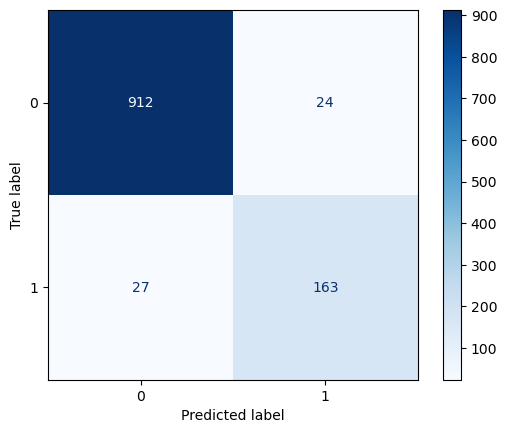

In [124]:
# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred_tuned_DT)

# Tampilkan Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')  # Bisa pakai cmap lain seperti 'viridis', 'Reds', dll.

# Tampilkan plot
plt.show()

### __5.3 Model LGBM__

#### __5.3.1 Test Oversampling with K-Fold Cross Validation__

In [125]:
## Menghitung performa model pada data training. 
def calc_train_error(X_train, y_train, model):
#     '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train) # Prediksi label untuk training data
    predictProba = model.predict_proba(X_train) # probabilitas prediksi kelas positif
    accuracy = accuracy_score(y_train, predictions) # akurasi model 
    f1 = f1_score(y_train, predictions, average='macro') # f1 Score (macro)
    roc_auc = roc_auc_score(y_train, predictProba[:,1]) # ROC AUC untuk kelas 1
    recall = recall_score(y_train, predictions) # Recall score
    precision = precision_score(y_train, predictions) # Precision score
    report = classification_report(y_train, predictions) # Classification report
    return { 
        'report': report, 
        'f1' : f1, 
        'roc': roc_auc, 
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }

## Menghitung performa model pada data testing. Tujuan ==>  melihat apakah model bisa generalize ke data baru atau justru mengalami overfitting
def calc_validation_error(X_test, y_test, model):
#     '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test) # Prediksi label untuk testing data
    predictProba = model.predict_proba(X_test) # probabilitas prediksi kelas positif
    accuracy = accuracy_score(y_test, predictions) # akurasi model
    f1 = f1_score(y_test, predictions, average='macro') # F1 score (macro)
    roc_auc = roc_auc_score(y_test, predictProba[:,1]) # ROC AUC untuk kelas 1
    recall = recall_score(y_test, predictions) # recall score
    precision = precision_score(y_test, predictions) # precision 
    report = classification_report(y_test, predictions) # classification report
    return { 
        'report': report, 
        'f1' : f1, 
        'roc': roc_auc, 
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }

## Melatih model dan mengembalikan hasil evaluasi pada train & test
def calc_metrics(X_train, y_train, X_test, y_test, model):
#     '''fits model and returns the in-sample error and out-of-sample error'''
    model.fit(X_train, y_train) # melatih model dengan data train 
    train_error = calc_train_error(X_train, y_train, model) # Mengukur performa pada data train
    validation_error = calc_validation_error(X_test, y_test, model) # Mengukur performa pada data test
    return train_error, validation_error

In [126]:
## Kode ini digunakan untuk membandingkan performa model dengan dan tanpa oversampling menggunakan K-Fold Cross-Validation.

# Konsep Utama :
# - Menggunakan Stratified K-Fold (K=10) ==> Membagi dataset menjadi 10 bagian (fold), memastikan distribusi kelas tetap seimbang di setiap fold.
# - Oversampling menggunakan RandomOverSampler() ==> Menyeimbangkan jumlah sampel di setiap kelas dalam data pelatihan untuk mengatasi ketidakseimbangan kelas.
# - Model yang digunakan adalah XGBClassifier() ==> Model ini diterapkan dalam Pipeline yang mencakup preprocessing (transformer) dan model.
# - Menggunakan Fungsi calc_metrics() ==> Menghitung metrik evaluasi (accuracy, recall, precision, F1-score, ROC-AUC, dll.) untuk train dan validation set.

K = 10 # dataset dibagi menjadi 10 fold
kf = StratifiedKFold(n_splits=K, shuffle=True, random_state=42) 
# StratifiedKFold digunakan untuk menjaga proporsi kelas di setiap fold.
# shuffle=True ==> Data akan diacak sebelum dibagi.
# random_state=42 ==> Agar pembagian tetap konsisten setiap kali kode dijalankan.


data = x_train
target = y_train

# list untuk menyimpan hasil evaluasi tanpa oversampling
train_errors_without_oversampling = []
validation_errors_without_oversampling = []

# list untuk menyimpan hasil evaluasi dengan oversampling
train_errors_with_oversampling = []
validation_errors_with_oversampling = []



for train_index, val_index in kf.split(data, target): # looping K fold cross validation
    
    # Membagi data menjadi train dan validation berdasarkan indeks yang diberikan oleh StratifiedKFold
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    Y_train, Y_val = target.iloc[train_index], target.iloc[val_index]
    
#     print(len(X_val), (len(X_train) + len(X_val)))
    ros = RandomOverSampler() # oversampling dengan random oversampler

    X_ros, Y_ros = ros.fit_resample(X_train, Y_train) # dilakukan oversample pada data pelatihan. (X_ros, Y_ros) akan digunakan untuk membandingkan performa model.
        
    # instantiate model
    lgbm = lgb.LGBMClassifier() # Menggunakan model dengan score terbaik dari hasil benchmarking
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',lgbm)
    ])

    #Evaluasi model
    train_error_without_oversampling, val_error_without_oversampling = calc_metrics(X_train, Y_train, X_val, Y_val, estimator) ## Tanpa Oversampling
    train_error_with_oversampling, val_error_with_oversampling = calc_metrics(X_ros, Y_ros, X_val, Y_val, estimator) ## Dengan Oversampling
    
    # Menyimpan Hasil Evaluasi
    train_errors_without_oversampling.append(train_error_without_oversampling) # Train Error tanpa oversampling
    validation_errors_without_oversampling.append(val_error_without_oversampling) # Validation Error tanpa oversampling 
    
    train_errors_with_oversampling.append(train_error_with_oversampling) # Train Error dengan oversampling
    validation_errors_with_oversampling.append(val_error_with_oversampling) # Validation Error tanpa oversampling

[LightGBM] [Info] Number of positive: 682, number of negative: 3371
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000983 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 454
[LightGBM] [Info] Number of data points in the train set: 4053, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.168270 -> initscore=-1.597935
[LightGBM] [Info] Start training from score -1.597935
[LightGBM] [Info] Number of positive: 3371, number of negative: 3371
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000852 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 455
[LightGBM] [Info] Number of data points in the train set: 6742, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [

#### __5.3.2 Evaluation Metrics Without Oversampling__

In [127]:
listItem = [] # list untuk menyimpanmetrik evaluasi dari setiap fold

# looping untuk mengumpulkan metrik evaluasi
for tr,val in zip(train_errors_without_oversampling,validation_errors_without_oversampling) :
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],
                     tr['recall'],val['recall'],tr['precision'],val['precision']])

listItem.append(list(np.mean(listItem,axis=0))) # Menghitung rata-rata untuk setiap metrik dari seluruh fold. Hasilnya ditambahkan sebagai baris terakhir dalam listItem.

# Membuat DataFrame dari listItem
dfEvaluate = pd.DataFrame(listItem, 
                    columns=['Train Accuracy', 
                            'Test Accuracy', 
                            'Train ROC AUC', 
                            'Test ROC AUC', 
                            'Train F1 Score',
                            'Test F1 Score',
                            'Train Recall',
                            'Test Recall',
                            'Train Precision',
                            'Test Precision'])

# Mengubah Indeks Baris Terakhir Menjadi average
listIndex = list(dfEvaluate.index)
listIndex[-1] = 'Average'
dfEvaluate.index = listIndex
dfEvaluate

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.996792,0.953437,0.999984,0.963018,0.994240,0.910699,0.983871,0.776316,0.997028,0.936508
1,0.998273,0.962306,0.999985,0.983474,0.996906,0.930919,0.991202,0.855263,0.998523,0.915493
2,0.998026,0.966741,0.999970,0.983298,0.996462,0.936214,0.989736,0.815789,0.998521,0.984127
3,0.998273,0.957871,0.999986,0.972491,0.996906,0.921933,0.991202,0.828947,0.998523,0.913043
4,0.997287,0.968889,0.999989,0.977493,0.995132,0.942130,0.985359,0.866667,0.998516,0.942029
5,0.997780,0.962222,0.999992,0.978453,0.996027,0.926816,0.989751,0.800000,0.997050,0.967742
6,0.997287,0.960000,0.999963,0.979137,0.995132,0.926420,0.986804,0.842105,0.997037,0.914286
7,0.997780,0.960000,0.999993,0.977413,0.996013,0.926420,0.986804,0.842105,1.000000,0.914286
8,0.997780,0.980000,0.999972,0.990818,0.996017,0.963807,0.988270,0.921053,0.998519,0.958904
9,0.998273,0.962222,0.999971,0.980650,0.996906,0.930121,0.991202,0.842105,0.998523,0.927536


#### __5.3.3 Evaluation Metrics With Oversampling__

In [128]:
listItem = [] # # list untuk menyimpan metrik evaluasi dari setiap fold

# looping untuk mengumpulkan metrik evaluasi
for tr,val in zip(train_errors_with_oversampling,validation_errors_with_oversampling) :
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],
                     tr['recall'],val['recall'],tr['precision'],val['precision']])

# Menghitung rata-rata untuk setiap metrik dari seluruh fold. Hasilnya ditambahkan sebagai baris terakhir dalam listItem.
listItem.append(list(np.mean(listItem,axis=0)))

# Membuat DataFrame dari listItem
dfEvaluate = pd.DataFrame(listItem, 
                    columns=['Train Accuracy', 
                            'Test Accuracy', 
                            'Train ROC AUC', 
                            'Test ROC AUC', 
                            'Train F1 Score',
                            'Test F1 Score',
                            'Train Recall',
                            'Test Recall',
                            'Train Precision',
                            'Test Precision'])

# Mengubah Indeks Baris Terakhir Menjadi average
listIndex = list(dfEvaluate.index)
listIndex[-1] = 'Average'
dfEvaluate.index = listIndex
dfEvaluate

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.996440,0.955654,0.999922,0.974667,0.996440,0.919170,1.000000,0.842105,0.992931,0.888889
1,0.996144,0.966741,0.999930,0.984386,0.996144,0.943295,0.999407,0.960526,0.992927,0.858824
2,0.996589,0.962306,0.999939,0.977368,0.996589,0.932390,0.999407,0.881579,0.993805,0.893333
3,0.997034,0.964523,0.999990,0.971333,0.997033,0.937357,1.000000,0.907895,0.994102,0.884615
4,0.996589,0.968889,0.999938,0.981440,0.996589,0.944589,0.999703,0.920000,0.993514,0.896104
5,0.997034,0.946667,0.999966,0.979093,0.997034,0.905992,0.999703,0.866667,0.994394,0.822785
6,0.996886,0.933333,0.999957,0.975338,0.996886,0.890222,1.000000,0.907895,0.993811,0.750000
7,0.997924,0.951111,0.999974,0.976604,0.997924,0.915555,1.000000,0.894737,0.995865,0.829268
8,0.996145,0.968889,0.999953,0.990079,0.996145,0.945720,1.000000,0.934211,0.992348,0.887500
9,0.996441,0.964444,0.999949,0.977800,0.996441,0.936673,0.999407,0.894737,0.993514,0.894737


Dari test oversampling yang dilakukan pada model LGBM. dapat kita lihat bahwa model tanpa oversampling mendapat score __recall__ untuk data train yaitu __0.988__ dan score __recall__ untuk data test yaitu __0.839__ . Sedangkan model dengan oversampling mendapat score __recall__ untuk data train yaitu __0.999__ dan score __recall__ untuk data test yaitu __0.901__. score recall pada data test mengalami kenaikan yang cukup signifikan yaitu sebesar 8%, sedangkan untuk score recall pada data train hanya mengalami kenaikan sebsar 1%. sehingga diputuskan untuk melakukan oversampling pada hyperparameter tuning.

#### __5.3.4 Classification Reports Without Oversampling__

In [129]:
# Loop untuk menampilkan classification report model tanpa oversampling
for rep in validation_errors_without_oversampling :
    print(rep['report'])

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       375
           1       0.94      0.78      0.85        76

    accuracy                           0.95       451
   macro avg       0.95      0.88      0.91       451
weighted avg       0.95      0.95      0.95       451

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       375
           1       0.92      0.86      0.88        76

    accuracy                           0.96       451
   macro avg       0.94      0.92      0.93       451
weighted avg       0.96      0.96      0.96       451

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       375
           1       0.98      0.82      0.89        76

    accuracy                           0.97       451
   macro avg       0.97      0.91      0.94       451
weighted avg       0.97      0.97      0.97       451

              preci

#### __5.3.5 Classification Reports With Oversampling__

In [130]:
# Loop untuk menampilkan classification report model dengan oversampling
for rep in validation_errors_with_oversampling :
    print(rep['report'])

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       375
           1       0.89      0.84      0.86        76

    accuracy                           0.96       451
   macro avg       0.93      0.91      0.92       451
weighted avg       0.95      0.96      0.96       451

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       375
           1       0.86      0.96      0.91        76

    accuracy                           0.97       451
   macro avg       0.93      0.96      0.94       451
weighted avg       0.97      0.97      0.97       451

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       375
           1       0.89      0.88      0.89        76

    accuracy                           0.96       451
   macro avg       0.93      0.93      0.93       451
weighted avg       0.96      0.96      0.96       451

              preci

#### __5.3.6 Hyperparameter tuning LGBM__

Referensi :

- https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html
- https://medium.com/@hazallgultekin/hyperparameter-optimization-of-lightgbm-model-with-optuna-e5ad9f5688ff

In [131]:
lgbm = lgb.LGBMClassifier()
ros = RandomOverSampler(random_state=42) 

estimator=Pipeline([
    ('oversampling',ros),
    ('preprocess',transformer),
    ('model',lgbm)
])

hyperparam_space=[{
    'model__max_bin': [255, 300], # Jumlah maksimum bin untuk fitur numerik, default : 255
    'model__num_leaves':[31, 41], # Jumlah maksimum leaf dalam satu pohon, default : 31
    'model__min_data_in_leaf': [20, 30], # Jumlah minimum sampel dalam setiap leaf. default : 20
    'model__num_iterations':[100, 150], # Jumlah iterasi boosting, 100 
    'model__learning_rate': [0.1, 0.125], # Ukuran langkah saat update bobot, default : 0.125
    'model__random_state': [42]
}]

grid = GridSearchCV(estimator, 
                    n_jobs=-1, 
                    param_grid=hyperparam_space, 
                    scoring='recall', 
                    cv=StratifiedKFold(n_splits=10, 
                    shuffle=True, 
                    random_state=42))

In [132]:
grid.fit(x_train,y_train)
print(grid.best_score_)
print(grid.best_params_)

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Info] Number of positive: 3746, number of negative: 3746
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000989 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 501
[LightGBM] [Info] Number of data points in the train set: 7492, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
0.9089824561403509
{'model__learning_rate': 0.125, 'model__max_bin': 300, 'model__min_data_in_leaf': 30, 'model__num_iterations': 150, 'model__num_leaves': 41, 'model__random_state': 42}


In [133]:
best_model_LGBM = grid.best_estimator_
best_model_LGBM.fit(x_train, y_train)

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Info] Number of positive: 3746, number of negative: 3746
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000845 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 501
[LightGBM] [Info] Number of data points in the train set: 7492, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


Pipeline(steps=[('oversampling', RandomOverSampler(random_state=42)),
                ('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['PreferredPaymentMode',
                                                   'PreferedOrderCat',
                                                   'MaritalStatus'])])),
                ('model',
                 LGBMClassifier(learning_rate=0.125, max_bin=300,
                                min_data_in_leaf=30, num_iterations=150,
                                num_leaves=41, random_state=42))])

In [134]:
estimator=Pipeline([
    ('oversampling',ros),
    ('preprocess',transformer),
    ('model',lgbm)
])
estimator.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 3746, number of negative: 3746
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000884 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 456
[LightGBM] [Info] Number of data points in the train set: 7492, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


Pipeline(steps=[('oversampling', RandomOverSampler(random_state=42)),
                ('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['PreferredPaymentMode',
                                                   'PreferedOrderCat',
                                                   'MaritalStatus'])])),
                ('model', LGBMClassifier())])

In [135]:
y_pred_default_LGBM = estimator.predict(x_test)
y_pred_proba_default_LGBM = estimator.predict_proba(x_test)
y_pred_tuned_LGBM = best_model_LGBM.predict(x_test)
y_pred_proba_tuned_LGBM = best_model_LGBM.predict_proba(x_test)

recall_default_LGBM = recall_score(y_test, y_pred_default_LGBM)
recall_tuned_LGBM = recall_score(y_test, y_pred_tuned_LGBM)

print('Recall Score Default LGBM : ', recall_default_LGBM)
print('Recall Score Tuned LGBM : ', recall_tuned_LGBM)

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
Recall Score Default LGBM :  0.9368421052631579
Recall Score Tuned LGBM :  0.9578947368421052


setelah dilakukan tuning pada model __LGMB__ dapat kita lihat perbedaan score recallnya. score recall sebelum tuning yaitu __0.936__ dan setelah tuning yaitu __0.957__. Terjadi peningkatan score recall sebesar 2.1% menunjukkan bahwa performa model setelah dilakukan tuning menjadi lebih baik meskipun tidak mengalami kenaikan secara signifikan.

In [136]:
report_default_LGBM = classification_report(y_test, y_pred_default_LGBM)
report_tuned_LGBM = classification_report(y_test, y_pred_tuned_LGBM)

print('Classification Report Default LGBM : \n', report_default_LGBM)
print('Classification Report Tuned LGBM : \n', report_tuned_LGBM)

Classification Report Default LGBM : 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       936
           1       0.86      0.94      0.90       190

    accuracy                           0.96      1126
   macro avg       0.93      0.95      0.94      1126
weighted avg       0.97      0.96      0.97      1126

Classification Report Tuned LGBM : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       936
           1       0.95      0.96      0.95       190

    accuracy                           0.98      1126
   macro avg       0.97      0.97      0.97      1126
weighted avg       0.98      0.98      0.98      1126



- Recall untuk Kelas 1 (Positif). setelah tuning, terjadi peningkatan dari 94% ke 96% berarti model lebih baik dalam mendeteksi kelas positif setelah tuning. yang artinya model memiliki akurasi untuk memprediksi kelas positif (Churn) sebesar 96%.
- Recall untuk Kelas 0 (Negatif). Setelah tuning, terjadi Peningkatan dari 97% ke 99%. model hampir bisa secara sempurna mendeteksi kelas negatif (tidak churn) setelah tuning. yang artinya model memiliki akurasi untuk memprediksi kelas negatif(tidak churn) sebesar 99%.

#### __5.3.7 Confusion Matrix LGBM__

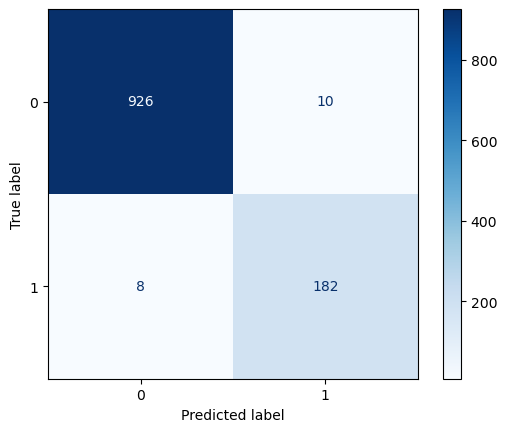

In [137]:
cm = confusion_matrix(y_test, y_pred_tuned_LGBM)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues') 
plt.show()

### __5.4 Model yang dipilih__

dari ketiga model yang telah dilakukan hyperparameter tuning, kita mendapatkan hasil confusion matrix sebagai berikut:
- Model XGB :
    - True Negative (model memprediksi member tidak churn, dan aktualnya member tidak churn) = 924
    - True Positif (model memprediksi member churn, dan aktualnya member churn) = 179
    - False Negative (model memprediksi member tidak churn, namun aktualnya member churn) = 11
    - False Positive (model memprediksi member churn, namun aktualnya member tidak churn) = 12

- Model Decision Tree :
    - True Negative (model memprediksi member tidak churn, dan aktualnya member tidak churn) = 912
    - True Positif (model memprediksi member churn, dan aktualnya member churn) = 163
    - False Negative (model memprediksi member tidak churn, namun aktualnya member churn) = 27
    - False Positive (model memprediksi member churn, namun aktualnya member tidak churn) = 24
 
- Model LGBM :
    - True Negative (model memprediksi member tidak churn, dan aktualnya member tidak churn) = 926
    - True Positif (model memprediksi member churn, dan aktualnya member churn) = 182
    - False Negative (model memprediksi member tidak churn, namun aktualnya member churn) = 8
    - False Positive (model memprediksi member churn, namun aktualnya member tidak churn) = 10
 
sesuai dengan eva matrics yang ditentukan di awal, kondisi untuk menurunkan resiko churn adalah menggunakan model dengan nilai recall terbaik, maka untuk mendapatkan recall yang paling besar kita perlu memilih nilai FN yang paling kecil. sehingga dari ketiga model tersebut, kita memilih model __LGBM__ untuk dijadikan alat dalam membantu perusahaan memprediksi member melakukan churn atau tidak.

### __5.5 FEATURE IMPORTANCE MODEL LGBM__

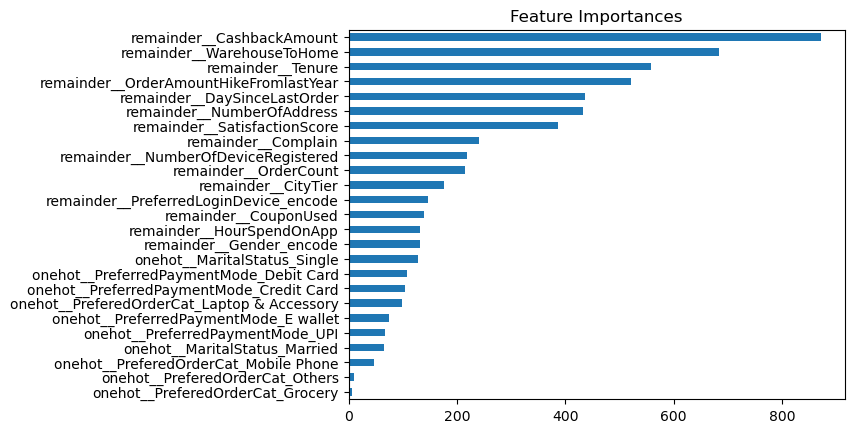

In [138]:
coef1 = pd.Series(best_model_LGBM['model'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = True)
coef1.plot(kind='barh', title='Feature Importances')
plt.show()

- fitur yang memiliki nilai besar menunjukkan bahwa model lebih bergantung pada variabel tersebut dalam membuat prediksi
- fitur dengan nilai feature importance tertinggi adalah fitur `CashbackAmouunt`. artinya jumlah `Cashback` memiliki pengaruh paling besar terhadap model. jika di interpretasikan pada bisnis maka `Cashback` dapat menjadi faktor utama dalam keputusan pelanggan untuk churn atau tidak.
- fitur lainnya yang juga memiliki pengaruh cukup besar yaitu `WarehouseToHome`, `Tenure`, `OrderAmountHikeFromLastYear`. artinya ketiga fitur tersbut juga memiliki pengaruh yang kuat terhadap model dalam membuat prediksi.
- fitur dengan nilai rendah seperti `PreferedOrderCat_Grocery dan onehot__PreferedOrderCat_Others memiliki dampak kecil dalam model.

## __6. Analisis Dampak Bisnis: E-Commerce Customer Churn Prediction__

### __6.1 Pendahuluan__
Project churn prediction yang telah kita kembangkan menunjukkan hasil yang sangat menjanjikan dengan tingkat akurasi 98%. Model ini secara signifikan dapat membantu TechStyle dalam mengidentifikasi pelanggan yang berpotensi churn dengan presisi tinggi. Dibandingkan dengan praktik industri yang umumnya mencapai akurasi 70-80%, performa model kita jauh melampaui benchmark tersebut.

### __6.2 Analisis Model Performance__
Model LGBM yang telah kita tune menunjukkan performa yang exceptional dengan precision 0.95 dan recall 0.96 untuk kelas churn. Ini berarti dari 100 pelanggan yang diprediksi akan churn, 95 diantaranya merupakan prediksi yang akurat, dan model berhasil mengidentifikasi 96% dari total pelanggan yang benar-benar akan churn.

### __6.3 Analisis Dampak Finansial__

#### __Scenario Tanpa Model__
Tanpa menggunakan model prediksi, TechStyle harus melakukan intervensi retensi kepada seluruh pelanggan yang berjumlah 1,126. Dengan biaya retensi sebesar $60 per pelanggan (berdasarkan standar industri dari HubSpot Research 2024), total biaya yang harus dikeluarkan adalah:
- Total Biaya = 1,126 × $60 = $67,560 per bulan
- Annual Cost = $810,720

#### __Scenario Dengan Model__
Dengan menggunakan model prediksi kita:
1. Jumlah pelanggan yang diprediksi churn: 192 pelanggan
   - True Positives: 182 pelanggan (96% dari 190 aktual churn)
   - False Positives: 10 pelanggan (1% dari 936 non-churn)
2. Biaya Intervensi = 192 × $60 = $11,520 per bulan
   - Annual Cost = $138,240
3. Penghematan Biaya = $67,560 - $11,520 = $56,040 per bulan
   - Annual Savings = $672,480

### __6.3 Analisis Revenue Impact__

#### __Potential Loss dari Churn__
Berdasarkan analisis data, kita mengetahui:
1. Rata-rata revenue per member loyal: $3,612.70 per bulan
2. Rata-rata revenue member yang churn: $3,207.42 per bulan
3. Delta revenue per member: $405.28
4. Membership fee: $199 per bulan

Potential monthly loss dari 190 member churn:
- Transaction Value Loss = $405.28 × 190 = $77,003.20
- Membership Fee Loss = $199 × 190 = $37,810.00
- Total Monthly Loss = $114,813.20
- Annual Loss = $1,377,758.40

#### __Revenue Saved dengan Model__
Dengan model, kita dapat mengintervensi 182 dari 190 member yang akan churn:
- Transaction Value Saved = $405.28 × 182 = $73,760.96
- Membership Fee Saved = $199 × 182 = $36,218.00
- Total Monthly Saved = $109,978.96
- Annual Saved = $1,319,747.52

#### __ROI Analysis__

| Scenario | Monthly Cost | Monthly Benefit | Net Monthly Gain | Annual ROI |
|----------|--------------|----------------|------------------|------------|
| Tanpa Model | $67,560 | $114,813.20 | $47,253.20 | 69.94% |
| Dengan Model | $11,520 | $109,978.96 | $98,458.96 | 854.68% |

### __6.4 Kesimpulan & Rekomendasi__

1. Model prediksi churn LGBM yang telah kita kembangkan menunjukkan performa exceptional dengan akurasi 98%, precision 0.95, dan recall 0.96.

2. Implementasi model akan memberikan efisiensi biaya yang signifikan:
   - Pengurangan biaya retensi sebesar 82.95% ($67,560 → $11,520)
   - Peningkatan net benefit sebesar 108.36% ($47,253.20 → $98,458.96)
   - ROI yang jauh lebih tinggi (854.68% vs 69.94%)

3. Rekomendasi Strategis:
   - Implementasikan model sebagai bagian dari sistem early warning churn
   - Kembangkan program retensi yang berbeda berdasarkan tier membership
   - Prioritaskan intervensi untuk Basic Members (0-3 bulan) yang memiliki churn rate tertinggi (41.86%)
   - Fokuskan pada penanganan komplain dan peningkatan cashback program

4. Next Steps:
   - Deploy model ke production environment
   - Integrasikan dengan sistem CRM
   - Develop dashboard monitoring real-time
   - Establish SOP untuk intervensi berdasarkan prediksi model

## __7. CONCLUSION__

### __7.1 Conclusion Data Analysis__

Berikut ini Faktor yang memiliki pengaruh kuat terhadap member untuk melakukan churn atau tidak melanjutkan membership:

- Pelanggan dengan tenure lebih singkat cenderung memiliki potensi yang lebih tinggi untuk melakukan churn dibandingkan dengan pelanggan dengan tenure lebih lama. Ini menunjukkan bahwa semakin lama pelanggan berlangganan, semakin kecil kemungkinan mereka untuk churn.
- Pelanggan yang mengajukan komplain lebih rentan untuk churn, yang bisa mengindikasikan bahwa keluhan mereka tidak ditangani dengan baik atau mereka kecewa dengan layanan yang diterima.
- Pelanggan yang menerima cashback lebih besar tampaknya lebih cenderung tetap bertahan. Pelanggan churn lebih umum di kelompok dengan cashback lebih rendah.
- Pelanggan dengan jarak lebih jauh dari gudang cenderung memiliki tingkat churn yang lebih tinggi dibandingkan dengan pelanggan yang lebih dekat ke gudang. Ini menunjukkan bahwa faktor jarak memiliki pengaruh signifikan terhadap churn pelanggan.
- Terdapat hubungan signifikan antara PreferredPaymentMode dan churn. Pelanggan yang menggunakan Cash on Delivery (COD) dan E-wallet memiliki tingkat churn yang lebih tinggi dibandingkan dengan pelanggan yang menggunakan metode pembayaran lain seperti Credit Card, Debit Card, atau UPI.
- Terdapat gap yang sangat besar antara churn rate di Basic Member dengan tier-tier lainnya, menunjukkan bahwa 3 bulan pertama adalah periode kritis dalam journey pelanggan TechStyle. Sementara itu, terdapat anomali kecil di Gold Member yang memiliki churn rate lebih tinggi dibandingkan Silver Member.
    * Basic Member: Churn rate tertinggi (41.9%) dengan 1,560 total member
    * Silver Member: Churn rate 7.5% dengan 590 total member
    * Gold Member: Churn rate 9.8% dengan 1,584 total member
    * Platinum Member: Churn rate terendah (5.0%) dengan 1,896 total member
ber.

### __7.2 Conclusion Model LGBM__
Accuracy (0.98)
- Dari total 1,126 member dalam data testing, model berhasil memprediksi dengan tepat sebanyak 1,108 kasus
- Terdiri dari 926 member yang tepat diprediksi tidak churn dan 182 member yang tepat diprediksi churn
- Ini menunjukkan tingkat akurasi keseluruhan model sebesar 98%

Recall
1. Recall untuk Non-Churn (0.99)
- Dari 936 member yang sebenarnya tidak churn, 926 member berhasil diprediksi dengan tepat sebagai non-churn
- Artinya 99% member loyal berhasil diidentifikasi dengan benar
- Hanya 1% (10 member) yang salah dikategorikan sebagai churn
2. Recall untuk Churn (0.96)
- Dari 190 member yang sebenarnya churn, 182 member berhasil diprediksi dengan tepat sebagai churn
- Artinya 96% member yang berpotensi churn berhasil diidentifikasi dengan benar
- Hanya 4% (8 member) yang tidak terdeteksi sebagai churn

Precision
1. Precision untuk Non-Churn (0.99)
- Dari 934 member yang diprediksi tidak churn, 926 member benar-benar tidak churn
- Tingkat ketepatan 99% dalam mengidentifikasi member loyal
- Hanya 8 member yang seharusnya churn tapi diprediksi tidak churn
2. Precision untuk Churn (0.95)
- Dari 192 member yang diprediksi churn, 182 member benar-benar churn
- Tingkat ketepatan 95% dalam mengidentifikasi member yang berpotensi churn
- Hanya 10 member yang seharusnya tidak churn tapi diprediksi churn

Model LGBM yang dikembangkan menunjukkan performa yang sangat baik dalam mengidentifikasi potensi churn di TechStyle. Dengan akurasi 98%, model ini memberikan dasar yang sangat kuat untuk program retensi pelanggan.

Aspek paling kritis dalam prediksi churn adalah kemampuan model untuk menangkap member yang benar-benar akan churn (recall untuk churn = 96%). Dari perspektif bisnis, ini berarti:
- Dari setiap 100 member yang berpotensi churn, model berhasil mengidentifikasi 96 member
- Hanya 4 member yang 'lolos' dari radar program retensi
- Ini memungkinkan tim Retensi untuk fokus pada hampir semua member yang berisiko

Sama pentingnya, model memiliki precision 95% untuk prediksi churn, yang berarti:
- Dari setiap 100 member yang ditandai untuk program retensi, 95 memang benar-benar berisiko churn
- Hanya 5 member yang mungkin mendapat intervensi retensi yang tidak diperlukan
- Ini menunjukkan efisiensi tinggi dalam alokasi sumber daya untuk program retensi

Model juga sangat akurat dalam mengidentifikasi member loyal (recall dan precision 99% untuk non-churn), memastikan bahwa:
- Resources tidak terbuang untuk intervensi yang tidak diperlukan
- Member loyal tidak terganggu dengan program retensi yang tidak relevan
- Tim dapat fokus pada segmen yang benar-benar membutuhkan perhatian

Dengan performa ini, model memberikan dasar yang solid untuk implementasi program retensi yang efektif dan efisien, memungkinkan TechStyle untuk memaksimalkan ROI dari upaya retensi pelanggan.

## __8. Recommendation__

### __8.1 Berdasarkan Data Analysis yang dilakukan, diberikan rekomendasi agar dapat meningkatkan conversion rate dan keuntungan perusahaan__ :

__Distribusi Churn berdasarkan Tier__
Berdasarkan analisis tier membership yang telah dilakukan, terdapat pola churn yang bervariasi:
- Basic Member: 41.9% churn rate (tertinggi)
- Silver Member: 7.5% churn rate
- Gold Member: 9.8% churn rate
- Platinum Member: 5.0% churn rate (terendah)

#### __1. Implementasi Threshold Berbeda per Tier__

- **Basic Member: Intervensi pada probability >40%**
     * Justifikasi: Dengan churn rate tinggi (41.9%), tier ini membutuhkan pendekatan agresif dalam penanganan churn
     * ROI Calculation: Meskipun intervensi pada threshold rendah berisiko menghasilkan lebih banyak false positive, cost of inaction (kehilangan pelanggan yang baru bergabung) jauh lebih tinggi dibandingkan cost of intervention
     * Dampak Finansial: Early intervention di Basic Member sangat kritis karena merupakan pintu masuk ke tier yang lebih tinggi dan profitable
     * Nilai threshold 40% menyeimbangkan antara cakupan intervensi yang luas dengan efisiensi resource

- **Silver Member: Intervensi pada probability >60%**
     * Justifikasi: Churn rate relatif rendah (7.5%) menunjukkan bahwa mayoritas Silver Member sudah memiliki loyalitas yang baik
     * ROI Calculation: Threshold yang lebih tinggi memungkinkan fokus pada member yang benar-benar berisiko, menghemat resources untuk tier yang sudah relatif stabil
     * Dampak Finansial: Kehilangan nilai dari false negative di tier ini lebih dapat ditoleransi dibandingkan Basic Member
     * Nilai 60% mencerminkan pendekatan konservatif yang sesuai dengan karakteristik tier yang stabil

- **Gold Member: Intervensi pada probability >50%**
     * Justifikasi: Churn rate 9.8% menunjukkan risiko menengah, namun lebih tinggi dari Silver Member (anomali)
     * ROI Calculation: Balance antara cost of intervention dan potential loss dari churned Gold Member
     * Dampak Finansial: Gold Member memiliki nilai transaksi yang lebih signifikan, sehingga membutuhkan pendekatan yang lebih agresif dibandingkan Silver Member
     * Threshold 50% merupakan titik keseimbangan yang memungkinkan cakupan memadai tanpa terlalu banyak false positive

- **Platinum Member: Intervensi pada probability >30%**
     * Justifikasi: Meskipun memiliki churn rate terendah (5%), Platinum Member mewakili nilai pelanggan tertinggi dengan rata-rata transaksi dan frequency order tertinggi
     * ROI Calculation: Cost of losing satu Platinum Member sangat tinggi, sehingga pendekatan ultra-konservatif adalah yang paling sesuai
     * Dampak Finansial: Rata-rata revenue Platinum Member yang tinggi ($4,177.17/bulan) menjustifikasi threshold rendah
     * Nilai 30% mencerminkan low risk tolerance untuk kehilangan member di tier tertinggi

#### __2. Alokasi Budget Retensi__

Strategi alokasi budget retensi harus berdasarkan hasil prediksi model ML untuk setiap tier. Dengan asumsi distribusi member yang diprediksi churn merata di seluruh tier, alokasi dapat dilakukan dengan pertimbangan:

- **Basic Member**: 
     * Proporsi terbesar karena volume tinggi dan nilai strategis sebagai pipeline untuk tier lebih tinggi
     * Expected churn rate yang tinggi tanpa intervensi
     * Kebutuhan investasi signifikan untuk meningkatkan onboarding dan early engagement

- **Silver Member**: 
     * Proporsi lebih kecil karena churn rate terendah dan volumenya paling sedikit
     * Fokus pada stabilisasi dan persiapan transisi ke Gold tier

- **Gold Member**: 
     * Alokasi moderat untuk mengatasi anomali churn yang lebih tinggi dibanding Silver tier
     * Investasi dalam experience enhancement untuk meningkatkan konversi ke Platinum

- **Platinum Member**: 
     * Proporsi sesuai meskipun churn rate rendah karena nilai pelanggan sangat tinggi
     * Fokus pada personalisasi dan value maximization

#### __3. Restrukturisasi Program Cashback dan Benefit Tier__

Analisis menunjukkan pola cashback dan order yang bervariasi per tier:
- Basic Member: $155.66 cashback, 2.32 order/bulan, revenue $3,113.28/bulan
- Silver Member: $169.91 cashback, 2.97 order/bulan, revenue $3,398.12/bulan
- Gold Member: $163.31 cashback, 2.75 order/bulan, revenue $3,266.28/bulan
- Platinum Member: $208.86 cashback, 3.67 order/bulan, revenue $4,177.17/bulan

##### __A. Basic Member (0-3 bulan)__
- **Cashback**: 3% cashback dasar, bonus 1% untuk order ke-3 dalam sebulan
     * Justifikasi: Dengan rata-rata revenue $3,113.28/bulan, cashback 3% menghasilkan $93.40, lebih rendah dari current state ($155.66) namun memberikan insentif untuk meningkatkan frekuensi order
     * Bonus 1% untuk order ke-3 bertujuan mendorong peningkatan frequency dari current 2.32 order/bulan
     * Proporsi cashback terhadap membership fee ($93.40/$199 = 47%) masih memberikan marjin sehat untuk perusahaan

- **Benefit Tambahan**:
     * Gratis ongkir untuk pembelian >$100. Justifikasi: Threshold ditetapkan di ~1/13 dari monthly revenue untuk mendorong pembelian namun tetap achievable
     * Voucher selamat datang $10. Justifikasi: 5% dari membership fee, sebagai welcome gesture yang affordable
     * Akses ke flash sale reguler. Justifikasi: Low-cost benefit yang memberikan perceived value tinggi
     * Prioritas customer service 12 jam. Justifikasi: Standar dasar dengan mempertimbangkan cost staffing dan resource

##### __B. Silver Member (3-6 bulan)__
- **Cashback**: 5% cashback dasar, bonus 2% untuk order ke-4 dalam sebulan
     * Justifikasi: Dengan rata-rata revenue $3,398.12/bulan, cashback 5% menghasilkan $169.91 (sama dengan current state)
     * Bonus 2% untuk order ke-4 mendorong peningkatan dari current 2.97 order/bulan
     * Proporsi cashback terhadap membership fee ($169.91/$199 = 85%) menunjukkan value proposition yang kuat

- **Benefit Tambahan**:
     * Gratis ongkir untuk pembelian >$75. Justifikasi: ~1/17 dari monthly revenue, lebih rendah dari Basic menunjukkan upgrade benefit
     * Voucher bulanan $15. Justifikasi: 7.5% dari membership fee, peningkatan 50% dari Basic
     * Akses ke ekslusif weekend sale. Justifikasi: Differentiated access menciptakan tier separation yang jelas
     * Prioritas customer service 8 jam. Justifikasi: 33% peningkatan dari Basic, menunjukkan prioritas yang lebih tinggi
     * Birthday discount 10%. Justifikasi: Low-frequency high-perceived value benefit dengan cost manageable

##### __C. Gold Member (6-12 bulan)__
- **Cashback**: 7% cashback dasar, bonus 3% untuk order ke-5 dalam sebulan
     * Justifikasi: Dengan rata-rata revenue $3,266.28/bulan, cashback 7% menghasilkan $228.64 (lebih tinggi dari current $163.31)
     * Peningkatan signifikan ini mengatasi anomali churn di Gold tier (9.8%)
     * Bonus 3% untuk order ke-5 bertujuan meningkatkan frequency dari current 2.75 order/bulan
     * Proporsi cashback-to-fee yang lebih tinggi ($228.64/$199 = 115%) menjustifikasi tenure yang lebih panjang

- **Benefit Tambahan**:
     * Gratis ongkir untuk pembelian >$50. Justifikasi: ~1/32 dari monthly revenue, signifikan lebih rendah menunjukkan tier value
     * Voucher bulanan $25. Justifikasi: 12.5% dari membership fee, hampir double Silver benefit
     * Akses ke pre-sale event. Justifikasi: High perceived value dengan low actual cost
     * Prioritas customer service 4 jam. Justifikasi: 50% peningkatan dari Silver, menunjukkan tier premium
     * Birthday discount 15%. Justifikasi: Peningkatan 50% dari Silver menunjukkan tier value
     * Dedicated account manager. Justifikasi: Investasi personalized service untuk retention di tier yang lebih tinggi

##### __D. Platinum Member (>12 bulan)__
- **Cashback**: 10% cashback dasar, bonus 5% untuk order ke-6 dalam sebulan
     * Justifikasi: Dengan rata-rata revenue $4,177.17/bulan, cashback 10% menghasilkan $417.72 (double dari current $208.86)
     * Peningkatan dramatic ini sesuai dengan nilai strategis Platinum member
     * Bonus 5% untuk order ke-6 mendorong peningkatan dari current 3.67 order/bulan
     * Proporsi cashback yang sangat tinggi ($417.72/$199 = 210%) mengkompensasi loyalty jangka panjang

- **Benefit Tambahan**:
     * Gratis ongkir tanpa minimal pembelian. Justifikasi: Ultimate convenience, menghilangkan friction dalam pembelian
     * Voucher bulanan $50. Justifikasi: 25% dari membership fee, menunjukkan value proposition premium
     * Akses ke exclusive limited-edition products. Justifikasi: Status symbol dengan high perceived value
     * Priority customer service 1 jam. Justifikasi: 75% peningkatan dari Gold, menunjukkan service level tertinggi
     * Birthday discount 20% + special gift. Justifikasi: Combination benefit yang menciptakan memorable experience
     * Dedicated premium account manager. Justifikasi: Personalized service untuk member dengan lifetime value tertinggi
     * Invitation to annual VIP event. Justifikasi: High-cost benefit namun menghasilkan engagement dan brand loyalty yang sangat tinggi

#### __4. Strategi Intervensi Spesifik per Tier__

##### __A. Basic Member (Critical Period Intervention)__
Data menunjukkan 41.9% Basic Member churn dengan 33.5% persentase complain. Strategi intervensi:

1. **Onboarding Fast Track**:
    - Welcome call dalam 24 jam setelah signup
        * Justifikasi: First impression kritis dalam 24 jam pertama, dan data menunjukkan Basic Member membutuhkan engagement awal yang kuat
        * Implementasi: Sistem automated call scheduling dengan script terstruktur
        * Pengukuran: First-call resolution rate, signup-to-first-purchase time
        
    - Video tutorial personalized berdasarkan kategori produk pertama
        * Justifikasi: 33.5% complain rate menunjukkan potential knowledge gap dalam penggunaan platform
        * Implementasi: Library tutorial video pre-recorded dengan personalization based on first browsing behavior
        * Pengukuran: Video completion rate, post-video engagement metrics
    - Follow-up email otomatis di hari ke-7, 14, dan 21
        * Justifikasi: Critical period intervention di minggu-minggu awal dengan jeda waktu yang strategis
        * Implementasi: Templated email sequence dengan dynamic content
        * Pengukuran: Email open rate, click-through rate, conversion rate

2. **Early Warning Response**:
    - Alert sistem jika tidak ada order dalam 14 hari
        * Justifikasi: Dengan rata-rata 2.32 order/bulan, tidak ada aktivitas selama 14 hari merupakan red flag
        * Implementasi: Automated alert system dengan escalation path
        * Pengukuran: Alert-to-intervention time, intervention success rate
    - Proactive outreach jika terjadi complain dengan resolusi <24 jam
        * Justifikasi: Complain dari Basic Member perlu respons cepat karena tingginya churn risk
        * Implementasi: Dedicated team untuk Basic Member complaint handling
        * Pengukuran: Complaint resolution time, post-resolution satisfaction
    - Special win-back offer jika menunjukkan tanda-tanda churn
        * Justifikasi: Investasi khusus diperlukan untuk member yang terdeteksi pada threshold churn prediction
        * Implementasi: Tiered offer based on customer value
        * Pengukuran: Offer acceptance rate, post-offer retention

3. **Value Acceleration Program**:
    - Double cashback untuk pembelian kedua dalam 30 hari
        * Justifikasi: Incentivize repeat purchase dalam window kritis 30 hari
        * Implementasi: Automated cashback multiplier
        * Pengukuran: Time-to-second-purchase, average order value change
    - "Fast Track to Silver" dengan 3 pembelian dalam 60 hari
        * Justifikasi: Mempercepat transisi ke tier dengan churn rate lebih rendah (7.5%)
        * Implementasi: Accelerated tier progression program
        * Pengukuran: Tier progression rate, post-progression retention
    - Personalized recommendation berdasarkan browsing behavior
        * Justifikasi: Relevance meningkatkan engagement dan reduces decision paralysis
        * Implementasi: ML-based recommendation engine
        * Pengukuran: Recommendation click-through rate, conversion rate

##### __B. Silver Member (Stability Enhancement)__
Tier dengan churn rate terendah (7.5%) dan persentase complain terendah (23.2%):

1. **Engagement Reinforcement**:
    - Monthly "Silver Benefits" reminder email
        * Justifikasi: Memperkuat value perception di tier dengan satisfaction tertinggi
        * Implementasi: Benefit utilization reminder dengan success stories
        * Pengukuran: Benefit utilization rate, engagement lift post-reminder
    - Mid-tier milestone celebration pada bulan ke-4.5
        * Justifikasi: Menjembatani gap psikologis di tengah tenure Silver (3-6 bulan)
        * Implementasi: Special offer/recognition di pertengahan journey
        * Pengukuran: Milestone engagement, post-milestone retention
    - Category-specific promotions berdasarkan purchase history
        * Justifikasi: Leveraging existing preference untuk meningkatkan frequency 2.97 order/bulan
        * Implementasi: Targeted promotion engine dengan purchase data
        * Pengukuran: Category penetration depth, cross-category conversion

2. **Loyalty Loop Development**:
    - Implementasi sistem poin loyalitas khusus Silver
        * Justifikasi: Mekanisme engagement tambahan untuk tier yang sudah stabil
        * Implementasi: Points accrual system dengan meaningful redemption
        * Pengukuran: Points earning rate, redemption rate
    - Preview benefit Gold setelah 5 bulan
        * Justifikasi: Menciptakan aspirational value untuk transisi ke tier berikutnya
        * Implementasi: Limited-time trial access ke Gold benefits
        * Pengukuran: Preview engagement, upgrade conversion rate
    - Referral program dengan double reward
        * Justifikasi: Memanfaatkan tingkat kepuasan tinggi di Silver tier untuk akuisisi
        * Implementasi: Enhanced referral structure untuk Silver members
        * Pengukuran: Referral send rate, conversion rate, quality of referred customers

##### __C. Gold Member (Anomaly Treatment)__
Menunjukkan anomali dengan churn rate (9.8%) lebih tinggi dari Silver:

1. **Experience Assessment**:
    - Proactive satisfaction survey di bulan ke-8
        * Justifikasi: Mengidentifikasi root cause anomali churn di tier ini
        * Implementasi: Targeted survey dengan incentive for completion
        * Pengukuran: Survey completion rate, insight actionability
    - Dedicated session dengan account manager untuk evaluasi pengalaman
        * Justifikasi: Personalized approach untuk high-value member di risk tier
        * Implementasi: Structured conversation dengan focused questions
        * Pengukuran: Session completion rate, issue identification rate
    - Focus group untuk Gold member dengan tenure 9-11 bulan
        * Justifikasi: Periode kritis menjelang potential upgrade/churn decision
        * Implementasi: Small group discussion dengan specific agenda
        * Pengukuran: Insight generation, implementasi rekomendasi

2. **Value Enhancement**:
    - Gold-exclusive product bundles dengan harga preferensial
        * Justifikasi: Meningkatkan value perception di tier dengan slight cashback anomaly
        * Implementasi: Curated bundles dengan margin contribution yang dioptimalkan
        * Pengukuran: Bundle adoption rate, margin impact
    - Privilege access ke new product testing
        * Justifikasi: Creates exclusivity dan sense of importance
        * Implementasi: Beta testing program dengan feedback mechanism
        * Pengukuran: Participation rate, NPS dari program
    - Customized shopping experience berdasarkan preference
        * Justifikasi: Personalisasi untuk meningkatkan relevance dan satisfaction
        * Implementasi: Customized UI/UX berdasarkan shopping history
        * Pengukuran: Engagement metrics, conversion rate lift

3. **Platinum Transition Path**:
    - Clear visualization transition path to Platinum
        * Justifikasi: Menciptakan aspirational clarity untuk progress
        * Implementasi: Interactive progress visualization di dashboard
        * Pengukuran: Visualization engagement, progress acceleration  
    - "Almost Platinum" preview benefit di bulan ke-11
        * Justifikasi: Menciptakan compelling reason untuk complete transition
        * Implementasi: Limited time access ke selected Platinum benefits
        * Pengukuran: Preview utilization, conversion impact
    - Transition coaching call menjelang upgrade ke Platinum
        * Justifikasi: High-touch approach di decision point kritis
        * Implementasi: Scheduled consultation dengan focus pada value maximization
        * Pengukuran: Call completion rate, conversion rate

##### __D. Platinum Member (Value Maximization)__
Tier dengan nilai transaksi tertinggi dan churn rate terendah (5.0%):

1. **White Glove Service**:
    - Dedicated concierge team dengan penanganan prioritas
        * Justifikasi: Service premium untuk member dengan LTV tertinggi
        * Implementasi: Specialized team dengan training khusus Platinum service
        * Pengukuran: Response time, resolution rate, satisfaction score
    
    - Quarterly review call dengan account manager
        * Justifikasi: Proactive relationship management untuk preventing churn
        * Implementasi: Structured review dengan focus pada enhancing experience
        * Pengukuran: Call completion rate, upsell success, issue resolution
    
    - Proactive product recommendation berdasarkan past purchase
        * Justifikasi: Meningkatkan AOV dan frequency dari current 3.67 order/bulan
        * Implementasi: AI-driven recommendation dengan human curation
        * Pengukuran: Recommendation acceptance rate, incremental revenue

2. **Exclusive Experiences**:
    - Invitation-only virtual events dengan brand partners
        * Justifikasi: Creating unique value yang tidak tersedia di marketplace lain
        * Implementasi: Curated events dengan brand partners premium
        * Pengukuran: Attendance rate, post-event satisfaction, purchase correlation
    
    - Early access ke new product launches 7 hari sebelum publik
        * Justifikasi: Memberikan competitive advantage dan status ke highest tier
        * Implementasi: Automated early access system dengan communication plan
        * Pengukuran: Early access utilization, conversion rate vs. general launch
    
    - Personalized shopping experience dengan curated selection
        * Justifikasi: Ultimate personalization untuk member dengan data engagement terlengkap
        * Implementasi: AI-powered curation dengan expert human oversight
        * Pengukuran: Engagement dengan curated content, conversion lift

3. **Community Building**:
    - Platinum member community forum
        * Justifikasi: Creating network effect dan additional switching cost
        * Implementasi: Exclusive platform dengan moderasi aktif
        * Pengukuran: Engagement rate, content generation, influence on purchasing
    - Brand ambassador program untuk selected members
        * Justifikasi: Leveraging loyal customers sebagai brand advocates
        * Implementasi: Structured program dengan clear benefits dan responsibilities
        * Pengukuran: Ambassador activity, influenced sales, social media impact
    - Advisory board membership untuk feedback produk dan layanan
        * Justifikasi: Co-creation approach yang meningkatkan loyalty dan relevance
        * Implementasi: Quarterly advisory sessions dengan product team
        * Pengukuran: Idea implementation rate, member satisfaction, retention impact



### __8.2 Berdasarkan pemodelan yang sudah dilakukan, diberikan rekomendasi agar performa model dapat bekerja lebih baik:__
1. untuk kedepannya diharapkan agar sistem database perusahaan bisa menjadi lebih baik lagi. tujuannya adalah untuk mengurangi missing value yang terdapat pada beberapa kolom.
2. melakukan update pada kolom `Complain`. dimana sebelumnya kolom `Complain` hanya berisi 2 value yaitu 1 (complain) dan 0 (tidak complain). maka dari itu perlu di ubah agar value pada kolom `Complain` tersebut berisi jumlah complain atau seberapa banyak customer melakukan complain. karena jika customer semakin banyak complain maka semakin besar kemungkinan untuk Churn
3. menggunakan teknik SMOTE pada proses Oversampling. karena Menghasilkan data yang lebih beragam dibanding RandomOverSampler dan juga dapat Mencegah overfitting karena tidak hanya menduplikasi data
4. untuk meningkatkan performa model bisa dicoba untuk melakukan hal berikut:
   - Menambah jumlah baris data
   - Mencoba berekspreiment dengan model yang belum digunakan sepeti __Catboost__, __AdaBoost__ atau __Voting__. Agar variasi dalam penggunaan model bisa lebih banyak 
   - melakukan hyperparameter tuning dengan metode __Bayesian Optimization__. karena __Bayesian Optimization__ Lebih cepat dan Lebih efisien, dibanding Grid Search karena tidak mencoba semua kombinasi. hanya fokus pada hyperparameter yang benar-benar berpengaruh.